# CAR PRICE PREDICTION

- With the covid 19 impact in the market, we have seen lot of changes in the car market. Now some cars are in demand hence making them costly and some are not in demand hence cheaper. One of our clients works with small traders, who sell used cars. With the change in market due to covid 19 impact, our client is facing problems with their previous car price valuation machine learning models. So, they are looking for new machine learning models from new data.

- We have to scrape at least 5000 used cars data. I am scrapping the data from 'Carwale.com'. We have to fetch data for different locations.The number of columns for data doesn’t have limit, it’s up to you and your creativity. Generally, these columns are Brand, model, variant, manufacturing year, driven kilometers, fuel, number of owners, location and at last target variable Price of the car. This data is to give you a hint about important variables in used car model. You can make changes to it, you can add or you can remove some columns, it completely depends on the website from which you are fetching the data. Try to include all types of cars in your data for example- SUV, Sedans, Coupe, minivan, Hatchback.

- After collecting the data, you need to build a machine learning model. Before model building do all data pre-processing steps. Try different models with different hyper parameters and select the best model.

### Data Scrapping

In [2]:

import selenium
import pandas as pd
import time
from bs4 import BeautifulSoup
from selenium import webdriver
import requests
import re
from selenium.common.exceptions import StaleElementReferenceException, NoSuchElementException

In [2]:
driver=webdriver.Chrome("chromedriver.exe") 


url = "https://www.cardekho.com/used-cars+in+new-delhi"
driver.get(url)

In [3]:
urls = []
car = driver.find_elements_by_xpath('//div[@class="gsc_col-xs-7 carsName"]/a')
for url in car:
    urls.append(url.get_attribute("href"))

In [6]:
car_model= []
car_variant= []
car_price= []
car_year= []
fuel_type= []
kilometers_driven= []
no_of_owner= []
car_mileage= []
car_engine= []
car_dict= {}
car_dict['URLS']=[]

In [12]:
for url in urls:
    driver.get(url)                                                       
    print("Scraping URL = ", url)
    car_dict['URLS'].append(url)
    
    model=driver.find_elements_by_xpath("/html/body/div[2]/div/div[1]/div/div/main/div/div/div[2]/div[1]/div/div/div/div[1]/div[1]/h1")
    for i in model:
        car_model.append(i.text)    
        
    variant=driver.find_elements_by_xpath("/html/body/div[2]/div/div[1]/div/div/main/div/div/div[2]/div[1]/div/div/div/div[1]/div[1]/div[1]")
    for i in variant:
        car_variant.append(i.text)
        
        
    price=driver.find_elements_by_xpath("/html/body/div[2]/div/div[1]/div/div/main/div/div/div[2]/div[1]/div/div/div/div[1]/div[2]/div[1]/div[1]/span[2]")
    for i in price:
        car_price.append(i.text)
        
        
    year=driver.find_elements_by_xpath("/html/body/div[2]/div/div[1]/div/div/main/div/div/div[1]/div[3]/div/div/div/ul/li[1]/div/div[2]")
    for i in year:
        car_year.append(i.text)
        
        
    fuel=driver.find_elements_by_xpath("/html/body/div[2]/div/div[1]/div/div/main/div/div/div[1]/div[3]/div/div/div/ul/li[3]/div/div[2]")
    for i in fuel:
        fuel_type.append(i.text)
        
        
    kilometers=driver.find_elements_by_xpath("/html/body/div[2]/div/div[1]/div/div/main/div/div/div[1]/div[3]/div/div/div/ul/li[4]/div/div[2]")
    for i in kilometers:
        kilometers_driven.append(i.text)
        
        
    owner=driver.find_elements_by_xpath("/html/body/div[2]/div/div[1]/div/div/main/div/div/div[1]/div[3]/div/div/div/ul/li[6]/div/div[2]")
    for i in owner:
        no_of_owner.append(i.text)
        
    try:    
        mileage=driver.find_elements_by_xpath("/html/body/div[2]/div/div[1]/div/div/main/div/div/div[1]/div[6]/div/div/div/ul/li[1]/div/div[2]")
        for i in mileage:
            car_mileage.append(i.text)
        
        mileage=driver.find_elements_by_xpath("/html/body/div[2]/div/div[1]/div/div/main/div/div/div[1]/div[7]/div/div/div/ul/li[1]/div/div[2]")
        for i in mileage:
            car_mileage.append(i.text)
            
    except StaleElementReferenceException:
             car_mileage.append('-')
    
    try:
        engine=driver.find_elements_by_xpath("/html/body/div[2]/div/div[1]/div/div/main/div/div/div[1]/div[6]/div/div/div/ul/li[2]/div/div[2]")
        for i in engine:
            car_engine.append(i.text)
            
        engine=driver.find_elements_by_xpath("/html/body/div[2]/div/div[1]/div/div/main/div/div/div[1]/div[7]/div/div/div/ul/li[2]/div/div[2]")
        for i in engine:
            car_engine.append(i.text)
            
    except StaleElementReferenceException:
             car_engine.append('-')

Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Ford-Ecosport-1.5-Dv5-Mt-Titanium-cars-Noida_650fbcac-1e58-4877-a922-6a0b58ffdd4f.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Skoda-Rapid-1.5-Tdi-Elegance-cars-Noida_4aee6174-7a17-42ce-99bb-fb7a4952b170.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Hyundai-I20-Sportz-cars-Gurgaon_2b13b6e5-ec6c-4cce-b4cb-2fba0935d414.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Ignis-1.2-Alpha-Bsiv-cars-Gurgaon_50f523eb-3c94-43c9-8ef3-356b987fc832.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Baleno-1.2-Sigma-cars-Gurgaon_0d79ee3e-2d91-40d1-b9b3-391ec3a061b0.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Volkswagen-Polo-1.2-Mpi-Trendline-cars-Noida_a3f50f0e-95b3-4033-98b9-934332510e1d.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Ford-Ecosport-1.5-Diesel-Trend-cars-New-Delhi

Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Swift-Vdi-Optional-cars-New-Delhi_9cbf9952-8f8f-4e62-88f4-5eb034ac1372.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Alto-800-Lxi-cars-Gurgaon_0ca37804-3254-42ac-97bd-630e50a7f39d.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Renault-Kwid-Rxt-cars-Noida_cf416a2c-187f-47e6-ad67-ddb211e4bfc2.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Hyundai-I20-Petrol-Cvt-Asta-cars-Gurgaon_2bce14f4-9acb-486f-ae66-e27103418d31.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Ford-Figo-Aspire-1.2-Ti-vct-Titanium-cars-Noida_7ef94a52-387c-4a28-b00e-cef94be7a8d5.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Swift-Vdi-Optional-cars-New-Delhi_9cbf9952-8f8f-4e62-88f4-5eb034ac1372.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Renault-Kwid-Rxt-cars-Noida_cf416a2c-187f-47e6-ad67-d

Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Hyundai-I20-Sportz-cars-New-Delhi_90dc4a30-798c-45f9-a494-1e5c0c853d71.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Baleno-1.2-Zeta-cars-New-Delhi_d0273f3a-f88b-4638-87f8-d81ecc87a6a6.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Ford-Ecosport-Titanium-Diesel-cars-New-Delhi_5b76735c-ad3b-4d06-b0be-b4ff425d2ba1.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Alto-800-Lxi-cars-Gurgaon_ef3e9ba4-fcdc-4342-907d-8e21952b1dfc.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Celerio-Vdi-cars-Gurgaon_a48fc66a-e00e-4c2f-b466-7c1c21d4822b.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Tata-Tiago-1.05-Revotorq-Xz-Plus-cars-Noida_351ebadf-4dd3-4209-87c3-bdf68c8fa6e7.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Swift-Dzire-Vdi-cars-New-Delhi_79c996d1-4bc2-4a32-96

Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Hyundai-Verna-1.6-Vtvt-S-cars-New-Delhi_b5c52679-52ce-4dae-be18-9092e80e275f.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Swift-Amt-Zxi-Bsiv-cars-Ghaziabad_6f18a140-ae29-4d53-b5d4-c13e52dced2a.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Baleno-1.2-Delta-cars-Noida_4cd485a2-0da7-462b-9fb2-37311c3195e3.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Honda-City-I-Vtec-Cvt-Vx-cars-New-Delhi_d37a54db-19ce-4b1a-a1f4-425aef2b36d0.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Hyundai-I20-Magna-1.4-Crdi-cars-Noida_e3452b13-31fd-4771-a059-ceb8b2224ac9.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Ignis-1.2-Zeta-Bsiv-cars-New-Delhi_eea9c514-7cd8-4809-94a5-55747187c0ec.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Swift-Lxi-Bsiv-cars-Noida_bc3f5a46-1ec3-4b

Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Mahindra-Xuv300-W8-Option-Diesel-Bsiv-cars-Gurgaon_94c96f05-b2f8-4331-8a66-7a0d82b27253.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Honda-Brio-S-Mt-cars-New-Delhi_0755527f-5b29-4e4f-a32e-0f6ddbdf30d4.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Hyundai-I10-Sportz-1.2-cars-New-Delhi_02cf5431-7037-4d78-92e3-34fa6c1eea6f.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Honda-City-I-vtec-S-cars-Noida_02c6204c-9613-4c9c-bf14-64f3d8f306e3.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Ciaz-Vdi-Plus-cars-New-Delhi_663aa1c1-d85e-4453-8cc6-aee9398cd6f6.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Baleno-1.2-Alpha-cars-Noida_271d9f1f-5f3c-4e72-a165-3b0c12f3a568.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Hyundai-Venue-Sx-Plus-Turbo-Dct-cars-New-Delhi_b64ad14a-05e1-40

Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Baleno-Zeta-cars-New-Delhi_f0e1ce12-b1ac-472a-8bfe-16c4a27cbe87.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Honda-Brio-Vx-cars-New-Delhi_432fd9d6-430d-498a-b5d8-d67c23f5944b.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Hyundai-Grand-I10-Crdi-Sportz-cars-New-Delhi_8c42f97b-b8e3-41bd-98b6-80f2786f5daa.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Swift-Amt-Vdi-cars-New-Delhi_052ba99f-6974-4532-8118-9c4a55c66624.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Swift-Ldi-cars-New-Delhi_3332e428-afc2-436c-9ce1-9e48bd19ebc9.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Baleno-Alpha-cars-Gurgaon_4a346b93-a2ce-497c-b80e-5d013283c9d6.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Swift-Dzire-Vdi-cars-New-Delhi_2b6034ac-f48e-46e2-926b-7c4d37e88049.h

Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Baleno-1.2-Sigma-cars-Gurgaon_407c5a0e-ddb0-43f5-9967-be5879139734.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Swift-Vdi-cars-New-Delhi_8fb195ca-41d2-4dca-b222-ba0d5c66ac8c.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-S-presso-Vxi-Plus-cars-New-Delhi_7778a8a3-0889-4eb5-8cf8-61d071a878d3.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Honda-Brio-E-Mt-cars-New-Delhi_250c1417-dc3a-4b99-bad5-d391353893d9.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Swift-Lxi-Option-cars-Noida_d084998e-6f82-4ca9-a928-6c01975d224b.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Swift-Lxi-Option-cars-New-Delhi_ca6d4eef-0fa2-4e86-a418-6abe4ff366c9.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Ford-Ecosport-1.5-Diesel-Ambiente-Bsiv-cars-New-Delhi_3d6a4de7-9e58-4c1

Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Ciaz-Sigma-Diesel-cars-New-Delhi_e866d40f-f5dd-4439-b37c-35cdfbbade69.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Renault-Duster-110ps-Diesel-Rxl-cars-Gurgaon_c67e9712-d10e-4ab9-ae99-b3787b19596e.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Toyota-Etios-Gd-cars-New-Delhi_612b4c06-c1db-4a55-87bb-b076aa469239.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Wagon-R-Stingray-Vxi-cars-New-Delhi_8e064d02-d5c2-4dc3-8672-f72f1dfb9e49.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Ciaz-1.4-Delta-cars-Ghaziabad_afba0c41-1e1b-4b6b-b2b9-d15abe97a14c.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Hyundai-I20-Active-1.4-Sx-cars-Gurgaon_0b910f32-479d-4042-ac16-72aa6341e58c.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Ciaz-Vdi-Plus-Shvs-cars-New-Delhi_cc00aa3c-

Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Ford-Ecosport-1.5-Diesel-Titanium-cars-New-Delhi_85624f8e-7864-4603-bd61-a5b62fc6bd4b.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Swift-Dzire-Vxi-1.2-Bs-Iv-cars-New-Delhi_9c4f540d-e0f5-4bde-b3f5-e542a7d181a5.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Ignis-1.2-Alpha-Bsiv-cars-New-Delhi_88e5bd9f-4f45-421b-a14f-4fe44027d9fb.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Honda-Brio-Vx-At-cars-New-Delhi_8dd0296b-29b6-4aca-86db-83a13bb37957.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Alto-K10-Vxi-cars-New-Delhi_9cf17bdd-bf62-4bf4-b9f5-ec2f03a28c45.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Baleno-Alpha-cars-New-Delhi_f0f227e1-4387-4a8c-9f81-e9f9e55c5b3c.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Toyota-Etios-1.5-G-cars-New-Delhi_1e1087f9-

Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Hyundai-I20-1.2-Asta-cars-Noida_01a0f2bb-d317-4f95-a733-9519255ade7c.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Baleno-1.2-Delta-cars-New-Delhi_57b6a897-47ad-479d-84bb-79ee700c9c9a.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Ignis-1.2-Sigma-Bsiv-cars-Gurgaon_d09ade66-cb74-4d72-b0b7-db74c6c3ab2c.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Eeco-5-Seater-Ac-Bsiv-cars-New-Delhi_4f2b531e-0fc5-4080-8cb2-d7d9f3d05cec.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Baleno-Sigma-Diesel-cars-Gurgaon_353c8e30-1b06-4dad-abf6-cc70f28dd3aa.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-S-presso-Vxi-cars-New-Delhi_30f5632d-9544-4405-91cc-f62cda40a964.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Alto-K10-Vxi-cars-New-Delhi_cc5f1bbe-5a4b-4d67-

Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Swift-Vdi-cars-New-Delhi_6fc22c4d-bce5-4163-8a8c-5d3918908b4e.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Honda-Brio-E-Mt-cars-Gurgaon_3f20a652-96ea-43be-8b89-015cc2060a61.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Swift-Zxi-Bsiv-cars-New-Delhi_0c16a61a-feb3-4ba8-bfaa-db8dcfef4805.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Swift-Zxi-Plus-cars-Noida_86c39379-0298-42dd-8b02-38cf6c82e5ba.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Swift-Ldi-cars-New-Delhi_c1041a0d-882c-4393-af54-605d49bca91f.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Hyundai-I20-Sportz-1.4-Crdi-cars-New-Delhi_9c93e581-71ba-49a2-ab5c-15536b26fe04.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Hyundai-I20-Sportz-Option-1.4-Crdi-cars-Gurgaon_b451c9aa-6289-4085-b0ea-d19ec56

Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Swift-Dzire-Vdi-cars-New-Delhi_4e1c3aab-6e8e-4775-9927-f0731783852a.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Tata-Tigor-1.2-Revotron-Xz-cars-Ghaziabad_61b4d778-3913-4e42-887c-d569160028ae.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Ciaz-1.4-Alpha-cars-Noida_edf0bdd2-c336-4a1c-a9d1-85bf49cacda5.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Alto-K10-Vxi-cars-Ghaziabad_fb0f14f5-f97b-483a-bf6a-955018b787e1.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Swift-Lxi-Option-cars-Ghaziabad_7b1a45d5-e4c6-4fc9-b796-7854d33d0d7f.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Ford-Ecosport-1.5-Diesel-Ambiente-cars-New-Delhi_713a9740-c5d8-4b8c-8fd7-88b1cb0eddb2.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Alto-K10-Lxi-cars-Noida_206812f5-5383-472e

Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Hyundai-Verna-1.6-Sx-Vtvt-cars-New-Delhi_c61ff1b3-dfc3-4c76-9eb0-13b4ded4b0f2.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Wagon-R-Stingray-Vxi-cars-Gurgaon_07925227-a1a6-4477-9b96-1299ff59b1b0.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Baleno-1.2-Zeta-cars-Gurgaon_c6d40a2b-8145-45d6-b922-73a7020fe23b.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Ciaz-Vdi-cars-Ghaziabad_3b559025-1484-4bf2-8ccf-77a309537439.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Honda-City-Vx-Cvt-cars-Ghaziabad_2afbcb53-1301-45e6-ba2b-cb7f965bc474.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Celerio-Zxi-Amt-cars-New-Delhi_b3dd466a-9c87-4b7d-8cbb-1823701082ee.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Tata-Tiago-1.2-Revotron-Xt-cars-Gurgaon_16963dda-ef0c-4288-ac86-9

Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Volkswagen-Polo-Gt-Tsi-cars-New-Delhi_cd8552cc-32b0-47be-9eae-28662e509d20.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Hyundai-Verna-Crdi-1.6-Sx-Option-cars-Noida_93396791-b74c-46d8-a0f4-67b17511a010.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Ciaz-Vxi-Plus-cars-Ghaziabad_6664b75e-9e6e-4f90-93cc-7516031a567a.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Ciaz-Alpha-Automatic-Bsiv-cars-New-Delhi_011d5c45-d505-4a6e-ada6-78b5c89f100d.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Volkswagen-Ameo-1.2-Mpi-Trendline-cars-Noida_1dfe4492-5608-4f21-b1cb-bbad9f3a9c7b.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Alto-K10-2010-2014-Vxi-cars-Ghaziabad_c23ba5b1-2ac2-411e-8476-c2147513d0e1.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Volkswagen-Ameo-1.2-Mpi-Highl

Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Volkswagen-Polo-Gt-Tsi-cars-New-Delhi_985f7d8a-7960-4d32-8db6-d3abc96e7ac9.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Renault-Kwid-Rxl-cars-New-Delhi_1ce1ae6f-5242-4857-9758-c0da47968263.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Wagon-R-Vxi-Bs-Iv-cars-Noida_6bc848cb-6244-47a5-977e-fe6f1f558f4f.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Hyundai-Creta-1.4-E-Plus-cars-New-Delhi_55c3afeb-a69a-4d5d-a61c-98b376fd7d50.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Ignis-1.2-Delta-Bsiv-cars-Gurgaon_619e2922-45b5-4702-8d30-7b17d8ed749c.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Hyundai-Xcent-1.1-Crdi-S-cars-New-Delhi_16210fc2-85b3-4699-a734-c41a386339d3.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Baleno-1.2-Cvt-Delta-cars-Gurgaon_d0607a81-fe6a-474

Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Honda-City-V-Mt-cars-Noida_ea208182-dbec-42d6-9fd0-47a6d5997f34.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Hyundai-I20-1.2-Magna-Executive-cars-New-Delhi_6ed97c17-db34-4d7d-937b-8304cda8d25a.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Wagon-R-Vxi-Bs-Iv-With-Abs-cars-New-Delhi_729343cf-0de9-4b6e-a3e8-345c9205d8b4.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Swift-Lxi-cars-New-Delhi_fc0b0c57-006a-466b-ad1e-591413d0a7ca.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Wagon-R-Vxi-cars-New-Delhi_c479388d-d3af-4f59-bf42-79ccd11e188b.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Hyundai-I10-Sportz-At-cars-New-Delhi_432d3cb3-6999-48f5-bd0b-0dfc143ff454.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Volkswagen-Polo-1.0-Mpi-Highline-Plus-Bsiv-cars-Gurgaon_90f

Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Wagon-R-Vxi-cars-New-Delhi_a0327f8c-c4a8-4cc6-b612-731162636066.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Alto-K10-2010-2014-Vxi-cars-New-Delhi_a6c308d4-4057-442d-9b9a-90e226bc7d0d.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Toyota-Innova-2.5-Gx-(diesel)-7-Seater-Bs-Iv-cars-New-Delhi_6d43d7da-2cd8-4c44-82de-734fd428c589.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Hyundai-Creta-1.6-Crdi-At-Sx-Plus-cars-New-Delhi_728d9ebb-ffb4-47d8-82d5-96bf38aa34d8.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Honda-Amaze-V-Petrol-cars-New-Delhi_56b8654d-39c4-472e-8f80-403af417de9d.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Renault-Kwid-Rxt-cars-New-Delhi_8302174b-ee85-42ea-b033-2068506d5d03.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Renault-Kwid-Rxt-Optional-car

Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Hyundai-Creta-1.6-Crdi-At-S-Plus-cars-New-Delhi_c86705d0-585f-4c22-9f26-2bab2b78fd34.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Toyota-Corolla-Altis-Vl-At-cars-New-Delhi_108a3a61-f43c-45be-bf2c-e8c096130760.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Mahindra-Xuv500-W7-cars-Gurgaon_d15225ba-5561-49c6-9c4d-bae64452ff66.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Renault-Triber-Rxt-cars-New-Delhi_3ee64074-1bb1-4cab-8ece-8d23f1d59f6f.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Eeco-5-Seater-Ac-cars-New-Delhi_b9fe3aea-80d2-4950-ad64-8b8ac43d1de0.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Hyundai-I10-Magna-cars-New-Delhi_2ab55ad5-e26f-4565-9950-b74280593368.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Wagon-R-Vxi-Bs-Iv-cars-New-Delhi_47c275bc-784b-43f

Scraping URL =  https://www.cardekho.com/used-car-details/used-Mahindra-TUV-300-2015-2019-T6-Plus-cars-New-Delhi_D1380222050BB69B38B282F038D47EDA.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-MG-Hector-Plus-Sharp-AT-cars-New-Delhi_C228F724D356E05DA8F557AE521E70D5.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Ford-Endeavour-2015-2020-3.2-Titanium-AT-4X4-cars-New-Delhi_854221D1254EB4FD88FA9801083DF12C.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Maruti-Ciaz-2014-2017-ZDi-Plus-SHVS-cars-New-Delhi_D14A2D3A0D912EC270F4D69122D41161.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Maruti-Vitara-Brezza-2016-2020-ZDi-Plus-Dual-Tone-cars-Ghaziabad_1D61C5240197F292F0EDA73821DAB589.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Hyundai-i20-2010-2012-1.2-Sportz-Option-cars-New-Delhi_D1CC2228A5F3D4FEA0926BF51C1A7289.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Maruti-Celerio-20

Scraping URL =  https://www.cardekho.com/used-car-details/used-Hyundai-Xcent-2014-2016-1.2-Kappa-S-cars-Ghaziabad_0C5A7A5C55550E431F11F03C6DEAF476.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-BMW-5-Series-2017-2021-520d-Luxury-Line-cars-New-Delhi_013BBE099ABCD3CCE7DACA15E7E30C6C.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Toyota-Fortuner-2011-2016-4x2-AT-cars-New-Delhi_73CEFC1D05B3A4070C30378ECFB6B67A.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Maruti-Eeco-5-STR-With-AC-Plus-HTR-CNG-cars-New-Delhi_7111BED2550C545286A1A32C05DA41B8.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Maruti-Ciaz-2014-2017-VDi-Plus-SHVS-cars-New-Delhi_DDA46FACC12F785AB2099D39544B93FB.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Renault-Duster-2016-2019-Petrol-RXS-CVT-cars-New-Delhi_A7E3ECE152261F5B935F6B1F57E537D2.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Hyundai-i20-2015-2017-S

In [13]:
len(car_price)

978

In [14]:
driver=webdriver.Chrome("chromedriver.exe") 


url = "https://www.cardekho.com/used-cars+in+bangalore"
driver.get(url)

In [15]:
urls = []
car = driver.find_elements_by_xpath('//div[@class="gsc_col-xs-7 carsName"]/a')
for url in car:
    urls.append(url.get_attribute("href"))

In [16]:
for url in urls:
    driver.get(url)                                                       
    print("Scraping URL = ", url)
    car_dict['URLS'].append(url)
    
    model=driver.find_elements_by_xpath("/html/body/div[2]/div/div[1]/div/div/main/div/div/div[2]/div[1]/div/div/div/div[1]/div[1]/h1")
    for i in model:
        car_model.append(i.text)    
        
    variant=driver.find_elements_by_xpath("/html/body/div[2]/div/div[1]/div/div/main/div/div/div[2]/div[1]/div/div/div/div[1]/div[1]/div[1]")
    for i in variant:
        car_variant.append(i.text)
        
        
    price=driver.find_elements_by_xpath("/html/body/div[2]/div/div[1]/div/div/main/div/div/div[2]/div[1]/div/div/div/div[1]/div[2]/div[1]/div[1]/span[2]")
    for i in price:
        car_price.append(i.text)
        
        
    year=driver.find_elements_by_xpath("/html/body/div[2]/div/div[1]/div/div/main/div/div/div[1]/div[3]/div/div/div/ul/li[1]/div/div[2]")
    for i in year:
        car_year.append(i.text)
        
        
    fuel=driver.find_elements_by_xpath("/html/body/div[2]/div/div[1]/div/div/main/div/div/div[1]/div[3]/div/div/div/ul/li[3]/div/div[2]")
    for i in fuel:
        fuel_type.append(i.text)
        
        
    kilometers=driver.find_elements_by_xpath("/html/body/div[2]/div/div[1]/div/div/main/div/div/div[1]/div[3]/div/div/div/ul/li[4]/div/div[2]")
    for i in kilometers:
        kilometers_driven.append(i.text)
        
        
    owner=driver.find_elements_by_xpath("/html/body/div[2]/div/div[1]/div/div/main/div/div/div[1]/div[3]/div/div/div/ul/li[6]/div/div[2]")
    for i in owner:
        no_of_owner.append(i.text)
        
    try:    
        mileage=driver.find_elements_by_xpath("/html/body/div[2]/div/div[1]/div/div/main/div/div/div[1]/div[6]/div/div/div/ul/li[1]/div/div[2]")
        for i in mileage:
            car_mileage.append(i.text)
        
        mileage=driver.find_elements_by_xpath("/html/body/div[2]/div/div[1]/div/div/main/div/div/div[1]/div[7]/div/div/div/ul/li[1]/div/div[2]")
        for i in mileage:
            car_mileage.append(i.text)
            
    except StaleElementReferenceException:
             car_mileage.append('-')
    
    try:
        engine=driver.find_elements_by_xpath("/html/body/div[2]/div/div[1]/div/div/main/div/div/div[1]/div[6]/div/div/div/ul/li[2]/div/div[2]")
        for i in engine:
            car_engine.append(i.text)
            
        engine=driver.find_elements_by_xpath("/html/body/div[2]/div/div[1]/div/div/main/div/div/div[1]/div[7]/div/div/div/ul/li[2]/div/div[2]")
        for i in engine:
            car_engine.append(i.text)
            
    except StaleElementReferenceException:
             car_engine.append('-')

Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Honda-Jazz-1.2-V-I-Vtec-cars-Bangalore_a5c5f964-13a3-4296-99b2-649b08875bc2.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Honda-City-I-Dtec-V-cars-Bangalore_977b0f2f-4ad7-4c0f-85ac-94995243ef62.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Ford-Figo-Aspire-1.5-Tdci-Titanium-Opt-cars-Bangalore_d274ff05-841d-443f-8ac6-0c6775a5892e.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Honda-Brio-1.2-S-Mt-cars-Bangalore_2686ba07-45ef-48b7-8d19-45aef25da730.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Hyundai-Grand-I10-Sportz-cars-Bangalore_33731db0-98f5-417f-9032-729fe080ff96.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Hyundai-Eon-D-Lite-Plus-cars-Bangalore_eeb645a8-f88b-44ae-8e83-300ef207266d.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Alto-800-Vxi-cars-Bangalore_3ca06dd4

Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Hyundai-I20-Asta-cars-Bangalore_f9244d03-fb0e-44fb-bb89-bd2f36dd6ccd.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Swift-Vvt-Vxi-cars-Bangalore_46deb3af-93ba-4c1d-91b8-b990f2a688c2.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Baleno-1.3-Delta-cars-Bangalore_164dbdff-99cb-4c6d-88dd-273b425592d8.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Honda-Jazz-1.5-Vx-I-Dtec-cars-Bangalore_52017f5e-deb0-498b-a108-4c4678453c8d.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Mg-Hector-Smart-At-Bsiv-cars-Bangalore_7a620b94-453b-4b83-a658-01601721495d.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Swift-Vxi-cars-Bangalore_2aada3d3-05da-4e2c-9575-bfe6471b6b54.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Hyundai-I20-Asta-cars-Bangalore_f9244d03-fb0e-44fb-bb89-bd2f36dd6cc

Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Hyundai-Eon-Era-Plus-cars-Bangalore_06a5ce45-b1cb-4222-a1f8-ed29e9c6adea.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Honda-Brio-1.2-Vx-At-cars-Bangalore_3b7f3e31-06cf-4b9a-b60d-723f18a43f20.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Renault-Kwid-Amt-cars-Bangalore_4d405d4a-25bc-401b-93d2-f450b46b5ca9.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Renault-Kwid-1.0-Rxt-Bsiv-cars-Bangalore_e969dbf3-8424-4d83-b578-ecbe3cd08775.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Hyundai-Grand-I10-Sportz-cars-Bangalore_d82ee2fa-b694-4220-8411-6cd1383091e3.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Alto-K10-Vxi-Amt-cars-Bangalore_31fc6d34-e780-4d86-9f81-cb11cc8f0269.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Hyundai-I10-Era-cars-Bangalore_8366d352-a8b1-4259-a1f1-c9a071

Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Wagon-R-Vxi-Plus-Optional-cars-Bangalore_329146f6-0c3d-46a9-a668-f7302037b938.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Baleno-Delta-cars-Bangalore_851fcc57-a979-469b-802c-fb5ebcd8b30b.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Wagon-R-Vxi-Amt-cars-Bangalore_69974e03-adf8-4abd-90ac-3f35958ef7a6.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Alto-K10-2010-2014-Vxi-cars-Bangalore_fc53a627-3bb7-462a-8c14-200cfe5f8b67.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Celerio-Zxi-Mt-Bsiv-cars-Bangalore_1b0d558c-13a7-48a4-8373-7a4fa38ba898.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Eeco-5-Seater-Ac-Bsiv-cars-Bangalore_d20f9f5e-6355-4510-abfb-b304daf7b425.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Wagon-R-Vxi-cars-Bangalore

Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Swift-Dzire-Vxi-cars-Bangalore_cc7d96b2-4613-4958-9d81-289c505f68ca.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Honda-Jazz-Vx-Cvt-cars-Bangalore_ead5712a-eeca-4f31-b68d-4da466454753.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Honda-Jazz-1.2-V-I-Vtec-cars-Bangalore_ac27e018-8f01-4cf8-ab90-7e26c96ac5d5.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Wagon-R-Vxi-Minor-cars-Bangalore_213a7f16-53f4-4730-8d63-21839f9bd365.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Alto-Lxi-cars-Bangalore_591ed9dc-a659-419b-92ab-8914c3ca5a04.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Honda-Jazz-1.2-S-I-Vtec-cars-Bangalore_6a3f201a-271b-45fc-928a-f8abd80ef815.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Hyundai-Grand-I10-Asta-Option-cars-Bangalore_9be04346-5e58-4eec-b

Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Eeco-5-Seater-Ac-cars-Bangalore_e7024d88-5a0e-4bdc-8ecd-b61822922bef.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Swift-Dzire-Vxi-1.2-Bs-Iv-cars-Bangalore_07adb62f-cfef-4145-9c21-a61109f9b1be.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Tata-Tiago-1.2-Revotron-Xm-cars-Bangalore_9de0c07e-e21d-4297-a411-0bb1f145089c.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Renault-Duster-Petrol-Rxe-cars-Bangalore_70580fcd-3261-41d1-989e-5ccdfd1d70d7.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Swift-Vxi-cars-Bangalore_1827e086-60d2-4690-88f3-95bc95587b16.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Hyundai-Grand-I10-At-Sportz-cars-Bangalore_7354cf4e-77d2-4028-a63f-86bad2083781.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Hyundai-Eon-Era-Plus-cars-Bangalore_02bf

Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Honda-Jazz-1.2-S-I-Vtec-cars-Bangalore_001905e0-f7fc-4e1e-bfbb-ef523f4c169c.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Eeco-5-Seater-Ac-cars-Bangalore_63da8f69-5ca3-4b22-b238-d85ac36a3ca1.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Honda-Jazz-V-Cvt-cars-Bangalore_98b6ef7b-ea64-4508-a6ad-f9a80d67b7d5.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Honda-Jazz-1.5-V-I-Dtec-cars-Bangalore_7d3b9201-8d2f-4d27-a3c0-55c9d9a3b568.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Hyundai-I20-Asta-1.2-cars-Bangalore_ada4dd43-2ffb-42fb-a1c9-e316a200aeb4.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Tata-Tiago-1.2-Revotron-Xt-cars-Bangalore_81527f53-3d53-476b-bfa2-92a7958fa4c2.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Ford-Fiesta-1.4-Duratorq-Lxi-cars-Bangalore_500ed487-e2cf-

Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Skoda-Rapid-1.6-Tdi-Elegance-cars-Bangalore_d4cdb208-c42c-46d5-a8a9-d6a54dc659a3.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Hyundai-I20-Sportz-Diesel-cars-Bangalore_7723e37a-e5de-4251-90e4-08f799e47876.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Alto-Lxi-Bsiii-cars-Bangalore_a8e7949d-b39b-484d-942c-c78158d6f869.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Hyundai-Verna-1.6-Vtvt-Sx-cars-Bangalore_28e3c975-d593-4474-bc27-9e7da752b25f.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Toyota-Etios-Liva-V-cars-Bangalore_9f2d4a31-c0a5-484e-a5e1-f85a3404baf8.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Kia-Seltos-Htk-Plus-G-cars-Bangalore_463fe009-0b2a-4c8f-9e6c-d57133353098.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Honda-Amaze-S-I-vtech-cars-Bangalore_e750a406-375d

Scraping URL =  https://www.cardekho.com/used-car-details/used-Ford-Figo-2010-2012-Diesel-ZXI-cars-Bangalore_B6EE52714E173EAF44CD3E2772B1A82A.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Hyundai-i10-Magna-cars-Bangalore_574532903DE2001B147726BFA0BC92E6.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Hyundai-EON-Magna-Plus-cars-Bangalore_EFBE5112E4A46DD096EBEC509752EB93.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Hyundai-Santro-Xing-GL-cars-Bangalore_402AFF2EBC48D84B30DE88A7919586B7.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Hyundai-i10-Sportz-AT-cars-Bangalore_BA7A612B556B31E80C9E26CB6685F465.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-BMW-3-Series-2015-2019-320d-cars-Bangalore_C94B501DE4464A83DEB4D019CD9CBE79.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Mitsubishi-Cedia-Elegance-cars-Bangalore_7FF3DE0A7978925EFB1BB89857E40761.htm
Scraping URL =  https://

Scraping URL =  https://www.cardekho.com/used-car-details/used-Toyota-Innova-2.5-VX-(Diesel)-7-Seater-BS-IV-cars-Bangalore_74C0F45763A7F5EFABFF1FB436A2E6AF.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Renault-Duster-RXS-85PS-BSIV-cars-Bangalore_592739E8D5B429611DA6E8AC7C2BD814.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-BMW-X3-2011-2013-xDrive20d-cars-Bangalore_2C5E0F3F36DEE2B984196301F6E5734D.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Hyundai-i10-Asta-cars-Bangalore_89797D0422147DFE3DF810B0BA7ADCD1.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Maruti-Swift-2014-2021-VXI-BSIV-cars-Bangalore_DFD4A41672962C4F95E89FE342F2D7CC.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Skoda-Rapid-2013-2016-1.6-MPI-AT-Elegance-Black-Package-cars-Bangalore_3BA5ECB4B79A05B1976E8DC157965C32.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Mercedes-Benz-E-Class-1993-2009-E270-CDI-

Scraping URL =  https://www.cardekho.com/used-car-details/used-Ford-Fiesta-2008-2011-1.6-ZXi-ABS-cars-Bangalore_C311C6EB6003F8211A05ECA805BDD73D.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Renault-Fluence-2009-2013-1.5-cars-Bangalore_EBA483D8CE86980D51DA116EB1C989C6.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Honda-City-2015-2017-i-VTEC-CVT-VX-cars-Bangalore_5B0E559242921B0F12A1E752EFB0B42D.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Porsche-Cayenne-Diesel-Platinum-Edition-cars-Bangalore_6F7E36FB755F6FD645ACA5F82B8F85D3.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Audi-Q3-2015-2017-35-TDI-Quattro-Premium-Plus-cars-Bangalore_7D157B506BA9BBAF540042CD06AD3286.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Mahindra-XUV500-AT-W10-FWD-cars-Bangalore_91905736805A9CEF9BD22FBD7AF09E53.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Nissan-Terrano-2013-2017-XV-Premium

Scraping URL =  https://www.cardekho.com/used-car-details/used-Maruti-Ciaz-Alpha-AT-cars-Bangalore_232FE3687F1C2803D1F1B7793C902A15.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Maruti-Baleno-Alpha-cars-Bangalore_25338AE79C2C824D0871BEB814117889.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Toyota-Corolla-H7-cars-Bangalore_21EE878C59654CEE19F837403923D689.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Maruti-Swift-2014-2021-VDI-BSIV-cars-Bangalore_FF39CE05DE93F9F684FC38DDEF001355.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Toyota-Innova-2.5-VX-(Diesel)-8-Seater-cars-Bangalore_E6DA9B24D3FEA0E2EC5CB82D38358DFC.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Hyundai-i20-2010-2012-1.2-Magna-cars-Bangalore_CFDF605D6CCA78383DF93ADD79A6041F.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Toyota-Innova-Crysta-2016-2020-2.4-VX-MT-cars-Bangalore_CEB32C7C3D0EAD7C7F66E857636C4

Scraping URL =  https://www.cardekho.com/used-car-details/used-Mahindra-Scorpio-2009-2014-LX-cars-Bangalore_58884CB832991C6305968DF9143C00FE.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Skoda-Fabia-2010-2015-1.2-MPI-Ambition-cars-Bangalore_403959721FB481882331F96B614738D1.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Ford-Figo-2010-2012-Diesel-ZXI-cars-Bangalore_10AF46281A1563CBD218E5F07C6A290A.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Renault-Duster-2012-2015-110PS-Diesel-RxZ-cars-Bangalore_D6264B8DF11A94E9B0A0E49B4C10C727.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Hyundai-i20-Active-1.4-SX-with-AVN-cars-Bangalore_5AC43759236DFE4A8E57426AD33FE5DB.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Maruti-Ertiga-BSIV-ZXI-cars-Bangalore_FE7973E1D6BE24E8132DC3B49C0618FD.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Maruti-Swift-2018-VXI-cars-Bangalore_6953CC747F

Scraping URL =  https://www.cardekho.com/used-car-details/used-Hyundai-Grand-i10-2016-2017-Sportz-cars-Bangalore_5420D4A607DFEA5194852651F71E282F.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Toyota-Innova-2004-2011-2.5-V-Diesel-7-seater-cars-Bangalore_3BE1FC3555CE99137F0F9C5AC154919B.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Jeep-Compass-2017-2021-2.0-Limited-Plus-BSIV-cars-Bangalore_031A1A0B8D5E06101F6C558D1A7DB430.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Hyundai-i10-2007-2010-Era-1.1-cars-Bangalore_4565115C0E9265EDACFCB5EE1D8AE9FF.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Jaguar-XF-3.0-Litre-S-Premium-Luxury-cars-Bangalore_C89E3AD1D46DAC5CF2C0BB4ADE3F74FE.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Hyundai-Elite-i20-2017-2020-1.2-Asta-cars-Bangalore_660E2442F780254491F1F7892D702C29.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Maruti-Swift-2004

Scraping URL =  https://www.cardekho.com/used-car-details/used-Mercedes-Benz-GLA-Class-200-d-Style-cars-Bangalore_EF4598BEC95D5FDDB72D9E923395116A.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Land-Rover-Range-Rover-Evoque-2016-2020-2.0-TD4-Pure-cars-Bangalore_80D82895F2D6B1E94DD86FFE4910174C.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Porsche-Panamera-2010-2013-Diesel-cars-Bangalore_BA1628FF654EDDF32685622D194E9D3C.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Honda-City-ZX-2005-2008-GXi-cars-Bangalore_4EAEACF5D7E9CB378A9D7A285C3AC8B8.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Hyundai-Creta-2015-2020-1.6-VTVT-SX-Plus-cars-Bangalore_A1B1075E9F3656D190E93B29140DA257.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Hyundai-EON-Magna-cars-Bangalore_1F05E8348B7061B86FBB7D4664FFDC56.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Renault-Duster-2016-2019-Petrol-RXS-c

Scraping URL =  https://www.cardekho.com/used-car-details/used-Hyundai-Elite-i20-2014-2015-Sportz-1.2-cars-Bangalore_9C6EABC3407402ED0C33684195E56FC6.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Audi-Q3-2012-2015-2.0-TDI-Quattro-Premium-Plus-cars-Bangalore_EBFF6045FA2CE8ACBC4966EBD59EFE73.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Maruti-SX4-2007-2012-Zxi-BSIII-cars-Bangalore_D46C149E1826FAF3DF9B0619A75979B4.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Maruti-Baleno-RS-1.0-Petrol-cars-Bangalore_136F9C05DA204A573C5428C03E6D6FC4.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Maruti-Swift-2018-VDI-cars-Bangalore_4649AB4D3329EC7AD76E6B7AF6EA009B.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Hyundai-i20-2012-2014-Sportz-AT-1.4-cars-Bangalore_1172A82075395A5ED8B1470A1BE082C1.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Toyota-Fortuner-2016-2021-2.8-2WD-AT-cars-Ba

Scraping URL =  https://www.cardekho.com/used-car-details/used-Toyota-Fortuner-2016-2021-2.8-2WD-AT-cars-Bangalore_858734BF0F883F23D51AD48E2C78BA07.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Maruti-Swift-Dzire-2011-2014-VXI-cars-Bangalore_BA2D4E2C32D01BE098E79B3AE851894E.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Mahindra-XUV500-2011-2015-W4-cars-Bangalore_79DDF0261192FAEAFE61772680FB60CB.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Mahindra-XUV500-2011-2015-W6-2WD-cars-Bangalore_656BEA26A51203D367A55863AF7D4F64.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Volkswagen-Tiguan-2.0-TDI-Highline-cars-Bangalore_1FFCB27BE213DE47F636CFCBA1C24252.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Mercedes-Benz-CLA-2015-2016-200-Sport-Edition-cars-Bangalore_1A28581ABBE44D7C850DBB0C915F055B.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Maruti-Dzire-2017-2020-VXI-1.2-BS-

Scraping URL =  https://www.cardekho.com/used-car-details/used-MG-Hector-2019-2021-Sharp-AT-BSIV-cars-Bangalore_79EFE815070FA60073D19BCCEA99A3F8.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Chevrolet-Beat-2014-2016-LT-cars-Bangalore_D78636CB6F95A92ED21A5706F7B2F588.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Volkswagen-Vento-2010-2013-IPL-II-Petrol-Highline-cars-Bangalore_53DCDE74A56F15627280F19B9A370C72.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Jaguar-XF-3.0-Litre-S-Premium-Luxury-cars-Bangalore_FC04C57294C4C655F05CCD6377F89087.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Mercedes-Benz-New-C-Class-C-220-CDI-Avantgarde-cars-Bangalore_192AC0AA7DC9B8FE550EC66ECC217300.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-BMW-3-Series-1995-2012-320d-Sedan-cars-Bangalore_990C4129A3AB74E8BF80EEB515603196.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Ford-Figo-2010-20

Scraping URL =  https://www.cardekho.com/used-car-details/used-Fiat-Punto-1.2-Dynamic-cars-Bangalore_D9178DEE2DEE44AF74CF68D665DE1381.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Maruti-Swift-2004-2011-VXI-BSIII-cars-Bangalore_16C8861DDFD99D3764C0048077F9BD2C.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Honda-Brio-1.2-S-Option-MT-cars-Bangalore_7B988895264A807720FA0A82F6C1C0E9.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Hyundai-i10-2007-2010-Asta-1.2-cars-Bangalore_B72F1D015C30D0B37D4584FC8EB9B3D1.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Hyundai-Elite-i20-2017-2020-Petrol-Asta-Dual-Tone-cars-Bangalore_2B7744722998E321EEA63E3DC122E0C0.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Mercedes-Benz-GL-Class-350-CDI-Blue-Efficiency-cars-Bangalore_DFFA5E2D17C4ED5FC20CEAD48D001EAA.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Maruti-Ertiga-2012-2015-ZDI-cars-Ban

Scraping URL =  https://www.cardekho.com/used-car-details/used-Hyundai-i10-Sportz-AT-cars-Bangalore_9703D7EAAE116D3D0EA5B3DEA0F86117.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Skoda-Octavia-2013-2017-Elegance-1.8-TSI-AT-cars-Bangalore_BE0230C4AB287CDFC3BB2B2A1C7F9D5F.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Mercedes-Benz-New-C-Class-C-220-CDI-Elegance-AT-cars-Bangalore_005BD454AA2D236B27C3FC2FEAEE9287.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Honda-Civic-2010-2013-1.8-V-AT-cars-Bangalore_CB00DB01678385E1BD2BBB9139EAAB57.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Honda-City-2014-2015-i-DTEC-SV-cars-Bangalore_8ED1A312A9F04141DEC1C7E00C1BF69D.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Hyundai-Verna-2011-2014-1.6-EX-VTVT-cars-Bangalore_B7F9FD4481B069D3F2B7EBF9592AB600.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Volkswagen-Polo-2013-2015-1.5-TDI-H

Scraping URL =  https://www.cardekho.com/used-car-details/used-Land-Rover-Range-Rover-2012-2013-3.6-TDV8-Vogue-SE-Diesel-cars-Bangalore_DC3E92F17C41FFF81D0114E05070ECD8.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Maruti-Ertiga-2012-2015-ZDI-cars-Bangalore_24EAF91C3070559AE3D9B3C8F2712649.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Toyota-Innova-Crysta-2016-2020-2.8-ZX-AT-BSIV-cars-Bangalore_7771F380137783FA81FA6308E4627AD1.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Hyundai-Santa-Fe-2WD-AT-cars-Bangalore_117B34BBE60EDDF6A1AF2EE505398F7A.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Volkswagen-Polo-2009-2013-Highline-Breeze-cars-Bangalore_363F35F69D9BF167D97847599C0C4E08.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Volkswagen-Polo-2015-2019-GT-TSI-cars-Bangalore_7DB2DF37EBFC2491F82E517771B5C097.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Ford-Endeavour-2

In [17]:
len(car_price)

1394

In [19]:
df=pd.DataFrame({"car_model":car_model,
                 "car_variant":car_variant,
                "car_price":car_price,
                "car_year":car_year,
                "fuel_type":fuel_type,
                "kilometers_driven":kilometers_driven,
                "no_of_owner":no_of_owner,
                "car_mileage":car_mileage,
                "car_engine":car_engine})

df

,car_model,car_variant,car_price,car_year,fuel_type,kilometers_driven,no_of_owner,car_mileage,car_engine
0,2015 Ford Ecosport,1.5 DV5 MT Titanium,"5,48,000",2015,Diesel,"86,059 Kms",1st Owner,22.7 kmpl,1498 CC
1,2014 Skoda Rapid,1.5 TDI Elegance,"4,13,000",2014,Diesel,"55,970 Kms",1st Owner,21.14 kmpl,1498 CC
2,2018 Hyundai i20,Sportz,"6,51,000",2018,Petrol,"66,220 Kms",1st Owner,20.35 kmpl,1197 CC
3,2018 Maruti Ignis,1.2 Alpha BSIV,"5,99,000",2017,Petrol,"39,386 Kms",1st Owner,20.89 kmpl,1197 CC
4,2020 Maruti Baleno,1.2 Sigma,"5,78,500",2020,Petrol,"13,258 Kms",1st Owner,21.4 kmpl,1197 CC
...,...,...,...,...,...,...,...,...,...
1389,2014 Maruti Ertiga,VDI,"7,12,500",2014,Diesel,"98,567 Kms",1st Owner,20.77 kmpl,1248 CC
1390,2012 Honda City,V MT,"4,78,000",2012,Petrol,"100,241 Kms",1st Owner,16.8 kmpl,1497 CC
1391,2016 Hyundai i10,Sportz 1.1L,"4,50,000",2015,Petrol,"23,198 Kms",1st Owner,19.81 kmpl,1086 CC
1392,2018 Maruti Swift,ZXI Plus,"7,48,500",2018,Petrol,"28,477 Kms",1st Owner,21.21 kmpl,1197 CC


In [20]:
df.to_csv('car_price.csv')

In [3]:
driver=webdriver.Chrome("chromedriver.exe") 


url = "https://www.cardekho.com/used-cars+in+mumbai"
driver.get(url)

In [4]:
urls = []
car = driver.find_elements_by_xpath('//div[@class="gsc_col-xs-7 carsName"]/a')
for url in car:
    urls.append(url.get_attribute("href"))

In [5]:
for url in urls:
    driver.get(url)                                                       
    print("Scraping URL = ", url)
    car_dict['URLS'].append(url)
    
    model=driver.find_elements_by_xpath("/html/body/div[2]/div/div[1]/div/div/main/div/div/div[2]/div[1]/div/div/div/div[1]/div[1]/h1")
    for i in model:
        car_model.append(i.text)    
        
    variant=driver.find_elements_by_xpath("/html/body/div[2]/div/div[1]/div/div/main/div/div/div[2]/div[1]/div/div/div/div[1]/div[1]/div[1]")
    for i in variant:
        car_variant.append(i.text)
        
        
    price=driver.find_elements_by_xpath("/html/body/div[2]/div/div[1]/div/div/main/div/div/div[2]/div[1]/div/div/div/div[1]/div[2]/div[1]/div[1]/span[2]")
    for i in price:
        car_price.append(i.text)
        
        
    year=driver.find_elements_by_xpath("/html/body/div[2]/div/div[1]/div/div/main/div/div/div[1]/div[3]/div/div/div/ul/li[1]/div/div[2]")
    for i in year:
        car_year.append(i.text)
        
        
    fuel=driver.find_elements_by_xpath("/html/body/div[2]/div/div[1]/div/div/main/div/div/div[1]/div[3]/div/div/div/ul/li[3]/div/div[2]")
    for i in fuel:
        fuel_type.append(i.text)
        
        
    kilometers=driver.find_elements_by_xpath("/html/body/div[2]/div/div[1]/div/div/main/div/div/div[1]/div[3]/div/div/div/ul/li[4]/div/div[2]")
    for i in kilometers:
        kilometers_driven.append(i.text)
        
        
    owner=driver.find_elements_by_xpath("/html/body/div[2]/div/div[1]/div/div/main/div/div/div[1]/div[3]/div/div/div/ul/li[6]/div/div[2]")
    for i in owner:
        no_of_owner.append(i.text)
        
    try:    
        mileage=driver.find_elements_by_xpath("/html/body/div[2]/div/div[1]/div/div/main/div/div/div[1]/div[6]/div/div/div/ul/li[1]/div/div[2]")
        for i in mileage:
            car_mileage.append(i.text)
        
        mileage=driver.find_elements_by_xpath("/html/body/div[2]/div/div[1]/div/div/main/div/div/div[1]/div[7]/div/div/div/ul/li[1]/div/div[2]")
        for i in mileage:
            car_mileage.append(i.text)
            
    except StaleElementReferenceException:
             car_mileage.append('-')
    
    try:
        engine=driver.find_elements_by_xpath("/html/body/div[2]/div/div[1]/div/div/main/div/div/div[1]/div[6]/div/div/div/ul/li[2]/div/div[2]")
        for i in engine:
            car_engine.append(i.text)
            
        engine=driver.find_elements_by_xpath("/html/body/div[2]/div/div[1]/div/div/main/div/div/div[1]/div[7]/div/div/div/ul/li[2]/div/div[2]")
        for i in engine:
            car_engine.append(i.text)
            
    except StaleElementReferenceException:
             car_engine.append('-')

Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Celerio-Zxi-Mt-Bsiv-cars-Mumbai_22bbeb3d-a80d-4c75-8d1a-fc645496fce2.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Tata-Tigor-1.2-Revotron-Xt-cars-Mumbai_7f0a75a3-7752-4bad-9871-1ffaa9a56bb3.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Mahindra-Scorpio-S10-7-Seater-cars-Mumbai_97ee6f84-efe9-43d8-8c31-19ae91e0370e.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Hyundai-I10-Magna-cars-Mumbai_d8b30f9e-e867-415d-a3b4-aa1b32eccf9f.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Hyundai-I20-Asta-1.2-cars-Mumbai_2ddd7ef4-ab14-48cb-8ea2-3649410a1539.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Ford-Figo-1.5d-Titanium-Mt-cars-Mumbai_bf944813-6e6e-4947-8e8e-cb9a3bc61a85.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Sx4-Vdi-cars-Mumbai_cd1916e5-2ae3-43eb-9e11-3c9053c69b37

Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Wagon-R-Amt-Vxi-cars-Mumbai_a2c2ccc7-0b40-4f40-802d-c907c5bd6dd5.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Honda-Jazz-V-Cvt-cars-Mumbai_e1e13cbb-7ac4-478b-b4ef-e53dd45ec85d.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Celerio-Zxi-At-Optional-cars-Mumbai_8cfcef51-7509-479a-a85e-81b38705665c.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Honda-Jazz-1.2-V-I-Vtec-cars-Mumbai_907f116a-dbd3-4ae8-b2ae-4d101433a9b6.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Hyundai-I10-Asta-cars-Mumbai_6ae0e793-c17f-4312-8f14-96393c60850f.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Celerio-Vxi-cars-Mumbai_92326efc-88e0-441b-be30-180ba941393e.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Swift-Vdi-Bsiv-cars-Mumbai_6c262f5f-e14b-4620-8ec5-92f1e0bfbec6.htm
Scrapin

Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Baleno-1.2-Sigma-cars-Mumbai_17d18ec4-7828-4b8f-aa03-5ed3c33274a0.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Renault-Kwid-1.0-Rxt-Amt-Opt-cars-Mumbai_daec3716-c16b-4511-9483-7ddb4c873510.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Ford-Ecosport-1.5-Ti-Vct-Mt-Titanium-cars-Mumbai_9fec0bc9-51c8-441e-b585-5c0ab2c5937d.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Swift-Dzire-Vxi-cars-Mumbai_45634aac-c3cd-43bc-98ae-9bebd2077a3b.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Ford-Figo-1.2p-Titanium-Mt-cars-Mumbai_39abfd2d-de8d-452d-b2a7-e12d08548c50.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Wagon-R-Amt-Vxi-cars-Mumbai_23ca124d-cd35-49f1-95c9-7f55628f14fc.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Ertiga-Zdi-cars-Mumbai_acef8714-1e3e-4b91-b

Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Swift-Vxi-cars-Mumbai_a433ae05-30a3-4380-ad11-3ae22d22d737.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Swift-Dzire-Vxi-cars-Mumbai_b6866691-84fc-4f5d-ae1c-38a94af8a8f3.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Swift-Dzire-Amt-Vdi-cars-Mumbai_458b6c8e-ee49-4801-ad51-263662dc88a3.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Swift-Dzire-Zxi-cars-Mumbai_b595dd82-3854-4819-83dd-ca757975b0b7.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Wagon-R-Vxi-Bs-Iv-cars-Mumbai_5fd0320c-c4b7-4741-823c-60f61f51539e.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Hyundai-I20-Magna-1.2-cars-Mumbai_72a28ba0-c0ca-478d-b59d-b63b0c68aaa0.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Wagon-R-Vxi-cars-Mumbai_8f47dec8-6d5e-47a3-985c-4db64f289742.htm
Scra

Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Wagon-R-Vxi-cars-Mumbai_c3c0d507-5a96-45c2-b941-12f2dfc94dff.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Wagon-R-Vxi-cars-Mumbai_97dedd29-da4d-449e-9eba-3f76f0cda0ed.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Ford-Figo-Aspire-1.2-Ti-vct-Titanium-cars-Mumbai_172ca275-6e9e-45ac-a3d0-1362e9c0b4e4.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Swift-Vdi-Optional-cars-Mumbai_a9267366-554a-4d7a-9d07-ab54ed4dbfa8.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Wagon-R-Vxi-cars-Mumbai_76bf7aa6-b794-412a-b715-960fd1943549.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Wagon-R-Vxi-Bs-Iv-cars-Mumbai_b2b7ab3c-33f7-4b30-91d1-1c613ffda156.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Hyundai-Grand-I10-Sportz-cars-Mumbai_31ce5dac-557c-413b-a629-5423b46

Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Hyundai-Grand-I10-Magna-cars-Mumbai_dbbbf933-29d0-4649-ade6-ff514a23266d.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Swift-Dzire-Vxi-cars-Mumbai_ebf39215-0d2c-4232-a6db-081572688bea.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Baleno-1.2-Alpha-cars-Mumbai_ec1e00f6-e707-4965-ba8a-f82b807eff11.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Mahindra-Xuv500-W8-Fwd-cars-Mumbai_3e06f20c-120b-4280-89cd-ca8526738e1c.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Swift-Dzire-Amt-Vxi-Bs-Iv-cars-Mumbai_b3b7cdd3-1912-473b-8442-01c24a9a0513.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Celerio-Zxi-Optional-Amt-Bsiv-cars-Mumbai_18689163-b2f6-445d-842d-14e2bac48d99.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Hyundai-Santro-Sportz-Bsiv-cars-Mumbai_cff8479b-5

Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Hyundai-Verna-1.6-Sx-Vtvt-cars-Mumbai_5b652c62-ef21-4f8a-8b87-b0b64c5f1c49.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Toyota-Corolla-Altis-1.8-G-cars-Mumbai_d5ac1928-1219-4917-9398-7f1e50531555.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Honda-City-I-dtec-Zx-cars-Mumbai_2040edc9-0ff5-4458-9202-ef2c41f5af52.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Ertiga-Zdi-cars-Mumbai_61ef2c1f-3fb3-40c9-83fb-26e7d54390d7.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Ertiga-Vdi-cars-Mumbai_f90aa2b6-f12c-4121-916b-24464111bce9.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Hyundai-Venue-Sx-Diesel-Bsiv-cars-Mumbai_8cf68f18-8dde-4565-baee-f2500122df17.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Wagon-R-Lxi-cars-Mumbai_66436a38-585a-4728-b446-d8865662c175.htm
Sc

Scraping URL =  https://www.cardekho.com/used-car-details/used-Mercedes-Benz-S-Class-2005-2013-S-300-L-cars-Mumbai_70C84AD48F1EC5387930C67E132A38D4.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Maruti-Ciaz-2014-2017-AT-ZXi-cars-Mumbai_5A182F3A882BFA47ACE41C4439C7F4C7.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Maruti-Baleno-1.2-Delta-cars-Thane_615496B5580DBD560955751BA717D023.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Maruti-Ertiga-1.5-VDI-cars-Thane_CCF10C351EBCC3F5A2EA1250C70D4151.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Mahindra-TUV-300-2015-2019-T8-cars-Mumbai_D2CC53ED15E1C5E3429DEC2D6087228A.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Honda-Mobilio-V-i-VTEC-cars-Mumbai_714B3B601BEDC4F0FB149C3A464461EC.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Nissan-Micra-2012-2017-XV-CVT-cars-Mumbai_5ADA43A9EE4D6DFF9B1AF56F2CC6B9B5.htm
Scraping URL =  http

Scraping URL =  https://www.cardekho.com/used-car-details/used-Mahindra-XUV500-2011-2015-W8-AWD-cars-Mumbai_D1BAF6D935EF807154EAAF44626E8379.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Mercedes-Benz-New-C-Class-Progressive-C-220d-cars-Mumbai_4E1979557CA0C32F8EB8E80BB6FA3865.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Honda-Amaze-2013-2016-S-i-Dtech-cars-Thane_E8F03D42CD894CB5EA087BBA17178209.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Toyota-Innova-2012-2013-2.5-VX-(Diesel)-8-Seater-cars-Thane_27C4BC88EAAF483964D43AD77A5C629B.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Maruti-Ritz-VDi-cars-Mumbai_78988BB311319864B13929710174C427.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Maruti-Baleno-Alpha-Diesel-cars-Mumbai_851BCE1A30FE98408FA619E10E2A9834.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Hyundai-Verna-2016-2017-1.6-VTVT-AT-S-cars-Mumbai_44028CAFF8C1476

Scraping URL =  https://www.cardekho.com/used-car-details/used-Hyundai-i20-2009-2011-Magna-cars-Mumbai_1F797630714AB43E4E3553CFCED5F13F.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Maruti-Swift-Dzire-2008-VXi-cars-Mumbai_931DE9368E0AEAC40F4A05CC841053B9.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Maruti-Wagon-R-AMT-VXI-cars-Mumbai_4E5FDA86BEF923D1011A2E57D34036EE.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Honda-Amaze-2013-2016-S-i-Dtech-cars-Mumbai_E7AC89A6BCBB4D749612570283E3FEDC.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Toyota-Innova-2004-2011-2.5-V-Diesel-8-seater-cars-Mumbai_956D5442D4413162458E0FC5C8F50033.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Audi-A3-35-TDI-Premium-Plus-cars-Mumbai_E153085C4DD5D1E22F2FF69B802076F7.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Maruti-Baleno-1.2-Zeta-cars-Mumbai_61B389F11E2CE55234DEBB068397A02D.htm
Scraping

Scraping URL =  https://www.cardekho.com/used-car-details/used-Hyundai-Creta-2015-2020-1.6-VTVT-AT-SX-Plus-cars-Mumbai_BC5C83EFDF73EC42C4D12035FC310B29.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Mini-Cooper-Countryman-2018-2021-Cooper-S-cars-Mumbai_942C17B11BF3F9381ED20AFC7F8EF3BC.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Mercedes-Benz-S-Class-2005-2013-S-350-CDI-cars-Mumbai_C86693B94DBD7EB81294C3F37B0E9B7A.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-BMW-X1-2015-2020-xDrive-20d-xLine-cars-Mumbai_52054924D74C0531F522935EB3CBD83E.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Honda-City-2017-2020-i-DTEC-V-cars-Mumbai_641F03F41DDFEDE8C35EF3BDF267336C.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Mercedes-Benz-New-C-Class-C-200-BE-Classic-cars-Mumbai_72A1193A4B789B4D720A7B61DF035F2B.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Mitsubishi-Pajero-Sport-4X2-AT

Scraping URL =  https://www.cardekho.com/used-car-details/used-Toyota-Etios-2014-2016-J-cars-Mumbai_B657800ADEEB49D0E9B6DEB5193E0776.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Maruti-Baleno-1.2-Zeta-cars-Mumbai_BF679CAF3A9A3099BE961225E8E38E64.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Honda-City-2011-2013-V-MT-cars-Mumbai_BB6BB7BBA3A74AE728463931E909D443.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Toyota-Corolla-Altis-2010-2013-Aero-D-4D-J-cars-Mumbai_DB63F723569893664E22B88FABF5D8E0.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Skoda-Rapid-2013-2016-1.5-TDI-AT-Ambition-Plus-cars-Mumbai_F764AFCF374EBF9EE9B8D4F6D999BBCF.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Maruti-Swift-Dzire-VXI-cars-Mumbai_A00AD20E32503FE554482A248B9EF269.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Toyota-Innova-2012-2013-2.5-VX-(Diesel)-8-Seater-cars-Mumbai_D82F74F8CC1C3951F

Scraping URL =  https://www.cardekho.com/used-car-details/used-Tata-Tiago-2016-2019-1.2-Revotron-XT-cars-Thane_C7057BE524B656F7AC13E1AAA0635AC4.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Maruti-Swift-Dzire-2008-VDi-cars-Thane_8CEAE26EF4AC5B0889A2E9BB52FFDEA0.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Toyota-Innova-2004-2011-2.5-G4-Diesel-8-seater-cars-Mumbai_D49C0EB9A8903386BD503F11F61B50B7.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Volkswagen-Vento-2010-2013-Petrol-Highline-AT-cars-Mumbai_33CE9801D11813B2792045814B023AA2.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Toyota-Innova-2004-2011-2.5-G-(Diesel)-7-Seater-BS-IV-cars-Mumbai_5350256B2E709140C12DC5B4E45CFBD5.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Maruti-Celerio-2014-2017-Green-VXI-cars-Mumbai_DF96B2C01E62B6F0038269683156E419.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-BMW-5-Series-520d-Lu

Scraping URL =  https://www.cardekho.com/used-car-details/used-Maruti-Wagon-R-CNG-LXI-cars-Thane_A51983401614ED7D245C65A77C053E27.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Mercedes-Benz-E-Class-2017-2021-Exclusive-E-220-d-BSIV-cars-Mumbai_5649A71420C8F63D733EF91EBC898418.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Mercedes-Benz-GLE-2015-2020-250d-cars-Mumbai_352C89A9523702257980D8644C757F6A.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Mahindra-Scorpio-2006-2009-VLX-2WD-7-Str-BSIII-cars-Thane_04A8FD3C39A7475FDFFB8E624365F3EB.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Maruti-Ciaz-2014-2017-ZDi-SHVS-cars-Thane_15BB6633F675D27F1AB0EED5041672B8.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Maruti-Wagon-R-VXI-BS-IV-cars-Mumbai_1EA9D6CD9F07A86C55AA2FE65DFF135A.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Hyundai-Creta-EX-Diesel-cars-Mumbai_448AB4B5A7CC33AC7B

Scraping URL =  https://www.cardekho.com/used-car-details/used-Honda-City-2011-2013-Corporate-Edition-cars-Thane_9E4AC33C5748C747B63B0CD1852B1CF2.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-BMW-3-Series-2015-2019-320d-GT-Luxury-Line-cars-Mumbai_1B40FFFBC4DF6D98462DE3EB58D3876C.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Maruti-Swift-2018-AMT-VDI-cars-Thane_6E7CA26E4BFBF1B2F8E48D60FCDD2C6E.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Volkswagen-Vento-2013-2015-1.2-TSI-Highline-AT-cars-Mumbai_7A646B1C393E6213741B167C468793F7.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Honda-CR-V-2007-2012-2.0-AT-cars-Mumbai_8968A60E14B35275FFCF17F14B524D3D.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Honda-Brio-2013-2016-VX-AT-cars-Mumbai_E3AC3C60149FE4BEDC274AC56D10F51F.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Honda-City-2015-2017-i-VTEC-E-cars-Mumbai_E61983EE82C07D5

Scraping URL =  https://www.cardekho.com/used-car-details/used-Maruti-Wagon-R-LXI-CNG-cars-Mumbai_43139489CD6F38318C4034D50CDF1834.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Hyundai-Venue-SX-Opt-Diesel-BSIV-cars-Mumbai_45AF9E694920892B7ADE6C3E4AFF7B52.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Skoda-Fabia-2008-2010-1.4-TDI-Ambiente-cars-Mumbai_E0696F37738FB9ADB0CAA4F2D0E35686.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Hyundai-Grand-i10-1.2-Kappa-Sportz-Option-AT-cars-Mumbai_25BE56A340ACF6D97BBD3AF9310288B6.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Ford-Ecosport-2015-2021-1.5-Diesel-Titanium-Plus-cars-Thane_EC9E2D857C2ED9508292FF3351F1FE27.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Audi-Q5-2008-2012-2.0-TDI-cars-Mumbai_5AA2D99B2AA6CD6FE0386962FED2AD60.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Volkswagen-Vento-2010-2013-Petrol-Comfortline-cars-

Scraping URL =  https://www.cardekho.com/used-car-details/used-Tata-Hexa-2017-2020-XT-cars-Mumbai_A52A1E7031B93EEA9D7FEC9E64CE5499.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Toyota-Corolla-Altis-2013-2017-D-4D-G-cars-Navi-Mumbai_B8662AA68A0C72AADD1F68F9475A5A95.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-BMW-5-Series-2010-2013-520d-Sedan-cars-Mumbai_DBBA0D7AB4BA0070D4ED228424129076.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Honda-City-2014-2015-i-VTEC-SV-cars-Thane_BE9BD2A9BE3A3250AF838F04FB3605B3.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Maruti-Swift-2014-2021-VXI-cars-Thane_917C135A8A5C5257B0EF5169E605B982.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Skoda-Superb-2008-2013-Elegance-1.8-TSI-AT-cars-Mumbai_EE1608F0BF9A1491327F75655EB37AD0.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Hyundai-i20-2012-2014-Magna-cars-Thane_9EC3F9E7200677F6A3EB65F87D9

In [6]:
len(car_price)

353

In [7]:
driver=webdriver.Chrome("chromedriver.exe") 


url = "https://www.cardekho.com/used-cars+in+pune"
driver.get(url)

In [8]:
urls = []
car = driver.find_elements_by_xpath('//div[@class="gsc_col-xs-7 carsName"]/a')
for url in car:
    urls.append(url.get_attribute("href"))

In [9]:
for url in urls:
    driver.get(url)                                                       
    print("Scraping URL = ", url)
    car_dict['URLS'].append(url)
    
    model=driver.find_elements_by_xpath("/html/body/div[2]/div/div[1]/div/div/main/div/div/div[2]/div[1]/div/div/div/div[1]/div[1]/h1")
    for i in model:
        car_model.append(i.text)    
        
    variant=driver.find_elements_by_xpath("/html/body/div[2]/div/div[1]/div/div/main/div/div/div[2]/div[1]/div/div/div/div[1]/div[1]/div[1]")
    for i in variant:
        car_variant.append(i.text)
        
        
    price=driver.find_elements_by_xpath("/html/body/div[2]/div/div[1]/div/div/main/div/div/div[2]/div[1]/div/div/div/div[1]/div[2]/div[1]/div[1]/span[2]")
    for i in price:
        car_price.append(i.text)
        
        
    year=driver.find_elements_by_xpath("/html/body/div[2]/div/div[1]/div/div/main/div/div/div[1]/div[3]/div/div/div/ul/li[1]/div/div[2]")
    for i in year:
        car_year.append(i.text)
        
        
    fuel=driver.find_elements_by_xpath("/html/body/div[2]/div/div[1]/div/div/main/div/div/div[1]/div[3]/div/div/div/ul/li[3]/div/div[2]")
    for i in fuel:
        fuel_type.append(i.text)
        
        
    kilometers=driver.find_elements_by_xpath("/html/body/div[2]/div/div[1]/div/div/main/div/div/div[1]/div[3]/div/div/div/ul/li[4]/div/div[2]")
    for i in kilometers:
        kilometers_driven.append(i.text)
        
        
    owner=driver.find_elements_by_xpath("/html/body/div[2]/div/div[1]/div/div/main/div/div/div[1]/div[3]/div/div/div/ul/li[6]/div/div[2]")
    for i in owner:
        no_of_owner.append(i.text)
        
    try:    
        mileage=driver.find_elements_by_xpath("/html/body/div[2]/div/div[1]/div/div/main/div/div/div[1]/div[6]/div/div/div/ul/li[1]/div/div[2]")
        for i in mileage:
            car_mileage.append(i.text)
        
        mileage=driver.find_elements_by_xpath("/html/body/div[2]/div/div[1]/div/div/main/div/div/div[1]/div[7]/div/div/div/ul/li[1]/div/div[2]")
        for i in mileage:
            car_mileage.append(i.text)
            
    except StaleElementReferenceException:
             car_mileage.append('-')
    
    try:
        engine=driver.find_elements_by_xpath("/html/body/div[2]/div/div[1]/div/div/main/div/div/div[1]/div[6]/div/div/div/ul/li[2]/div/div[2]")
        for i in engine:
            car_engine.append(i.text)
            
        engine=driver.find_elements_by_xpath("/html/body/div[2]/div/div[1]/div/div/main/div/div/div[1]/div[7]/div/div/div/ul/li[2]/div/div[2]")
        for i in engine:
            car_engine.append(i.text)
            
    except StaleElementReferenceException:
             car_engine.append('-')

Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Mahindra-Scorpio-Lx-cars-Pune_5e63b09c-821e-4c32-bd17-f2f2dace5b28.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Hyundai-I20-1.2-Asta-Option-cars-Pune_f365ef70-e0f2-48b9-83c3-3a738caa06e2.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Celerio-Vxi-cars-Pune_743d7f07-1975-499e-b5b7-5af7d3644e2b.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Ciaz-1.3-Zeta-cars-Pune_1fb0e021-ecb3-40be-9797-2bafbb814e6d.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Honda-Brio-S-Mt-cars-Pune_493b45ef-881d-438d-bd24-12076e8fa75b.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Celerio-Zxi-Optional-Amt-Bsiv-cars-Pune_910fd17c-de59-4ac9-8622-2121f929389c.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Celerio-Zxi-Optional-Amt-Bsiv-cars-Pune_e9828123-3ff8-4881-a127-995707be8d2a.

Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Honda-Jazz-1.2-V-At-I-Vtec-cars-Pune_1ac707f9-5715-42b4-b155-04781e87caf5.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Wagon-R-Vxi-cars-Pune_06bf0287-9e86-4e2e-b27f-ef013a958fb8.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Wagon-R-Vxi-Plus-cars-Pune_46d6d57d-7586-464a-a6c0-c59095c5ae9e.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Ciaz-1.4-Alpha-cars-Pune_fe1cd764-d5bf-4b31-9ba9-4caf7be0fbe1.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Hyundai-Santro-Sportz-Amt-Bsiv-cars-Pune_14700b65-53f3-4bea-b5c7-b70bb2ef8a8a.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Hyundai-I20-Asta-1.2-cars-Pune_3df8e809-3f5c-4768-a805-fd05259ce65a.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Celerio-Zxi-At-Optional-cars-Pune_48aaec78-8791-4b73-852e-85f53b8aad56.htm

Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Vitara-Brezza-Zdi-Amt-cars-Pune_f319b60a-2668-4cf1-8191-283c8eda8940.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Baleno-1.2-Cvt-Alpha-cars-Pune_52b0a555-de06-4619-a25f-a412a7a7959f.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Hyundai-I20-Petrol-Spotz-cars-Pune_040d189c-aa89-4810-95bc-f45cff25fbec.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Ignis-1.2-Zeta-Bsiv-cars-Pune_f31c2f92-5404-4e70-9d6b-bc4e36b7b111.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Honda-Jazz-1.5-V-I-Dtec-cars-Pune_1921c7fb-9a84-425c-baf4-631428bcb29a.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Honda-Brio-1.2-S-Mt-cars-Pune_92b5639f-471f-49e7-9bad-ecdefcad63d5.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Alto-K10-2010-2014-Vxi-cars-Pune_9f3c1f09-a494-495c-98f6-77e4663a

Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Ertiga-Zdi-cars-Pune_c44732ca-def3-42c4-b9f1-e2269e007d6d.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Hyundai-Verna-Sx-Crdi-At-cars-Pune_bd1787e5-714d-45c7-8c73-759eb2058cf6.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Tata-Tiago-1.2-Revotron-Xza-cars-Pune_c8b2b016-0397-4b23-a755-93d18c6f2a88.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Ertiga-Shvs-Vdi-cars-Pune_00b56ebf-35f1-4ec0-a5c3-7ce6fea480f8.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Ertiga-Vxi-Cng-cars-Pune_7c67b93d-fcde-476c-9728-848c3732dd4f.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Hyundai-I20-Sportz-1.2-cars-Pune_e039ffeb-8809-4be5-8980-50cdcffced64.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Renault-Kwid-Rxt-cars-Pune_dd407521-2db5-48f7-be7d-a90d9782feef.htm
Scraping URL =  ht

Scraping URL =  https://www.cardekho.com/used-car-details/used-Maruti-Wagon-R-AMT-VXI-cars-Pune_C6243682770F0492802A6291A033F9D8.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Renault-Duster-2015-2016-85PS-Diesel-RxL-Explore-cars-Pune_23F1FF8731E8FD68FAF497646E596722.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Maruti-Vitara-Brezza-2016-2020-VDi-Option-cars-Pune_A3D9B35144C9AC1B67FE9FFEFEC26175.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Mercedes-Benz-S-Class-2005-2013-S-500-cars-Pune_24B5F31580A1E05D77AFF5B6DDC4ABD1.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-BMW-X5-2014-2019-xDrive-30d-Design-Pure-Experience-5-Seater-cars-Pune_5F1CD644E825A52ACB44E90C803B710D.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Mercedes-Benz-E-Class-2015-2017-E250-CDI-Avantgarde-cars-Pune_6B1CBD910F2D8C9B2B865B1B237865A1.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Honda-Amaze-2

Scraping URL =  https://www.cardekho.com/used-car-details/used-Toyota-Innova-2.5-G-(Diesel)-8-Seater-BS-IV-cars-Pune_47C9E486A5662BFD8B79D315409F16A2.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Maruti-Ertiga-2012-2015-VDI-cars-Pune_943190F3E05BA67D55A8D2144A165BD1.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Hyundai-Grand-i10-2013-2016-Sportz-cars-Pune_5FFC4EFE592BE0C3C6AFD7D8B8219C86.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Volkswagen-Polo-2009-2013-Diesel-Comfortline-1.2L-cars-Pune_A656B4CC79444F4FBD2F017924CD6F1F.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Hyundai-Santro-Sportz-AMT-cars-Pune_A11B4449C121BD0C7FA661E1D981FF7D.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Maruti-Omni-MPI-CARGO-BSIV-cars-Pune_9E6C18C7D38339F1EB655AC52278ADFF.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-BMW-M-Series-X5-M-cars-Pune_359DC48B9EFAFC4890984819C37733C5.htm
Sc

Scraping URL =  https://www.cardekho.com/used-car-details/used-Hyundai-Grand-i10-2016-2017-Asta-Option-cars-Pune_B26C5B5236F7E8609F6B82AB9EAD6EFF.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Tata-Nano-2012-2015-CNG-cars-Pune_FDE5ECD9660404D1626DB84959DE41E3.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Maruti-Swift-2014-2021-VDI-BSIV-cars-Pune_4B59514420BF20D0D67ECE2B9D37E082.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-BMW-5-Series-2013-2017-530d-M-Sport-cars-Pune_422FB6FCCC5A70FB0A40868E38585404.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Mercedes-Benz-S-Class-2012-2021-S-350-CDI-cars-Pune_447ABDC19002EA8299E3767ADEDAEE8D.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Honda-Jazz-2009-2013-S-cars-Pimpri-chinchwad_A5F4E0439D32B211129CACD1404504A4.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Maruti-Wagon-R-VXI-cars-Pune_6B40E3A01894334452926F0F6D1062F4.htm
Sc

Scraping URL =  https://www.cardekho.com/used-car-details/used-Hyundai-i10-2007-2010-Sportz-1.2-cars-Pune_224ED973FB032B8685D83860B3F41E42.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Honda-Amaze-2013-2016-S-i-Vtech-cars-Pune_AB11BAAEE36B0F073BD586826366C30D.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Hyundai-Creta-2015-2020-1.6-CRDi-SX-Option-cars-Pune_EAD394C58B83C2DA33BB0DE20824B6E1.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Mahindra-XUV300-W8-Option-Dual-Tone-Diesel-cars-Pune_7A7810D2664A48EC8026EE818D420785.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Mahindra-XUV500-W10-2WD-cars-Pune_0D7C3B07B78EB0729AD77F9168CDD2F5.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Maruti-Wagon-R-VXI-cars-Pune_6B40E3A01894334452926F0F6D1062F4.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Toyota-Innova-Crysta-2016-2020-2.4-G-Plus-MT-BSIV-cars-Pune_3FBBC1CAC5B29A24D75E9A7

Scraping URL =  https://www.cardekho.com/used-car-details/used-Honda-City-2015-2017-i-VTEC-VX-Option-BL-cars-Pune_C1B10FE57B94928A211989B77826C385.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Maruti-Wagon-R-LXI-CNG-cars-Pune_82A4B5119C87AE7EF149F4947ED23562.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Honda-City-2011-2013-V-MT-cars-Pune_65042E89829542FD5D5A71965B87BFB8.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Chevrolet-Cruze-2010-2011-LTZ-cars-Pimpri-chinchwad_D2E87DEF70E4C59B8D4AFA05B2867704.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Toyota-Innova-2004-2011-2.5-VX-(Diesel)-8-Seater-BS-IV-cars-Pune_383F0D024ACB4BFBE68E3A63DD3EEC22.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Volkswagen-Vento-2010-2013-Petrol-Highline-cars-Pune_6A4BBC6990FC3B9388516F953FF495E6.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Volkswagen-Passat-2010-2014-Diesel-Highline-2.0

Scraping URL =  https://www.cardekho.com/used-car-details/used-Honda-WRV-2017-2020-i-VTEC-VX-cars-Pune_0BCBC8F57F0803BEE9001436F872BEAF.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Maruti-800-DX-cars-Pune_C887E43297FD08218BD16537F50B8150.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Nissan-Terrano-2013-2017-XV-110-PS-cars-Pune_70C14D35E299CCF83892ACF1DB45A324.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Volkswagen-Polo-2009-2013-Diesel-Highline-1.2L-cars-Pune_D3BAC36CB1A5107BE2A36734EBDFEE77.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Hyundai-Verna-2011-2014-1.6-SX-CRDI-(O)-AT-cars-Pune_5FB8DD1F4556AEC0711C29E8A1CB9CE8.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Hyundai-i20-2009-2011-Magna-cars-Pune_AF072825B3C33E07343F31187C717D80.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Maruti-Celerio-2014-2017-ZXI-Optional-cars-Pune_7DDC9E95CC07FF0EADF63EC6E3B881CD

Scraping URL =  https://www.cardekho.com/used-car-details/used-Maruti-Swift-Dzire-2014-2017-VXI-Optional-cars-Pune_059EB427917643277591CBDD4356C596.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Maruti-Alto-K10-2010-2014-LXI-cars-Pune_33030BAFF0A91A08FB98BF3606391075.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Audi-A6-2011-2015-2.0-TDI-Premium-Plus-cars-Pune_5F49D1CC248F05C27BD9E4C092052DBA.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Toyota-Fortuner-2009-2011-3.0-Diesel-cars-Pune_DAC01F2330AD23E4EDB7BCE1D2E6C390.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Land-Rover-Range-Rover-Evoque-2011-2014-2.2L-Dynamic-cars-Pune_89AE2F10D9796A7C4F952E153AA75AEF.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Hyundai-i10-Magna-cars-Pune_D3E7B26EF24002FCB5F15B3157ACA4AB.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Volkswagen-Jetta-2013-2015-2.0L-TDI-Highline-AT-cars-Pune_

Scraping URL =  https://www.cardekho.com/used-car-details/used-Land-Rover-Range-Rover-2010-2012-TDV8-(Diesel)-cars-Pune_5D7E7DA19A59D83B3CB003BFD8D5E7BB.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Hyundai-i20-2015-2017-Asta-1.2-cars-Pune_D2E3DB3E03E46FAF5892750D585DC024.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Renault-KWID-2015-2019-1.0-RXT-Optional-cars-Pune_B06CCF374BACAD1A4E9C709640A6C6F0.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Maruti-Ritz-LDi-cars-Pune_741910D6DC16D97305B2686C9BBD85FB.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Maruti-Swift-2011-2014-LDI-cars-Pune_BF35F7C4DA263FAC916AB7220AE286B4.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Renault-Lodgy-110PS-RxZ-7-Seater-cars-Pune_E7CA711EB52930F78ED888008A20529D.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Audi-Q3-2012-2015-2.0-TDI-Quattro-Premium-Plus-cars-Pune_B2916B8FB401D1FA9067A43974

Scraping URL =  https://www.cardekho.com/used-car-details/used-Toyota-Innova-2.5-VX-(Diesel)-7-Seater-BS-IV-cars-Pune_45A9A00437A7A55C7B522492B496ABC9.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Honda-WRV-2017-2020-i-DTEC-VX-cars-Pune_B2A4F90F6730ED4F11D99AF334873963.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Maruti-Alto-2005-2010-LXi-BSIII-cars-Pune_5F4CDE3FF92195D07E8FE6E2AC6F038F.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Honda-City-2011-2013-E-cars-Pune_97284081679178D15579A859C04C4890.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Maruti-Celerio-2014-2017-VXI-cars-Pune_C6247F78EB1A68E6E679AC3467C814E7.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Hyundai-Verna-2017-2020-VTVT-1.6-AT-SX-Option-cars-Pune_25A4FD155A8445139266B9D86E9FA70C.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Maruti-Swift-2004-2011-Vdi-BSIII-cars-Pune_1D742DAB2282DEE590C5536EB5350

Scraping URL =  https://www.cardekho.com/used-car-details/used-Mahindra-XUV500-2011-2015-W8-FWD-cars-Pune_2F62826410B711C90E9B853891D4A333.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Honda-Amaze-2016-2021-VX-Petrol-cars-Pune_6128B11B54EAC9C192803381EF80A63B.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Maruti-Vitara-Brezza-2016-2020-ZDi-Plus-cars-Pune_7B9221704E09F6901FA61183FF209326.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Skoda-Rapid-1.6-MPI-Style-BSIV-cars-Pune_60B19BA2D5CC6D6FD7F53085A873CCE1.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Maruti-Dzire-2017-2020-VDI-cars-Pune_E8DBFC06A4546EAB6E576A2BF75B26D0.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Land-Rover-Freelander-2-SE-cars-Pune_C95F12766078A1A733DC8B5AD9C0C694.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Honda-Amaze-2016-2021-VX-CVT-Petrol-cars-Pune_541D0827368576F9644EAE9791415C9D.htm
Scra

Scraping URL =  https://www.cardekho.com/used-car-details/used-Toyota-Innova-2009-2011-2.0-G1-Petrol-8-seater-cars-Pune_52C0A5DB18E695B6651DBB897EA9D9D0.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Toyota-Innova-2004-2011-2.5-VX-(Diesel)-8-Seater-BS-IV-cars-Pune_383F0D024ACB4BFBE68E3A63DD3EEC22.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Maruti-Swift-2014-2021-VDI-Optional-cars-Pune_5F6110722086D547E3E45338111695BE.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-BMW-X1-2012-2015-sDrive20d-cars-Pune_A8BB9BE8E621F8FC6B654EC7EF30BF67.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Skoda-Superb-2008-2013-1.8-TSI-MT-cars-Pune_99A3BEB539C76309959EC6D7B523B470.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Toyota-Etios-Liva-2011-2012-GD-cars-Pune_DDA4FAD630208BB2F13772CD8928E6C7.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Maruti-Wagon-R-AMT-VXI-Option-cars-Pune_09128E5

Scraping URL =  https://www.cardekho.com/used-car-details/used-Honda-Brio-2013-2016-VX-cars-Pune_5E2ADC1A84E424488C1F7D9669CC17C2.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Volkswagen-Passat-2007-2010-Highline-DSG-S-cars-Pune_4C0421454922B9582AE0EDCA8361D23F.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Kia-Seltos-GTX-Plus-cars-Pune_8798F8EFB7D6A3E0CC47E5ED31F3993B.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Volkswagen-Passat-2007-2010-Highline-DSG-cars-Pune_84EBD9F2AC478F653F47E966AC09AF8B.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Tata-Indigo-eCS-2010-2013-VX-BSIV-cars-Pune_AFC9AAC1BADD691BE16E3F92CFCD4EE9.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Maruti-Vitara-Brezza-2016-2020-ZDi-cars-Pune_D224DBACBD07ACA3DF1D1F40263A1446.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Maruti-Swift-2011-2014-ZDi-cars-Pune_063A2DA0D409242446DE0CB43461355D.htm
Scrapi

Scraping URL =  https://www.cardekho.com/used-car-details/used-Honda-Amaze-2013-2016-E-i-Dtech-cars-Pune_A96F34D7901EA3DB86676C3BF0B4FC51.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Hyundai-i10-2007-2010-Magna-1.2-cars-Pune_24F317DE10D6B67EFA14F86C3395DA4B.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Volkswagen-Vento-2010-2013-Petrol-Highline-cars-Pune_823EF7123E8B3E32CE7851D1DF1FFE3A.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Chevrolet-Tavera-2012-2017-Neo-3-LS-10-Seats-BSIII-cars-Pune_415B723D85041AD3E593BA422DE81168.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Hyundai-Verna-2011-2014-1.6-SX-VTVT-(O)-AT-cars-Pune_0A60655793C5BB83571278614EA436F7.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Maruti-Ciaz-1.4-AT-Alpha-cars-Pune_A8D112ED2295DEE22FF42C4D437766DB.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Volkswagen-Jetta-2012-2014-2.0L-TDI-Comfortline-car

Scraping URL =  https://www.cardekho.com/used-car-details/used-Maruti-Swift-Dzire-2011-2014-VXI-cars-Pune_13DC9E6892DDD7A378C3E220D1B43A5F.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Renault-Duster-2012-2015-85PS-Diesel-RxL-Optional-cars-Pune_30EE88FA30F1D1C616E2E59174940642.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Volkswagen-Ameo-1.2-MPI-Highline-cars-Pune_A57819890D03269773E2D36417037EE9.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Hyundai-Santro-Xing-GLS-cars-Pune_27D21684FA1D134AEA1129EAAABE47C0.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Maruti-Zen-Estilo-LXI-BS-IV-cars-Pune_8E99619E6C573B90966C81B356B7DB45.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Hyundai-Verna-2017-2020-CRDi-1.6-AT-SX-Option-cars-Pune_E367487CE255059892D6A5F45760B75F.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Tata-Safari-Storme-2012-2015-EX-cars-Pune_CCA3A061335BE389C6E83

Scraping URL =  https://www.cardekho.com/used-car-details/used-Volkswagen-Vento-2015-2019-1.5-TDI-Highline-AT-cars-Pune_CC12FE91BA93D0E64D89CAD51C3178CC.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Volkswagen-Vento-2013-2015-1.5-TDI-Comfortline-cars-Pune_819C9A710606A8AD7A0D9969A2A23BB9.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Hyundai-Santro-Xing-GL-cars-Pune_D2D851869D4C7C05C9D9DD5A9C49A65F.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Chevrolet-Spark-2007-2012-1.0-LT-cars-Pune_62A4E35E85F4B13CE339763106CBC505.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Hyundai-Grand-i10-2016-2017-Asta-Option-cars-Pune_0677B8D0239A6EF2065DD200A22BC3DF.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Hyundai-Santro-LS-zipDrive-Euro-II-cars-Pune_BA7C97DB86AA777BF6C7C096CD1DB474.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Chevrolet-Optra-Magnum-2.0-LS-cars-Pune_F9CD73C221A4

Scraping URL =  https://www.cardekho.com/used-car-details/used-Hyundai-Xcent-2016-2017-1.1-CRDi-S-cars-Pune_831374A4365D2E5C1D1C92038391A3F1.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Honda-Amaze-2016-2021-VX-i-DTEC-cars-Pune_093E8F8390B96EA65CF9436080B1B1C9.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Maruti-Swift-Dzire-2011-2014-VXI-cars-Pune_0E11586A5C210A3AD1A6134B09DDFC66.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Volkswagen-Vento-2010-2013-Petrol-Trendline-cars-Pune_ACC1A0AF62423B9C65824B9892F59CE5.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Toyota-Innova-2004-2011-2.5-V-Diesel-8-seater-cars-Pune_36EF5F0FEECB9E31881D6AC25B191C08.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Renault-Pulse-2012-2014-RxL-cars-Pune_379B82FF856A3D52ED8C9EAFE0FD6CDF.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Toyota-Platinum-Etios-1.4-GD-cars-Pune_005B12F362538592629A

Scraping URL =  https://www.cardekho.com/used-car-details/used-Maruti-Zen-LXI-cars-Pune_A89AA535E1F7E44A1BAAD16354BC8062.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Honda-Civic-2006-2010-1.8-V-MT-cars-Pune_A7BA121D2FDD80031681226A1AF9F26C.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Toyota-Corolla-Altis-2010-2013-GL-cars-Pune_744FFB6F8A384E233566573F2572FBCE.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Honda-Amaze-2016-2021-V-CVT-Petrol-cars-Pune_7E4F9F3FC16642AE0A82CFFD6659E0AE.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Volkswagen-Polo-2009-2013-Diesel-Comfortline-1.2L-cars-Pune_9A4B0D321D9939F7389F09EDAE2F2150.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Maruti-Swift-2011-2014-VXI-cars-Pune_8278EA00F85AD38221C82ACCDC563F1B.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Honda-Amaze-2013-2016-VX-AT-i-Vtech-cars-Pune_BA93A934A3EDD8C3E733F0D0F5DDD05C.htm
Sc

Scraping URL =  https://www.cardekho.com/used-car-details/used-Maruti-Wagon-R-LXI-cars-Pune_063B8F89F1FA1B00334F23DC9D13CFC5.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Skoda-Rapid-2011-2013-1.6-TDI-Active-Plus-cars-Pune_52B5A38F128493F963B15767260C6F13.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Toyota-Innova-Crysta-2016-2020-2.8-ZX-AT-BSIV-cars-Pune_9DA65D749697DC6D0547DF01F6C9571D.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Maruti-Celerio-ZXI-AMT-Optional-cars-Pune_77745F5D9D08B275885F12F4431DBACA.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Hyundai-Creta-2015-2020-1.6-CRDi-SX-Option-cars-Pune_B46623297807EF059523C7C335E1117E.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Ford-Figo-2012-2015-Diesel-ZXI-cars-Pune_EC730B663610FE55F2288EAA9E420FDC.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Hyundai-i10-Magna-1.2-iTech-SE-cars-Pune_7234740EBB34220FD1F5039

Scraping URL =  https://www.cardekho.com/used-car-details/used-Mahindra-XUV500-AT-W8-1.99-mHawk-cars-Pune_A49FA4E6F6617E1252B25E994BD2836B.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Chevrolet-Sail-1.2-LS-cars-Pune_601EF2462ACD467004627A957F9C3E57.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Honda-Amaze-2013-2016-EX-i-Dtech-cars-Pune_7C8594DE712E32E3619A3411AA10D0A0.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Maruti-Swift-2014-2021-VDI-BSIV-cars-Pune_E91F286D3E317496ED31587B103B1A6B.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Hyundai-i10-Sportz-AT-cars-Pune_2AB3DAE6735FF87BB8717773A0D9A2C7.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Datsun-GO-Remix-Limited-Edition-cars-Pune_9D45FADE106CA1B94AF9EFBB79DED648.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Ford-Ikon-1.3-Flair-cars-Pune_16DFC0A806AAB238A5E202F84FD13B90.htm
Scraping URL =  https://www.cardekho

Scraping URL =  https://www.cardekho.com/used-car-details/used-Chevrolet-Trailblazer-LTZ-4X2-AT-cars-Pune_90B1A499F5036ADE8A83DEE53179648B.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Tata-Nano-XT-cars-Pune_D2EAE09101B3BB273C5DC9C0F32850FC.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Fiat-Linea-2007-2013-Emotion-Pack-cars-Pune_E007AF034E8626194679657F6D7CCE09.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Ford-Ikon-1.3-CLXi-cars-Pune_7229286B093C7491A3F3C3D856756991.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Toyota-Fortuner-2016-2021-2.8-2WD-MT-cars-Pune_1DC8E7BE5C727B64E53EC4B8C18F4017.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Maruti-Swift-2004-2011-LXi-BSIV-cars-Pune_8284804F71CFB75688C1ADE41DA99EBD.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Hyundai-i20-2010-2012-1.4-CRDi-Asta-with-AVN-cars-Pune_464D71214CC42702F270DDD63A4D40F5.htm
Scraping URL =  h

Scraping URL =  https://www.cardekho.com/used-car-details/used-Honda-Brio-2013-2016-V-MT-cars-Pune_DA2E8E7C85BE900C4C9A6CAE1FA19940.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Maruti-Ciaz-2014-2017-VDi-Plus-cars-Pune_F72368B9C5237F1555BC74F1E690201F.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Mercedes-Benz-New-C-Class-C-250-CDI-Elegance-cars-Pune_026963FA427830CB3BE7D402304CFB06.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Chevrolet-Enjoy-2013-2015-TCDi-LS-7-Seater-cars-Pune_506F69AE8F990B8CB4567B324FA1FA1D.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Tata-Tiago-XT-cars-Pune_D7ADACD3B44B3FAA56A1B7DAC70E3F8E.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Toyota-Corolla-H2-cars-Pune_B672E57ED69DA0C9D4F0ADFCECF3845A.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Chevrolet-Tavera-2012-2017-Neo-3-10-Seats-BSIII-cars-Pune_CF39A29662DE12CB65AD90B5E9E9A428.htm
Scrap

Scraping URL =  https://www.cardekho.com/used-car-details/used-Hyundai-Elite-i20-2014-2015-Era-1.2-cars-Pune_3957324CF87BC755C3B0E5EDEE9522E7.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Ford-Ecosport-2015-2021-1.5-Ti-VCT-AT-Titanium-BSIV-cars-Pune_4D580FB0809DF5AD94214CDD90C18228.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Maruti-Alto-800-2012-2016-LXI-cars-Pune_7A5CCBAF94AA377F5D1B6156A3DAA94E.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Maruti-Alto-K10-VXI-AMT-cars-Pune_A51FA04E41430F1ADAF2365E5A16C2BF.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Renault-Duster-2016-2019-85PS-Diesel-RxZ-cars-Pune_04E5EE8C324E8EB911E8CDD00017ED17.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Hyundai-Elantra-2012-2015-CRDi-SX-AT-cars-Pune_62EC8298DCEB4929541B8538EADAF69A.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Honda-City-2015-2017-i-DTec-SV-cars-Pune_BDC649D9D241F545

In [10]:
len(car_price)

537

In [34]:
driver=webdriver.Chrome("chromedriver.exe") 


url = "https://www.cardekho.com/used-cars+in+hyderabad"
driver.get(url)

In [35]:
urls = []
car = driver.find_elements_by_xpath('//div[@class="gsc_col-xs-7 carsName"]/a')
for url in car:
    urls.append(url.get_attribute("href"))

In [36]:
for url in urls:
    driver.get(url)                                                       
    print("Scraping URL = ", url)
    car_dict['URLS'].append(url)
    
    model=driver.find_elements_by_xpath("/html/body/div[2]/div/div[1]/div/div/main/div/div/div[2]/div[1]/div/div/div/div[1]/div[1]/h1")
    for i in model:
        car_model.append(i.text)    
        
    variant=driver.find_elements_by_xpath("/html/body/div[2]/div/div[1]/div/div/main/div/div/div[2]/div[1]/div/div/div/div[1]/div[1]/div[1]")
    for i in variant:
        car_variant.append(i.text)
        
        
    price=driver.find_elements_by_xpath("/html/body/div[2]/div/div[1]/div/div/main/div/div/div[2]/div[1]/div/div/div/div[1]/div[2]/div[1]/div[1]/span[2]")
    for i in price:
        car_price.append(i.text)
        
        
    year=driver.find_elements_by_xpath("/html/body/div[2]/div/div[1]/div/div/main/div/div/div[1]/div[3]/div/div/div/ul/li[1]/div/div[2]")
    for i in year:
        car_year.append(i.text)
        
        
    fuel=driver.find_elements_by_xpath("/html/body/div[2]/div/div[1]/div/div/main/div/div/div[1]/div[3]/div/div/div/ul/li[3]/div/div[2]")
    for i in fuel:
        fuel_type.append(i.text)
        
        
    kilometers=driver.find_elements_by_xpath("/html/body/div[2]/div/div[1]/div/div/main/div/div/div[1]/div[3]/div/div/div/ul/li[4]/div/div[2]")
    for i in kilometers:
        kilometers_driven.append(i.text)
        
        
    owner=driver.find_elements_by_xpath("/html/body/div[2]/div/div[1]/div/div/main/div/div/div[1]/div[3]/div/div/div/ul/li[6]/div/div[2]")
    for i in owner:
        no_of_owner.append(i.text)
        
    try:    
        mileage=driver.find_elements_by_xpath("/html/body/div[2]/div/div[1]/div/div/main/div/div/div[1]/div[6]/div/div/div/ul/li[1]/div/div[2]")
        for i in mileage:
            car_mileage.append(i.text)
        
        mileage=driver.find_elements_by_xpath("/html/body/div[2]/div/div[1]/div/div/main/div/div/div[1]/div[7]/div/div/div/ul/li[1]/div/div[2]")
        for i in mileage:
            car_mileage.append(i.text)
            
    except StaleElementReferenceException:
             car_mileage.append('-')
    
    try:
        engine=driver.find_elements_by_xpath("/html/body/div[2]/div/div[1]/div/div/main/div/div/div[1]/div[6]/div/div/div/ul/li[2]/div/div[2]")
        for i in engine:
            car_engine.append(i.text)
            
        engine=driver.find_elements_by_xpath("/html/body/div[2]/div/div[1]/div/div/main/div/div/div[1]/div[7]/div/div/div/ul/li[2]/div/div[2]")
        for i in engine:
            car_engine.append(i.text)
            
    except StaleElementReferenceException:
             car_engine.append('-')

Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Swift-Vxi-cars-Hyderabad_a60fb05f-6dc5-4fc4-8e7e-595b7ad099c2.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Alto-800-Lxi-cars-Hyderabad_38955cd1-ea03-47d1-ba04-83b1d27dd768.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Hyundai-I10-Magna-1.2-cars-Hyderabad_e3e6f9c0-11b7-4cdc-80a6-3c26cfd76d79.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Renault-Kwid-1.0-Rxt-Optional-cars-Hyderabad_7791abb2-9ad7-4e36-bdc4-4508df419543.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Celerio-Zxi-cars-Hyderabad_798d2b42-e4a8-488b-be65-c07186ab3479.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Ritz-Vdi-cars-Hyderabad_3587aab1-235c-4cff-875a-4d2df6c75d6e.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Hyundai-I10-Sportz-1.1l-cars-Hyderabad_325d70e6-0f2f-466a-aa6d-88ae70a9

Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Ritz-Ldi-cars-Hyderabad_a840c89b-1006-4c6b-b2a7-f159f1b3b665.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Celerio-Vxi-Mt-Bsiv-cars-Hyderabad_36a4dbb7-9d8c-4840-bce8-98f950ff6269.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Hyundai-Grand-I10-Sportz-cars-Hyderabad_66072642-d6bb-4989-b0c9-ac2e94986bd3.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Hyundai-Grand-I10-1.2-Kappa-Asta-cars-Hyderabad_e91fadc3-faa6-4b94-a86d-37e60053330f.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Ignis-1.2-Sigma-Bsiv-cars-Hyderabad_62dac51f-2101-466d-ae9d-ba0ea3ee1122.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Ritz-Vxi-cars-Hyderabad_83927160-fb6d-42b2-bc00-67b9da86bb29.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Hyundai-I20-Active-Sx-Diesel-cars-Hyderabad_6099c6

Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Renault-Kwid-Rxt-cars-Hyderabad_de3c466f-e2ee-4448-9504-55b3d2022479.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Hyundai-I10-Magna-1.1l-cars-Hyderabad_4a872c25-422c-4b87-ab24-0d31500c3393.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Renault-Kwid-Amt-cars-Hyderabad_eeb8b452-aeb8-4248-9758-56d4e4945497.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Swift-Vdi-Bsiv-cars-Hyderabad_ef67fef3-5664-451a-829d-e4a42e5ef5e3.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Ford-Ecosport-1.5-Dv5-Mt-Trend-cars-Hyderabad_2b544e33-4dd4-47cf-8e06-fbb06e3a5a93.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Swift-Zdi-cars-Hyderabad_296e65b7-0723-4b29-a238-6ed3d137b2a3.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Hyundai-I20-Era-1.2-cars-Hyderabad_2035ad53-d01e-41b8-808a-c23826bac

Scraping URL =  https://www.cardekho.com/used-car-details/used-Maruti-Swift-Dzire-2008-VXi-cars-Hyderabad_7A7F64B6CD18DA564B7828DCF13C7240.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Volkswagen-Polo-2013-2015-1.5-TDI-Highline-cars-Hyderabad_43EBD9DB4DA315A92A68E81B947CD8C6.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Maruti-Swift-Dzire-2008-VDi-cars-Hyderabad_E865C5F4E1495651A1BA5D1B13A4675F.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Renault-Duster-2016-2019-85PS-Diesel-RxE-cars-Hyderabad_99030346FFE05F8A8FF6B8D103E248E8.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Mahindra-XUV500-W10-2WD-cars-Hyderabad_4A149AA300B734F70298FC89DB3C46D3.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Toyota-Innova-Crysta-2016-2020-2.4-VX-MT-8S-BSIV-cars-Hyderabad_2E63FF4FBD691D28FEC35BDFF92D06AE.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Jaguar-XF-3.0-Litre-S-Premium-Luxu

Scraping URL =  https://www.cardekho.com/used-car-details/used-Maruti-Alto-800-2012-2016-LXI-cars-Hyderabad_98FC021D3DF01745987349912E819A53.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Hyundai-i10-Era-1.1-iTech-SE-cars-Hyderabad_899B59F4F74BFD22AD7292F6F8F59ED5.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Volkswagen-Polo-2015-2019-1.5-TDI-Comfortline-cars-Hyderabad_8B8CEF9AA474DDA572FB4E41B510CA0A.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Honda-Amaze-2016-2021-S-i-VTEC-cars-Hyderabad_DD36BF2823DEC1F472183E165C1734C6.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Volkswagen-Polo-2013-2015-1.5-TDI-Highline-cars-Hyderabad_87D76108F531D0A2C86FA012621B4C3F.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-MG-Hector-2019-2021-Super-AT-cars-Hyderabad_4CBDDB051FF03D47EE050D3B700FCEBC.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Jaguar-XF-3.0-Litre-S-Premium-Luxury-ca

Scraping URL =  https://www.cardekho.com/used-car-details/used-Nissan-Sunny-XE-D-cars-Hyderabad_0F4C2B6D78415B912AA14A8DE968EFDA.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Honda-Brio-1.2-VX-MT-cars-Hyderabad_BB6624D807626AE4FF103AD5BB7FB630.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Toyota-Innova-Crysta-2016-2020-2.4-VX-MT-BSIV-cars-Hyderabad_402E7C4A9BCC89224D517891F0110FF6.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Maruti-Ritz-LDi-cars-Hyderabad_EA99BB471C93916A36976E84BDF7C5BF.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Ford-Ecosport-2013-2015-1.5-DV5-MT-Titanium-Optional-cars-Hyderabad_5BD71095176381100899AB4ED4A68700.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Honda-City-2003-2005-1.5-EXI-cars-Hyderabad_F0F9D808FF5A55D54DD6FA64F24617A5.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Honda-Accord-2003-2007-VTi-L-MT-cars-Hyderabad_848EC866B3C82DC7B

Scraping URL =  https://www.cardekho.com/used-car-details/used-Maruti-Alto-800-2012-2016-LXI-cars-Hyderabad_E7B08CAF2C5DF55458452080327E44F8.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Maruti-Vitara-Brezza-2016-2020-VDi-cars-Hyderabad_94CDEB9B6743E5149C538050AD7E2164.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-BMW-3-Series-1995-2012-320d-cars-Hyderabad_94D65834D6AB42D89CD453D05819D384.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Hyundai-Xcent-2014-2016-1.2-Kappa-S-cars-Hyderabad_56FF2DC0298474D150B2EC9F2F0FB3D6.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Land-Rover-Range-Rover-2010-2012-3.6-TDV8-Vogue-SE-cars-Hyderabad_D43FE613BA05E61373C270418C4691F9.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Renault-Kiger-RXZ-Turbo-cars-Hyderabad_876EAFE0C66ED20105EE3C770C7ABEA1.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Volvo-S60-2006-2012-D3-Summum-cars-Hyderaba

Scraping URL =  https://www.cardekho.com/used-car-details/used-BMW-5-Series-2010-2013-520d-Sedan-cars-Hyderabad_B7988586522B919760DB573F6DB965DA.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Skoda-Laura-2007-2010-L-and-K-MT-cars-Hyderabad_4977C0AF89995DF957973BFE44961003.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Toyota-Innova-2.5-G-(Diesel)-8-Seater-cars-Hyderabad_16B4462CFE5C23C0CA169CE519EFF1E2.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Mahindra-XUV500-2011-2015-W8-2WD-cars-Hyderabad_93050B739EF8A59FE3B236E3C0A273AC.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Mahindra-XUV500-W5-cars-Hyderabad_19C1E8CEA1E344416DBA69AADACAA2C7.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Maruti-Celerio-ZXI-AMT-BSIV-cars-Hyderabad_59F9FF9DF6DE7B2EF62012CD93D25923.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Skoda-Fabia-2010-2015-1.2-TDI-Active-Plus-cars-Hyderabad_D122E

Scraping URL =  https://www.cardekho.com/used-car-details/used-Maruti-Celerio-2014-2017-VXI-AT-Optional-cars-Hyderabad_11AD1D2B8FA60BA90DEBB3F7A2E193D1.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Ford-Figo-2010-2012-Diesel-Titanium-cars-Hyderabad_234FA19A6A93750B9338130CA1EEB91C.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Maruti-Swift-2004-2011-VDI-BSIV-cars-Hyderabad_DB33C5190BC36CB8D94869B7801944ED.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Hyundai-Creta-2015-2020-1.4-E-Plus-cars-Hyderabad_0D73FF18D135C8099A38178501AA3298.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Hyundai-Grand-i10-2013-2016-Sportz-cars-Hyderabad_A0525F8689152D07062661760C46D5C3.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Volkswagen-Vento-2010-2013-Diesel-Highline-cars-Hyderabad_D826245DED2CA512F1DCF96E540D1534.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Hyundai-i10-Sportz-cars-H

Scraping URL =  https://www.cardekho.com/used-car-details/used-Hyundai-Elite-i20-2014-2015-Sportz-1.2-cars-Hyderabad_772F55C59E5574261BC865DE947C59C6.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Maruti-Alto-800-2012-2016-LXI-cars-Hyderabad_CCE351B773A0F89D80CDFD93BD386EFE.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Nissan-Micra-Active-XV-cars-Hyderabad_7D4A6753B012705ED0CE49DE5A050E2B.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Hyundai-Elite-i20-2017-2020-1.2-Spotz-cars-Hyderabad_AB9AB1693E020E64813EB05FFC4689E4.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Honda-Civic-2010-2013-1.8-V-AT-Sunroof-cars-Hyderabad_CB32E41AB38CE1389E7F430DD03F4E7F.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Renault-KWID-2015-2019-1.0-RXL-cars-Hyderabad_13FE4386AAB81EBC1F76126750823932.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Hyundai-Elite-i20-2017-2020-1.4-Asta-cars-Hyder

Scraping URL =  https://www.cardekho.com/used-car-details/used-Volkswagen-Passat-2010-2014-Diesel-Comfortline-AT-cars-Hyderabad_955BCC126768FB8F4E63A440CEEA156C.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Hyundai-Grand-i10-1.2-Kappa-Sportz-BSIV-cars-Hyderabad_10C8422BB5DA02666502378FEFFDC9B0.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Mahindra-XUV500-W7-BSIV-cars-Hyderabad_3C61757B15DD6FF8890444E4B302AE62.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Maruti-Alto-K10-VXI-AGS-Optional-cars-Hyderabad_B590924B9EE8A363BBDF9D4A2241B2C7.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Hyundai-Elantra-2015-2019-2.0-SX-Option-AT-cars-Hyderabad_6B29201844C27A36C32AC5C2D8E1D0A0.htm


In [37]:
len(car_engine)

680

In [38]:
df=pd.DataFrame({"car_model":car_model,
                 "car_variant":car_variant,
                "car_price":car_price,
                "car_year":car_year,
                "fuel_type":fuel_type,
                "kilometers_driven":kilometers_driven,
                "no_of_owner":no_of_owner,
                "car_mileage":car_mileage,
                "car_engine":car_engine})

df

,car_model,car_variant,car_price,car_year,fuel_type,kilometers_driven,no_of_owner,car_mileage,car_engine
0,2018 Maruti Celerio,ZXI MT BSIV,"4,76,500",2018,Petrol,"26,518 Kms",1st Owner,23.1 kmpl,998 CC
1,2018 Tata Tigor,1.2 Revotron XT,"5,42,500",2018,Petrol,"13,205 Kms",1st Owner,20.3 kmpl,1199 CC
2,2015 Mahindra Scorpio,S10 7 Seater,"8,15,000",2015,Diesel,"80,621 Kms",2nd Owner,15.4 kmpl,2179 CC
3,2013 Hyundai i10,Magna,"3,43,000",2013,Petrol,"52,180 Kms",1st Owner,20.36 kmpl,1197 CC
4,2015 Hyundai i20,Asta 1.2,"5,11,000",2014,Petrol,"60,600 Kms",2nd Owner,18.6 kmpl,1197 CC
...,...,...,...,...,...,...,...,...,...
675,2020 Kia Seltos,HTX G,"13,42,000",2020,Petrol,"11,985 Kms",1st Owner,16.8 kmpl,1497 CC
676,2015 Honda Amaze,VX i-Vtech,"4,56,500",2015,Petrol,"26,037 Kms",1st Owner,18 kmpl,1198 CC
677,2015 Volkswagen Vento,1.6 Highline,"4,62,500",2014,Petrol,"107,925 Kms",1st Owner,15.04 kmpl,1598 CC
678,2017 Maruti Wagon R,AMT VXI,"4,45,000",2017,Petrol,"42,962 Kms",1st Owner,20.51 kmpl,998 CC


In [39]:
df.to_csv('car_price_2.csv')

In [6]:
driver=webdriver.Chrome("chromedriver.exe") 


url = "https://www.cardekho.com/used-cars+in+gujarat"
driver.get(url)

In [7]:
urls = []
car = driver.find_elements_by_xpath('//div[@class="gsc_col-xs-7 carsName"]/a')
for url in car:
    urls.append(url.get_attribute("href"))

In [8]:
for url in urls:
    driver.get(url)                                                       
    print("Scraping URL = ", url)
    car_dict['URLS'].append(url)
    
    model=driver.find_elements_by_xpath("/html/body/div[2]/div/div[1]/div/div/main/div/div/div[2]/div[1]/div/div/div/div[1]/div[1]/h1")
    for i in model:
        car_model.append(i.text)    
        
    variant=driver.find_elements_by_xpath("/html/body/div[2]/div/div[1]/div/div/main/div/div/div[2]/div[1]/div/div/div/div[1]/div[1]/div[1]")
    for i in variant:
        car_variant.append(i.text)
        
        
    price=driver.find_elements_by_xpath("/html/body/div[2]/div/div[1]/div/div/main/div/div/div[2]/div[1]/div/div/div/div[1]/div[2]/div[1]/div[1]/span[2]")
    for i in price:
        car_price.append(i.text)
        
        
    year=driver.find_elements_by_xpath("/html/body/div[2]/div/div[1]/div/div/main/div/div/div[1]/div[3]/div/div/div/ul/li[1]/div/div[2]")
    for i in year:
        car_year.append(i.text)
        
        
    fuel=driver.find_elements_by_xpath("/html/body/div[2]/div/div[1]/div/div/main/div/div/div[1]/div[3]/div/div/div/ul/li[3]/div/div[2]")
    for i in fuel:
        fuel_type.append(i.text)
        
        
    kilometers=driver.find_elements_by_xpath("/html/body/div[2]/div/div[1]/div/div/main/div/div/div[1]/div[3]/div/div/div/ul/li[4]/div/div[2]")
    for i in kilometers:
        kilometers_driven.append(i.text)
        
        
    owner=driver.find_elements_by_xpath("/html/body/div[2]/div/div[1]/div/div/main/div/div/div[1]/div[3]/div/div/div/ul/li[6]/div/div[2]")
    for i in owner:
        no_of_owner.append(i.text)
        
    try:    
        mileage=driver.find_elements_by_xpath("/html/body/div[2]/div/div[1]/div/div/main/div/div/div[1]/div[6]/div/div/div/ul/li[1]/div/div[2]")
        for i in mileage:
            car_mileage.append(i.text)
        
        mileage=driver.find_elements_by_xpath("/html/body/div[2]/div/div[1]/div/div/main/div/div/div[1]/div[7]/div/div/div/ul/li[1]/div/div[2]")
        for i in mileage:
            car_mileage.append(i.text)
            
    except StaleElementReferenceException:
             car_mileage.append('-')
    
    try:
        engine=driver.find_elements_by_xpath("/html/body/div[2]/div/div[1]/div/div/main/div/div/div[1]/div[6]/div/div/div/ul/li[2]/div/div[2]")
        for i in engine:
            car_engine.append(i.text)
            
        engine=driver.find_elements_by_xpath("/html/body/div[2]/div/div[1]/div/div/main/div/div/div[1]/div[7]/div/div/div/ul/li[2]/div/div[2]")
        for i in engine:
            car_engine.append(i.text)
            
    except StaleElementReferenceException:
             car_engine.append('-')

Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Hyundai-I20-Petrol-Spotz-cars-Jaipur_75dfe942-3bf8-4967-9e1a-b59f55e8e989.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Alto-800-Lxi-cars-Jaipur_e181c83f-d795-4c52-97a8-aea9a5239031.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Swift-Amt-Vxi-Bsiv-cars-Jaipur_19bb1877-d794-434f-8fe7-40993f53bd14.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Hyundai-I20-Active-1.2-Sx-cars-Jaipur_2da45695-0b02-4b6e-95f6-d50c2ce76ca2.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Hyundai-Eon-Era-Plus-cars-Jaipur_48435465-2e6b-4a1b-bf8e-e461a1f20268.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Renault-Kwid-Rxl-cars-Jaipur_5c00159d-4ee9-4031-82cf-d3e8390aba2e.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Baleno-1.2-Delta-cars-Jaipur_4bd3e54a-9c52-49ce-8ac0-34bea25ed17b.htm
S

Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Hyundai-Grand-I10-Sportz-cars-Jaipur_a469f11b-0e63-4ba1-b44d-40ae1a938a9e.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Hyundai-Grand-I10-Magna-cars-Jaipur_1d8c809f-19f1-4d4d-8af8-dde4a52d02ab.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Baleno-1.3-Delta-cars-Jaipur_ef0a1760-59d0-4aa9-91bd-760cb7147172.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Hyundai-Grand-I10-1.2-Kappa-Magna-Bsiv-cars-Jaipur_86524bdb-d3b5-45f0-abcd-b7e378d4c0c4.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Volkswagen-Polo-1.5-Tdi-Highline-Plus-cars-Jaipur_04ec83fe-b03b-483e-b534-c1154628f630.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Hyundai-Venue-Sx-Opt-Diesel-Bsiv-cars-Jaipur_8e095af5-ad3e-4b33-a938-a2a664cc91e0.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Hyundai-Santro-Magna-Bsiv-cars

Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Nissan-Micra-Xl-Optional-cars-Jaipur_c8050e63-d38c-4ad0-bddd-f6ffa1e81d8d.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Honda-City-I-vtec-Cvt-Zx-cars-Jaipur_8ee976b4-b9e3-42fb-8042-3c5171fc4957.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Honda-Amaze-S-Petrol-cars-Jaipur_f5e9549f-1fe2-491f-b48f-0d9d181f9724.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Tata-Tiago-Xz-cars-Jaipur_04d2fc97-17d9-4017-a488-c7fd753e1740.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-S-presso-Vxi-Plus-cars-Jaipur_d5ddc026-2f7e-432c-a3fc-a4ea060fbf69.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Honda-Amaze-S-Petrol-cars-Jaipur_1dd5932f-493e-4e62-834c-ce7f09736a18.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Honda-City-I-Dtec-E-cars-Jaipur_6a094227-ba53-4fa1-9b28-44885b433b10.htm
Scraping 

Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Swift-Dzire-Vxi-1.2-Bs-Iv-cars-Jaipur_c9590583-2398-4d21-af64-0dbd38756f82.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Swift-Dzire-Vxi-Optional-cars-Jaipur_e2b7f53b-52da-4cf7-9874-60e63206124f.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Swift-Dzire-Amt-Vxi-cars-Jaipur_c5d0cffe-33a3-4a69-a2aa-d6bda14cf6d8.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Swift-Dzire-Vdi-cars-Jaipur_6c0f3673-af5b-4713-aa08-19cdc741d861.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Renault-Kwid-Rxt-Optional-cars-Jaipur_3f01ea0b-2400-474a-8abe-913dd69ac05c.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Skoda-Rapid-1.5-Tdi-Ambition-Bsiv-cars-Jaipur_0f79c796-a25a-4de3-8b69-f58cd3d44fb5.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Ciaz-1.4-Zeta-cars-Jaipur_ddcca

Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Tata-Harrier-Xz-Bsiv-cars-Jaipur_d1ccbf35-e131-43a9-a09d-afacd6db1a47.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Mahindra-Scorpio-S10-7-Seater-cars-Jaipur_76529405-070d-4139-9656-f14aa45ac94d.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Hyundai-Verna-Crdi-1.6-Sx-cars-Jaipur_3646cdae-71e6-4c60-9ebf-74b353af801e.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Hyundai-Verna-Crdi-1.6-Sx-cars-Jaipur_9d606e60-7bbb-442a-be24-83604bdb53ed.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Swift-Lxi-Option-cars-Jaipur_60f0f00a-543e-4cb0-8e76-c6f6d6ae7776.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Hyundai-I20-Magna-Plus-cars-Jaipur_088bae32-efe5-4326-82b7-3c83a29363ec.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Ford-Ecosport-1.5-Tdci-Ambiente-Bsiv-cars-Jaipur_5e0b19bd-464b-

Scraping URL =  https://www.cardekho.com/used-car-details/used-Maruti-Baleno-1.2-CVT-Zeta-cars-Jaipur_1DC4C1261590BFF307346711CC121014.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Maruti-Vitara-Brezza-2016-2020-ZDi-Plus-cars-Dholpur_A6A33CC1BA15639F06360B5759B0CBDB.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Maruti-Eeco-CNG-5-Seater-AC-cars-Dungarpur_D522E705D8CE8E5EBA336495CA0EBFB3.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Tata-Safari-Storme-EX-cars-Jaipur_1AF10019B2FC572F03E42441C45E1223.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Hyundai-Grand-i10-2016-2017-Asta-Option-AT-cars-Jodhpur_9F2D79A2F441DDA400839D98D4DAB616.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Maruti-Dzire-2017-2020-AMT-VDI-cars-Alwar_77722683241F9EC5082CA04FD7EEA7BD.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Tata-Manza-Aqua-Quadrajet-cars-Kekri_78007F5C66028C581A0B88A38558141F.

Scraping URL =  https://www.cardekho.com/used-car-details/used-Honda-Amaze-2016-2021-S-i-VTEC-cars-Jaipur_87EC5BA0637FBB03DCC70B16750C7535.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Maruti-Alto-K10-LXI-cars-Baran_D1B1AF2E8EB4BEC4D1B41CC34ACDBAD0.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Maruti-Alto-K10-VXI-cars-Jaipur_507211E48C150004DED1D7F686B36464.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Mahindra-Scorpio-2006-2009-VLX-2WD-BSIII-cars-Sirohi_105E556023660AD4501A2E705FB14C39.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Maruti-Swift-Dzire-2011-2014-VDI-cars-Beawar_F6050785B8A59C99CF0BC1D9E83931FB.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Mahindra-Bolero-Power-Plus-SLE-cars-Baran_5A11AC54CB2F94C37253992BD796DE5B.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Maruti-Baleno-1.3-Zeta-cars-Kishangarh_791ED09B8A9D3FF5EA07B38430759681.htm
Scraping URL = 

Scraping URL =  https://www.cardekho.com/used-car-details/used-Kia-Seltos-HTX-IVT-G-cars-Jaipur_68D31D54DE0E3F883036E161E3B25B7C.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Chevrolet-Tavera-LS-9-Str-BS-IV-cars-Sirohi_F308BEB9B4085D87F7F29293DB1B27DA.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Hyundai-Verna-2011-2014-1.6-SX-CRDi-(O)-cars-Chirawa_93953869C6F940376D07B0B5A260ECBD.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Maruti-Swift-Dzire-2014-2017-VDI-cars-Didwana_F3EBBCBF4E70CB36B5209923F3FAF01C.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Maruti-Omni-E-MPI-STD-BSIV-cars-Ratangarh_5FEFCB39958D6CB39FF1BF6F6BB1B425.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Tata-Indigo-Marina-LS-cars-Balotra_AC8372546C7FB6D549144D7ABD7B87FC.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Ford-Fiesta-2004-2010-1.4-Duratec-ZXI-cars-Ajmer_F714D9CC0E36FF06CCE594B6BCBB78B5.ht

Scraping URL =  https://www.cardekho.com/used-car-details/used-Mahindra-Bolero-2011-2019-ZLX-cars-Behror_6CDC47F8DCF5400A704BBDD62D351ED4.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Hyundai-Grand-i10-Sportz-cars-Ajmer_74597E0126B571793E75860931EF78B5.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Renault-KWID-2015-2019-RXT-Optional-cars-Ajmer_BE936A4DCE704364204D629F1BE1A117.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Hyundai-Grand-i10-1.2-CRDi-Sportz-Option-cars-Ajmer_1D9DB8BDED3EFF406FE5D9828903F801.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Maruti-Swift-2004-2011-Ldi-BSIII-cars-Ajmer_B456F5572F07FBE24526127B03524C45.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Chevrolet-Spark-2007-2012-1.0-LT-cars-Ajmer_619246855C524B12E72451CB11F76F62.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Volkswagen-Vento-2013-2015-1.5-TDI-Highline-cars-Jodhpur_3C6568B7B548E58

Scraping URL =  https://www.cardekho.com/used-car-details/used-Maruti-SX4-S-Cross-2015-2017-DDiS-200-Zeta-cars-Jaipur_00D912AD483946DE55907E52868D2023.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Hyundai-Verna-SX-IVT-cars-Jaipur_23A73FE920040BF123BCDBC88C6F9EB7.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Hyundai-Santro-Xing-GL-cars-Udaipur_6CEAABED558B533D34E873883D0E4826.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Ford-Figo-2010-2012-Diesel-Titanium-cars-Udaipur_BADF2190D56CBA504BF951E0D0707CD1.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Ford-Figo-2010-2012-Diesel-Titanium-cars-Udaipur_BADF2190D56CBA504BF951E0D0707CD1.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Maruti-Ertiga-2012-2015-ZDI-cars-Abu-Road_ECA096425EB4C9F969D09A774D08EEFF.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Maruti-Swift-2014-2021-VDI-BSIV-cars-Alwar_48F2243821F2414842982362F8B8F4

Scraping URL =  https://www.cardekho.com/used-car-details/used-Maruti-Alto-K10-VXI-AGS-Optional-cars-Jaipur_6428A0D41BCA7374253929EAA34E30CD.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Maruti-Alto-LX-cars-Kota_CC9DA7FF3DBA3B70334B29E7CF2664B6.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Maruti-Swift-Dzire-2008-VDi-cars-Kota_6C0B605538F0367F8D6177B53A87AC9A.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Hyundai-Verna-2017-2020-CRDi-1.6-SX-Option-cars-Ajmer_C572FA3938A18FC7F427D62F6D059E3D.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Maruti-Alto-800-2012-2016-VXI-cars-Kuchaman-City_2DC3550AA903D8794F20E98BE76AF9D5.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Maruti-Alto-2000-2005-LX-cars-Pratapgarh(RJ)_0544EBC74BEF231EDF2DF67D4030D3CD.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Hyundai-i10-Era-cars-Balesar_3E9B12AE8073D4B3F7C892A8E9FFF6D7.htm
Scraping URL = 

Scraping URL =  https://www.cardekho.com/used-car-details/used-Maruti-Alto-K10-2010-2014-2010-2014-VXI-cars-Rajsamand_F326294640198963F99B6A985F8C7B32.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Hyundai-Verna-2016-2017-1.6-VTVT-SX-Option-cars-Hanumangarh_507EE57ABCF01D7B71522A7A4D275B47.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Toyota-Innova-2004-2011-2.5-G-(Diesel)-8-Seater-BS-IV-cars-Hanumangarh_A3C30AFCB306191990D9B90A8BA32ADF.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Hyundai-Xcent-2014-2016-1.2-Kappa-AT-SX-Option-cars-Ajmer_E51BA909E73C79FFA37071CF5E31E2E3.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Maruti-Swift-Dzire-2008-VDi-cars-Baran_B7BACFD09312F5DF24FD98857B0AE663.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Toyota-Innova-2009-2011-2.5-VX-7-STR-cars-Sirohi_8A63D98C782B38041E616D7CB4D17A4D.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Marut

In [9]:
len(car_engine)

233

In [10]:
driver=webdriver.Chrome("chromedriver.exe") 


url = "https://www.cardekho.com/used-cars+in+rajasthan"
driver.get(url)

In [11]:
urls = []
car = driver.find_elements_by_xpath('//div[@class="gsc_col-xs-7 carsName"]/a')
for url in car:
    urls.append(url.get_attribute("href"))

In [12]:
for url in urls:
    driver.get(url)                                                       
    print("Scraping URL = ", url)
    car_dict['URLS'].append(url)
    
    model=driver.find_elements_by_xpath("/html/body/div[2]/div/div[1]/div/div/main/div/div/div[2]/div[1]/div/div/div/div[1]/div[1]/h1")
    for i in model:
        car_model.append(i.text)    
        
    variant=driver.find_elements_by_xpath("/html/body/div[2]/div/div[1]/div/div/main/div/div/div[2]/div[1]/div/div/div/div[1]/div[1]/div[1]")
    for i in variant:
        car_variant.append(i.text)
        
        
    price=driver.find_elements_by_xpath("/html/body/div[2]/div/div[1]/div/div/main/div/div/div[2]/div[1]/div/div/div/div[1]/div[2]/div[1]/div[1]/span[2]")
    for i in price:
        car_price.append(i.text)
        
        
    year=driver.find_elements_by_xpath("/html/body/div[2]/div/div[1]/div/div/main/div/div/div[1]/div[3]/div/div/div/ul/li[1]/div/div[2]")
    for i in year:
        car_year.append(i.text)
        
        
    fuel=driver.find_elements_by_xpath("/html/body/div[2]/div/div[1]/div/div/main/div/div/div[1]/div[3]/div/div/div/ul/li[3]/div/div[2]")
    for i in fuel:
        fuel_type.append(i.text)
        
        
    kilometers=driver.find_elements_by_xpath("/html/body/div[2]/div/div[1]/div/div/main/div/div/div[1]/div[3]/div/div/div/ul/li[4]/div/div[2]")
    for i in kilometers:
        kilometers_driven.append(i.text)
        
        
    owner=driver.find_elements_by_xpath("/html/body/div[2]/div/div[1]/div/div/main/div/div/div[1]/div[3]/div/div/div/ul/li[6]/div/div[2]")
    for i in owner:
        no_of_owner.append(i.text)
        
    try:    
        mileage=driver.find_elements_by_xpath("/html/body/div[2]/div/div[1]/div/div/main/div/div/div[1]/div[6]/div/div/div/ul/li[1]/div/div[2]")
        for i in mileage:
            car_mileage.append(i.text)
        
        mileage=driver.find_elements_by_xpath("/html/body/div[2]/div/div[1]/div/div/main/div/div/div[1]/div[7]/div/div/div/ul/li[1]/div/div[2]")
        for i in mileage:
            car_mileage.append(i.text)
            
    except StaleElementReferenceException:
             car_mileage.append('-')
    
    try:
        engine=driver.find_elements_by_xpath("/html/body/div[2]/div/div[1]/div/div/main/div/div/div[1]/div[6]/div/div/div/ul/li[2]/div/div[2]")
        for i in engine:
            car_engine.append(i.text)
            
        engine=driver.find_elements_by_xpath("/html/body/div[2]/div/div[1]/div/div/main/div/div/div[1]/div[7]/div/div/div/ul/li[2]/div/div[2]")
        for i in engine:
            car_engine.append(i.text)
            
    except StaleElementReferenceException:
             car_engine.append('-')

Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Alto-800-Lxi-cars-Jaipur_e181c83f-d795-4c52-97a8-aea9a5239031.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Hyundai-I20-Petrol-Spotz-cars-Jaipur_75dfe942-3bf8-4967-9e1a-b59f55e8e989.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Hyundai-I20-Active-1.2-Sx-cars-Jaipur_2da45695-0b02-4b6e-95f6-d50c2ce76ca2.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Swift-Amt-Vxi-Bsiv-cars-Jaipur_19bb1877-d794-434f-8fe7-40993f53bd14.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Hyundai-Eon-Era-Plus-cars-Jaipur_48435465-2e6b-4a1b-bf8e-e461a1f20268.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Toyota-Etios-Liva-Gd-cars-Jaipur_45f0ffeb-c06a-404b-aef3-e4a2c2774207.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Honda-Wr-v-I-vtec-S-cars-Jaipur_1a98e812-55dc-4811-bc38-d5f9434cc6d5.htm
S

Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Hyundai-Grand-I10-Magna-cars-Jaipur_1d8c809f-19f1-4d4d-8af8-dde4a52d02ab.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Hyundai-Grand-I10-Sportz-cars-Jaipur_1e99c50d-172b-428e-b533-f2831a97d1aa.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Mahindra-Kuv-100-D75-K2-cars-Jaipur_f601d89d-cd77-46a5-ae8d-aa5bbd3b1180.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Hyundai-Grand-I10-1.2-Kappa-Sportz-Bsiv-cars-Jaipur_f2b9b1c4-d6b3-497e-94fc-cf2b9430f062.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Wagon-R-Vxi-cars-Jaipur_7e979a40-3af9-49e2-bb8f-19006e5bab8e.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Bmw-3-Series-320d-Prestige-cars-Jaipur_5060b8d1-e4b0-4277-8dcf-a0393235a954.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-S-presso-Std-cars-Jaipur_5187676d-88bd-4907-ba4

Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Honda-Amaze-S-Petrol-cars-Jaipur_f5e9549f-1fe2-491f-b48f-0d9d181f9724.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Tata-Tiago-Xz-cars-Jaipur_04d2fc97-17d9-4017-a488-c7fd753e1740.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-S-presso-Vxi-Plus-cars-Jaipur_d5ddc026-2f7e-432c-a3fc-a4ea060fbf69.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Honda-Amaze-S-Petrol-cars-Jaipur_1dd5932f-493e-4e62-834c-ce7f09736a18.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Hyundai-Santro-Era-Executive-Bsiv-cars-Jaipur_cb3550c0-d28b-42d7-b8a2-00a19fd11060.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Alto-K10-Vxi-cars-Jaipur_b1b40703-5bd4-40ca-a911-315d69b3a21d.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Ford-Ecosport-1.5-Diesel-Titanium-Plus-cars-Jaipur_1a8a07f4-febf-4243-939a-b53

Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Swift-Dzire-Vxi-1.2-Bs-Iv-cars-Jaipur_c9590583-2398-4d21-af64-0dbd38756f82.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Swift-Dzire-Vxi-Optional-cars-Jaipur_e2b7f53b-52da-4cf7-9874-60e63206124f.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Swift-Dzire-Amt-Vxi-cars-Jaipur_c5d0cffe-33a3-4a69-a2aa-d6bda14cf6d8.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Swift-Dzire-Vdi-cars-Jaipur_6c0f3673-af5b-4713-aa08-19cdc741d861.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Renault-Kwid-Rxt-Optional-cars-Jaipur_3f01ea0b-2400-474a-8abe-913dd69ac05c.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Skoda-Rapid-1.5-Tdi-Ambition-Bsiv-cars-Jaipur_0f79c796-a25a-4de3-8b69-f58cd3d44fb5.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Ciaz-1.4-Zeta-cars-Jaipur_ddcca

Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Tata-Harrier-Xz-Bsiv-cars-Jaipur_d1ccbf35-e131-43a9-a09d-afacd6db1a47.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Mahindra-Scorpio-S10-7-Seater-cars-Jaipur_76529405-070d-4139-9656-f14aa45ac94d.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Hyundai-Verna-Crdi-1.6-Sx-cars-Jaipur_3646cdae-71e6-4c60-9ebf-74b353af801e.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Hyundai-Verna-Crdi-1.6-Sx-cars-Jaipur_9d606e60-7bbb-442a-be24-83604bdb53ed.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Swift-Lxi-Option-cars-Jaipur_60f0f00a-543e-4cb0-8e76-c6f6d6ae7776.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Hyundai-I20-Magna-Plus-cars-Jaipur_088bae32-efe5-4326-82b7-3c83a29363ec.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Ford-Ecosport-1.5-Tdci-Ambiente-Bsiv-cars-Jaipur_5e0b19bd-464b-

Scraping URL =  https://www.cardekho.com/used-car-details/used-Maruti-Baleno-1.2-CVT-Zeta-cars-Jaipur_1DC4C1261590BFF307346711CC121014.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Maruti-Vitara-Brezza-2016-2020-ZDi-Plus-cars-Dholpur_A6A33CC1BA15639F06360B5759B0CBDB.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Maruti-Eeco-CNG-5-Seater-AC-cars-Dungarpur_D522E705D8CE8E5EBA336495CA0EBFB3.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Tata-Safari-Storme-EX-cars-Jaipur_1AF10019B2FC572F03E42441C45E1223.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Hyundai-Grand-i10-2016-2017-Asta-Option-AT-cars-Jodhpur_9F2D79A2F441DDA400839D98D4DAB616.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Maruti-Dzire-2017-2020-AMT-VDI-cars-Alwar_77722683241F9EC5082CA04FD7EEA7BD.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Tata-Manza-Aqua-Quadrajet-cars-Kekri_78007F5C66028C581A0B88A38558141F.

Scraping URL =  https://www.cardekho.com/used-car-details/used-Maruti-S-Presso-VXI-cars-Kota_814540C7B09332CE285B0C2A3B2B1373.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Maruti-SX4-2007-2012-Zxi-BSIII-cars-Kota_782DA96AAA813F08658127D0A115F879.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Maruti-Alto-LXi-cars-Kota_A478CC2EDC144E5EC723CF6D4444D560.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Hyundai-Santro-Xing-XL-cars-Kota_9DBD12AE682248F1BE09E914C82B850E.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Hyundai-i10-2007-2010-Magna-1.2-cars-Jaipur_3BFA6B0E9EF8C69A75E8C24EB10C8FE0.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Volkswagen-Vento-2015-2019-1.5-TDI-Highline-cars-Jodhpur_D1F2617DC336E6486674056DCD7600E8.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Hyundai-Elite-i20-2014-2015-Sportz-1.2-cars-Jodhpur_F7C7A072B0607C42BFFC15E3053ED83E.htm
Scraping URL =  h

Scraping URL =  https://www.cardekho.com/used-car-details/used-Kia-Seltos-HTX-IVT-G-cars-Jaipur_68D31D54DE0E3F883036E161E3B25B7C.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Chevrolet-Tavera-LS-9-Str-BS-IV-cars-Sirohi_F308BEB9B4085D87F7F29293DB1B27DA.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Hyundai-Verna-2011-2014-1.6-SX-CRDi-(O)-cars-Chirawa_93953869C6F940376D07B0B5A260ECBD.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Maruti-Swift-Dzire-2014-2017-VDI-cars-Didwana_F3EBBCBF4E70CB36B5209923F3FAF01C.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Maruti-Omni-E-MPI-STD-BSIV-cars-Ratangarh_5FEFCB39958D6CB39FF1BF6F6BB1B425.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Tata-Indigo-Marina-LS-cars-Balotra_AC8372546C7FB6D549144D7ABD7B87FC.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Ford-Fiesta-2004-2010-1.4-Duratec-ZXI-cars-Ajmer_F714D9CC0E36FF06CCE594B6BCBB78B5.ht

Scraping URL =  https://www.cardekho.com/used-car-details/used-Mahindra-Bolero-2011-2019-ZLX-cars-Behror_6CDC47F8DCF5400A704BBDD62D351ED4.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Maruti-Swift-2014-2021-LDI-Optional-cars-Bundi_D7A08DF66519B2A069DBCE7CDCA8951B.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Maruti-Swift-Dzire-Tour-LXI-cars-Hanumangarh_D3A7598D5F9277F4BF89C1A6DFF87F68.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Maruti-Swift-2011-2014-VDI-cars-Ajmer_4597FCE5E162D093CA13654DE217D50E.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Maruti-Swift-Dzire-2008-Vdi-BSIV-cars-Dungarpur_3031541CCB418B50BBC1A864BC004980.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Maruti-Wagon-R-LXI-DUO-BSIII-cars-Alwar_90E5FF69A89AA7B7C3156FC743666048.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Maruti-Alto-LX-cars-Alwar_968057631E8615DE2BBDC8A65004BC3E.htm
Scraping URL =

Scraping URL =  https://www.cardekho.com/used-car-details/used-Maruti-Celerio-ZXI-cars-Dholpur_1F247FBFC31D5956DD677DBD5391D185.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Tata-Safari-2005-2017-DICOR-2.2-EX-4x2-BS-IV-cars-Baran_DCFEB1434F935ED7DE0AB7A9ACE2B040.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Maruti-Swift-2011-2014-VDI-cars-Dungarpur_286E846BE4D2ECEC69AFB77C5CA38901.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Renault-KWID-2015-2019-RXT-Optional-cars-Banswara_2B4670065BCE32F8474CB60DEC38F575.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Toyota-Fortuner-2011-2016-4x4-MT-cars-Alwar_52988D88A34F56B76C78E3A53206B5F6.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Maruti-Alto-Std-cars-Alwar_1C9F4F53AFFE1A6C6076079E376B8DFE.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Nissan-Micra-2012-2017-Diesel-XV-cars-Ajmer_AC88BA7C678B424DFDAE293006B070FA.htm
Scrap

Scraping URL =  https://www.cardekho.com/used-car-details/used-Toyota-Innova-2004-2011-2.5-G-(Diesel)-8-Seater-BS-IV-cars-Hanumangarh_A3C30AFCB306191990D9B90A8BA32ADF.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Hyundai-Xcent-2014-2016-1.2-Kappa-AT-SX-Option-cars-Ajmer_E51BA909E73C79FFA37071CF5E31E2E3.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Maruti-Swift-Dzire-2008-VDi-cars-Baran_B7BACFD09312F5DF24FD98857B0AE663.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Toyota-Innova-2009-2011-2.5-VX-7-STR-cars-Sirohi_8A63D98C782B38041E616D7CB4D17A4D.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Maruti-Baleno-Alpha-Diesel-cars-Jaipur_D05EB64119E8FB3F8003E4FFDBABF88A.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Mahindra-Bolero-2011-2019-SLX-2WD-BSIII-cars-Jalore_2ACC6EBC78C204A1A414C695C90D1470.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Hyundai-Grand-i10-1.2-Kappa-S

Scraping URL =  https://www.cardekho.com/used-car-details/used-Maruti-Alto-2005-2010-LX-BSIII-cars-Jaipur_4E8BBD813A8BB185EAA4ED1384B33BD5.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Maruti-Alto-2005-2010-LXi-BSIII-cars-Jaipur_D5AD20D75DF53CB61C6EDD18FD34A9E8.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Ford-Figo-2010-2012-Diesel-LXI-cars-Jaipur_08A1C8507E6139B6326FD4AE4E145F29.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Renault-Koleos-2011-2013-2.0-Diesel-cars-Jaipur_6C866D8414B9D5ECC9F5CDFD5A3E33B4.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Maruti-Celerio-VXI-Optional-cars-Kota_7500E4BB8EC16912B920A6EE1B680008.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Maruti-Alto-K10-2010-2014-2010-2014-VXI-cars-Jaipur_D95FCE848FFAF6068A170A851ED7B9D0.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Maruti-Swift-Dzire-2008-VDi-cars-Jaipur_2E0F89D52669DCF18B25AA4D20E52

Scraping URL =  https://www.cardekho.com/used-car-details/used-Maruti-Alto-LXi-cars-Jaipur_66ABD643C501946072400317E6CA5275.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Hyundai-Verna-2017-2020-VTVT-1.6-SX-cars-Jaipur_01DACFA2CE2C22DA2EA2487ED08D3605.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Hyundai-Verna-2015-2016-1.6-CRDi-SX-cars-Jaipur_2F955AD150F054A7649D73AC8E24F1F3.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Maruti-Wagon-R-VXI-cars-Jaipur_C7A727796C949ECCC42FEEC7EB3566C3.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Honda-City-2008-2011-1.5-S-MT-cars-Jaipur_4AF0C3276DBBC4BD7EBCACAC26972B4B.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Maruti-Swift-Dzire-2008-VDi-cars-Jaipur_74C8340BF959C88595F3E058DE2795A1.htm
Scraping URL =  https://www.cardekho.com/used-car-details/used-Maruti-Alto-800-2016-2019-LXI-cars-Jaipur_F8C8C3381A4906ECB409CA0A6F17B476.htm
Scraping URL =  https

In [13]:
len(car_engine)

466

In [19]:
driver=webdriver.Chrome("chromedriver.exe") 


url = "https://www.cardekho.com/used-cars+in+gurgaon"
driver.get(url)

In [20]:
urls = []
car = driver.find_elements_by_xpath('//div[@class="gsc_col-xs-7 carsName"]/a')
for url in car:
    urls.append(url.get_attribute("href"))

In [21]:
for url in urls:
    driver.get(url)                                                       
    print("Scraping URL = ", url)
    car_dict['URLS'].append(url)
    
    model=driver.find_elements_by_xpath("/html/body/div[2]/div/div[1]/div/div/main/div/div/div[2]/div[1]/div/div/div/div[1]/div[1]/h1")
    for i in model:
        car_model.append(i.text)    
        
    variant=driver.find_elements_by_xpath("/html/body/div[2]/div/div[1]/div/div/main/div/div/div[2]/div[1]/div/div/div/div[1]/div[1]/div[1]")
    for i in variant:
        car_variant.append(i.text)
        
        
    price=driver.find_elements_by_xpath("/html/body/div[2]/div/div[1]/div/div/main/div/div/div[2]/div[1]/div/div/div/div[1]/div[2]/div[1]/div[1]/span[2]")
    for i in price:
        car_price.append(i.text)
        
        
    year=driver.find_elements_by_xpath("/html/body/div[2]/div/div[1]/div/div/main/div/div/div[1]/div[3]/div/div/div/ul/li[1]/div/div[2]")
    for i in year:
        car_year.append(i.text)
        
        
    fuel=driver.find_elements_by_xpath("/html/body/div[2]/div/div[1]/div/div/main/div/div/div[1]/div[3]/div/div/div/ul/li[3]/div/div[2]")
    for i in fuel:
        fuel_type.append(i.text)
        
        
    kilometers=driver.find_elements_by_xpath("/html/body/div[2]/div/div[1]/div/div/main/div/div/div[1]/div[3]/div/div/div/ul/li[4]/div/div[2]")
    for i in kilometers:
        kilometers_driven.append(i.text)
        
        
    owner=driver.find_elements_by_xpath("/html/body/div[2]/div/div[1]/div/div/main/div/div/div[1]/div[3]/div/div/div/ul/li[6]/div/div[2]")
    for i in owner:
        no_of_owner.append(i.text)
        
    try:    
        mileage=driver.find_elements_by_xpath("/html/body/div[2]/div/div[1]/div/div/main/div/div/div[1]/div[6]/div/div/div/ul/li[1]/div/div[2]")
        for i in mileage:
            car_mileage.append(i.text)
        
        mileage=driver.find_elements_by_xpath("/html/body/div[2]/div/div[1]/div/div/main/div/div/div[1]/div[7]/div/div/div/ul/li[1]/div/div[2]")
        for i in mileage:
            car_mileage.append(i.text)
            
    except StaleElementReferenceException:
             car_mileage.append('-')
    
    try:
        engine=driver.find_elements_by_xpath("/html/body/div[2]/div/div[1]/div/div/main/div/div/div[1]/div[6]/div/div/div/ul/li[2]/div/div[2]")
        for i in engine:
            car_engine.append(i.text)
            
        engine=driver.find_elements_by_xpath("/html/body/div[2]/div/div[1]/div/div/main/div/div/div[1]/div[7]/div/div/div/ul/li[2]/div/div[2]")
        for i in engine:
            car_engine.append(i.text)
            
    except StaleElementReferenceException:
             car_engine.append('-')

Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Mahindra-Tuv-300-T8-Amt-cars-Noida_f542fcac-3051-42f7-b6af-6cffb978613d.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-S-presso-Vxi-cars-Noida_861ff4e5-c663-4bd5-8319-33158e28c8fd.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Swift-Vvt-Vxi-cars-Noida_a83ee583-aea3-4c38-99ee-cad1b63abb5e.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Renault-Kwid-1.0-Rxt-Optional-cars-Gurgaon_4f3e3047-6dea-42f8-baf0-6bb337679a8b.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Baleno-1.2-Delta-cars-New-Delhi_172c18dd-78d0-4596-bb22-c8cca808ad94.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Swift-Dzire-Vdi-cars-Noida_b60fb159-f118-465f-a0f5-adfc39e84bf3.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Toyota-Etios-1.4-Gxd-cars-Noida_b9772021-7892-4706-9079-a24017db59fc.ht

Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Ford-Ecosport-1.5-Dv5-Mt-Titanium-cars-Noida_650fbcac-1e58-4877-a922-6a0b58ffdd4f.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Hyundai-Xcent-1.2-Kappa-Base-cars-Noida_b4a2a7b2-61e5-4b96-be71-9b461510cbc1.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Ford-Ecosport-1.5-Diesel-Titanium-cars-Noida_b2524770-297e-4d73-800d-10bf1781d289.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Hyundai-Verna-1.6-Ex-Vtvt-cars-Gurgaon_e91e8d64-5084-4e76-975c-e36c3959a4d1.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Ignis-1.2-Zeta-Bsiv-cars-New-Delhi_eea9c514-7cd8-4809-94a5-55747187c0ec.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Ford-Figo-Aspire-1.2-Ti-vct-Ambiente-Abs-cars-Noida_9d0ef2ed-dd87-4545-b8b1-ae850079551d.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Baleno-Delta-ca

Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Swift-Vdi-Optional-cars-New-Delhi_6dd5b098-d0db-4df4-ac08-49ad363e317b.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Hyundai-Verna-1.6-Sx-cars-Noida_f28ca57a-2fdb-4ee2-8855-a18fa37e4596.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Eeco-Cng-5-Seater-Ac-Bsiv-cars-Noida_aaa1ef8c-88ac-4988-a4f6-ad67b47ee227.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Hyundai-I20-Magna-Optional-1.2-cars-Noida_661b1c45-9661-45e9-bcea-d954c56c1edd.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Swift-Lxi-cars-Gurgaon_99c221c1-c2cc-4171-9098-171def7621fd.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Swift-Zxi-cars-Noida_fb693c72-ac4f-4d71-9344-f22341d850ba.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Hyundai-Xcent-1.2-Kappa-Base-cars-Noida_f5d44918-c530-4091-aaa8-64a0

Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Swift-Vxi-cars-Noida_ccf2d229-326d-461d-a95d-0d63d1e0cbb6.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Swift-Lxi-Bsiv-cars-Noida_bc3f5a46-1ec3-4b09-a12f-2ad3baf422d3.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Hyundai-Creta-1.6-Vtvt-S-cars-Noida_662592a0-c851-4296-a8ac-e7ec7a5a92e7.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Mahindra-Bolero-Sle-cars-New-Delhi_2bc79fc3-2b48-4ddc-8891-17773ba2a9a5.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Swift-Ldi-Bsiv-cars-Noida_ea8ea310-95cc-4677-b6ec-4775eefba605.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Ignis-1.2-Amt-Delta-Bsiv-cars-New-Delhi_da32023f-2811-44df-a2b8-eb0d487e59e9.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Baleno-1.3-Delta-cars-Noida_133fbe5c-2a9e-4c43-9590-d321056a2822.h

Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Toyota-Etios-Cross-1.2l-G-cars-Noida_f24f6661-74be-4966-8ce1-d6c9d554880e.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Hyundai-I20-Active-1.4-S-cars-Ghaziabad_163835b4-4125-48b2-aef1-51e7a9eef459.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Honda-City-S-cars-Noida_1dc09492-240b-427f-9f26-c3ead4435d74.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Hyundai-Venue-Sx-Opt-Imt-cars-Noida_cf624ac3-0238-4e67-9317-90381cab20b6.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Tata-Tiago-1.05-Revotorq-Xz-Plus-cars-Noida_351ebadf-4dd3-4209-87c3-bdf68c8fa6e7.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Ford-Ecosport-1.5-Petrol-Titanium-Bsiv-cars-New-Delhi_1d5a773a-d1ae-414c-a326-b01d2a9095a8.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Swift-Vxi-cars-Noida_fdfec85f-19aa-427f-977

In [32]:
len(car_model)

1411

In [31]:
df=pd.DataFrame({"car_model":car_model,
                 "car_variant":car_variant,
                "car_price":car_price,
                "car_year":car_year,
                "fuel_type":fuel_type,
                "kilometers_driven":kilometers_driven,
                "no_of_owner":no_of_owner,
                "car_mileage":car_mileage,
                "car_engine":car_engine})

df

,car_model,car_variant,car_price,car_year,fuel_type,kilometers_driven,no_of_owner,car_mileage,car_engine
0,2017 Hyundai i20,Petrol Spotz,"7,50,000",2017,Petrol,"14,164 Kms",2nd Owner,18.6 kmpl,1197 CC
1,2017 Maruti Alto 800,LXI,"3,05,640",2017,Petrol,"12,761 Kms",1st Owner,24.7 kmpl,796 CC
2,2019 Maruti Swift,AMT VXI BSIV,"6,57,123",2019,Petrol,"11,411 Kms",1st Owner,22 kmpl,1197 CC
3,2016 Hyundai i20 Active,1.2 SX,"5,19,653",2015,Petrol,"38,356 Kms",1st Owner,17.19 kmpl,1197 CC
4,2018 Hyundai EON,Era Plus,"2,90,565",2017,Petrol,"23,815 Kms",1st Owner,21.1 kmpl,814 CC
...,...,...,...,...,...,...,...,...,...
1406,2017 Ford Ecosport,1.5 Petrol Titanium,"6,79,000",2017,Petrol,"40,049 Kms",1st Owner,15.9 kmpl,1496 CC
1407,2017 Ford Ecosport,1.5 Petrol Titanium,"6,79,000",2017,Petrol,"40,049 Kms",1st Owner,15.9 kmpl,1496 CC
1408,2017 Ford Ecosport,1.5 Petrol Titanium,"6,79,000",2017,Petrol,"40,049 Kms",1st Owner,15.9 kmpl,1496 CC
1409,2017 Ford Ecosport,1.5 Petrol Titanium,"6,79,000",2017,Petrol,"40,049 Kms",1st Owner,15.9 kmpl,1496 CC


In [33]:
df.to_csv('car_price_3.csv')

In [3]:
driver=webdriver.Chrome("chromedriver.exe") 


url = "https://www.cardekho.com/used-cars+in+uttar-pradesh"
driver.get(url)

In [4]:
urls = []
car = driver.find_elements_by_xpath('//div[@class="gsc_col-xs-7 carsName"]/a')
for url in car:
    urls.append(url.get_attribute("href"))

In [7]:
for url in urls:
    driver.get(url)                                                       
    print("Scraping URL = ", url)
    car_dict['URLS'].append(url)
    
    model=driver.find_elements_by_xpath("/html/body/div[2]/div/div[1]/div/div/main/div/div/div[2]/div[1]/div/div/div/div[1]/div[1]/h1")
    for i in model:
        car_model.append(i.text)    
        
    variant=driver.find_elements_by_xpath("/html/body/div[2]/div/div[1]/div/div/main/div/div/div[2]/div[1]/div/div/div/div[1]/div[1]/div[1]")
    for i in variant:
        car_variant.append(i.text)
        
        
    price=driver.find_elements_by_xpath("/html/body/div[2]/div/div[1]/div/div/main/div/div/div[2]/div[1]/div/div/div/div[1]/div[2]/div[1]/div[1]/span[2]")
    for i in price:
        car_price.append(i.text)
        
        
    year=driver.find_elements_by_xpath("/html/body/div[2]/div/div[1]/div/div/main/div/div/div[1]/div[3]/div/div/div/ul/li[1]/div/div[2]")
    for i in year:
        car_year.append(i.text)
        
        
    fuel=driver.find_elements_by_xpath("/html/body/div[2]/div/div[1]/div/div/main/div/div/div[1]/div[3]/div/div/div/ul/li[3]/div/div[2]")
    for i in fuel:
        fuel_type.append(i.text)
        
        
    kilometers=driver.find_elements_by_xpath("/html/body/div[2]/div/div[1]/div/div/main/div/div/div[1]/div[3]/div/div/div/ul/li[4]/div/div[2]")
    for i in kilometers:
        kilometers_driven.append(i.text)
        
        
    owner=driver.find_elements_by_xpath("/html/body/div[2]/div/div[1]/div/div/main/div/div/div[1]/div[3]/div/div/div/ul/li[6]/div/div[2]")
    for i in owner:
        no_of_owner.append(i.text)
        
    try:    
        mileage=driver.find_elements_by_xpath("/html/body/div[2]/div/div[1]/div/div/main/div/div/div[1]/div[6]/div/div/div/ul/li[1]/div/div[2]")
        for i in mileage:
            car_mileage.append(i.text)
        
        mileage=driver.find_elements_by_xpath("/html/body/div[2]/div/div[1]/div/div/main/div/div/div[1]/div[7]/div/div/div/ul/li[1]/div/div[2]")
        for i in mileage:
            car_mileage.append(i.text)
            
    except StaleElementReferenceException:
             car_mileage.append('-')
    
    try:
        engine=driver.find_elements_by_xpath("/html/body/div[2]/div/div[1]/div/div/main/div/div/div[1]/div[6]/div/div/div/ul/li[2]/div/div[2]")
        for i in engine:
            car_engine.append(i.text)
            
        engine=driver.find_elements_by_xpath("/html/body/div[2]/div/div[1]/div/div/main/div/div/div[1]/div[7]/div/div/div/ul/li[2]/div/div[2]")
        for i in engine:
            car_engine.append(i.text)
            
    except StaleElementReferenceException:
             car_engine.append('-')

Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Renault-Kwid-Rxt-cars-Noida_76704dd6-4fc3-4fe3-8709-f99cf9e56587.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Toyota-Etios-G-cars-Noida_24ddad62-be9c-4577-8bac-dce639425dec.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Hyundai-Xcent-1.1-Crdi-Base-cars-Noida_9e40ac2c-c1f2-44bc-878a-34f41622f436.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Maruti-Wagon-R-Lxi-Bs-Iv-cars-Noida_50c713fd-91e8-46e3-8003-3736339542bb.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Honda-Jazz-Basic-cars-Noida_5dce1784-6102-443f-b413-28aa3ae888ae.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Hyundai-I10-Asta-1.2-cars-Noida_ce2453ee-6a1d-4f5d-8011-faab50a38d1e.htm
Scraping URL =  https://www.cardekho.com/buy-used-car-details/used-Ford-Ecosport-1.5-Diesel-Titanium-cars-Noida_d8af8b16-903e-4f16-8532-25a6650f3523.htm
Scraping U

In [17]:
df=pd.DataFrame({"car_model":car_model[:12],
                 "car_variant":car_variant[:12],
                "car_price":car_price[:12],
                "car_year":car_year[:12],
                "fuel_type":fuel_type[:12],
                "kilometers_driven":kilometers_driven[:12],
                "no_of_owner":no_of_owner[:12],
                "car_mileage":car_mileage[:12],
                "car_engine":car_engine[:12]})

df

,car_model,car_variant,car_price,car_year,fuel_type,kilometers_driven,no_of_owner,car_mileage,car_engine
0,2016 Renault KWID,RXT,"2,46,500",2016,Petrol,"54,728 Kms",2nd Owner,25.17 kmpl,799 CC
1,2011 Toyota Etios,G,"2,35,500",2011,Petrol,"51,959 Kms",1st Owner,17.6 kmpl,1496 CC
2,2016 Hyundai Xcent,1.1 CRDi Base,"3,05,000",2015,Diesel,"82,289 Kms",1st Owner,24.4 kmpl,1120 CC
3,2017 Maruti Wagon R,LXI BS IV,"3,14,500",2016,Petrol,"65,069 Kms",1st Owner,20.51 kmpl,998 CC
4,2011 Honda Jazz,Basic,"2,51,000",2011,Petrol,"68,107 Kms",1st Owner,16.7 kmpl,1198 CC
5,2009 Hyundai i10,Asta 1.2,"2,38,500",2009,Petrol,"90,903 Kms",1st Owner,20.36 kmpl,1197 CC
6,2014 Ford Ecosport,1.5 Diesel Titanium,"4,72,500",2014,Diesel,"103,138 Kms",1st Owner,21.7 kmpl,1498 CC
7,2016 Ford Ecosport,1.5 Diesel Trend,"5,36,500",2017,Diesel,"37,327 Kms",1st Owner,28.09 kmpl,1248 CC
8,2017 Maruti Ciaz,1.3 Delta,"6,42,000",2015,Diesel,"78,425 Kms",1st Owner,27.39 kmpl,1248 CC
9,2015 Maruti Baleno,1.3 Zeta,"4,60,500",2014,Diesel,"84,743 Kms",1st Owner,22.9 kmpl,1248 CC


In [18]:
df.to_csv('car_price_4.csv')

### Loading Dataset

In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import joblib
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error
from scipy.stats import zscore
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import OrdinalEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_1=pd.read_csv('car_price.csv')
df_1

,Unnamed: 0,car_model,car_variant,car_price,car_year,fuel_type,kilometers_driven,no_of_owner,car_mileage,car_engine
0,0,2015 Ford Ecosport,1.5 DV5 MT Titanium,"5,48,000",2015,Diesel,"86,059 Kms",1st Owner,22.7 kmpl,1498 CC
1,1,2014 Skoda Rapid,1.5 TDI Elegance,"4,13,000",2014,Diesel,"55,970 Kms",1st Owner,21.14 kmpl,1498 CC
2,2,2018 Hyundai i20,Sportz,"6,51,000",2018,Petrol,"66,220 Kms",1st Owner,20.35 kmpl,1197 CC
3,3,2018 Maruti Ignis,1.2 Alpha BSIV,"5,99,000",2017,Petrol,"39,386 Kms",1st Owner,20.89 kmpl,1197 CC
4,4,2020 Maruti Baleno,1.2 Sigma,"5,78,500",2020,Petrol,"13,258 Kms",1st Owner,21.4 kmpl,1197 CC
...,...,...,...,...,...,...,...,...,...,...
1389,1389,2014 Maruti Ertiga,VDI,"7,12,500",2014,Diesel,"98,567 Kms",1st Owner,20.77 kmpl,1248 CC
1390,1390,2012 Honda City,V MT,"4,78,000",2012,Petrol,"100,241 Kms",1st Owner,16.8 kmpl,1497 CC
1391,1391,2016 Hyundai i10,Sportz 1.1L,"4,50,000",2015,Petrol,"23,198 Kms",1st Owner,19.81 kmpl,1086 CC
1392,1392,2018 Maruti Swift,ZXI Plus,"7,48,500",2018,Petrol,"28,477 Kms",1st Owner,21.21 kmpl,1197 CC


In [3]:
df_2=pd.read_csv('car_price_2.csv')
df_2

,Unnamed: 0,car_model,car_variant,car_price,car_year,fuel_type,kilometers_driven,no_of_owner,car_mileage,car_engine
0,0,2018 Maruti Celerio,ZXI MT BSIV,"4,76,500",2018,Petrol,"26,518 Kms",1st Owner,23.1 kmpl,998 CC
1,1,2018 Tata Tigor,1.2 Revotron XT,"5,42,500",2018,Petrol,"13,205 Kms",1st Owner,20.3 kmpl,1199 CC
2,2,2015 Mahindra Scorpio,S10 7 Seater,"8,15,000",2015,Diesel,"80,621 Kms",2nd Owner,15.4 kmpl,2179 CC
3,3,2013 Hyundai i10,Magna,"3,43,000",2013,Petrol,"52,180 Kms",1st Owner,20.36 kmpl,1197 CC
4,4,2015 Hyundai i20,Asta 1.2,"5,11,000",2014,Petrol,"60,600 Kms",2nd Owner,18.6 kmpl,1197 CC
...,...,...,...,...,...,...,...,...,...,...
675,675,2020 Kia Seltos,HTX G,"13,42,000",2020,Petrol,"11,985 Kms",1st Owner,16.8 kmpl,1497 CC
676,676,2015 Honda Amaze,VX i-Vtech,"4,56,500",2015,Petrol,"26,037 Kms",1st Owner,18 kmpl,1198 CC
677,677,2015 Volkswagen Vento,1.6 Highline,"4,62,500",2014,Petrol,"107,925 Kms",1st Owner,15.04 kmpl,1598 CC
678,678,2017 Maruti Wagon R,AMT VXI,"4,45,000",2017,Petrol,"42,962 Kms",1st Owner,20.51 kmpl,998 CC


In [4]:
df_3=pd.read_csv('car_price_3.csv')
df_3

,Unnamed: 0,car_model,car_variant,car_price,car_year,fuel_type,kilometers_driven,no_of_owner,car_mileage,car_engine
0,0,2017 Hyundai i20,Petrol Spotz,"7,50,000",2017,Petrol,"14,164 Kms",2nd Owner,18.6 kmpl,1197 CC
1,1,2017 Maruti Alto 800,LXI,"3,05,640",2017,Petrol,"12,761 Kms",1st Owner,24.7 kmpl,796 CC
2,2,2019 Maruti Swift,AMT VXI BSIV,"6,57,123",2019,Petrol,"11,411 Kms",1st Owner,22 kmpl,1197 CC
3,3,2016 Hyundai i20 Active,1.2 SX,"5,19,653",2015,Petrol,"38,356 Kms",1st Owner,17.19 kmpl,1197 CC
4,4,2018 Hyundai EON,Era Plus,"2,90,565",2017,Petrol,"23,815 Kms",1st Owner,21.1 kmpl,814 CC
...,...,...,...,...,...,...,...,...,...,...
1406,1406,2017 Ford Ecosport,1.5 Petrol Titanium,"6,79,000",2017,Petrol,"40,049 Kms",1st Owner,15.9 kmpl,1496 CC
1407,1407,2017 Ford Ecosport,1.5 Petrol Titanium,"6,79,000",2017,Petrol,"40,049 Kms",1st Owner,15.9 kmpl,1496 CC
1408,1408,2017 Ford Ecosport,1.5 Petrol Titanium,"6,79,000",2017,Petrol,"40,049 Kms",1st Owner,15.9 kmpl,1496 CC
1409,1409,2017 Ford Ecosport,1.5 Petrol Titanium,"6,79,000",2017,Petrol,"40,049 Kms",1st Owner,15.9 kmpl,1496 CC


In [5]:
df_4=pd.read_csv('car_price_4.csv')
df_4

,Unnamed: 0,car_model,car_variant,car_price,car_year,fuel_type,kilometers_driven,no_of_owner,car_mileage,car_engine
0,0,2016 Renault KWID,RXT,"2,46,500",2016,Petrol,"54,728 Kms",2nd Owner,25.17 kmpl,799 CC
1,1,2011 Toyota Etios,G,"2,35,500",2011,Petrol,"51,959 Kms",1st Owner,17.6 kmpl,1496 CC
2,2,2016 Hyundai Xcent,1.1 CRDi Base,"3,05,000",2015,Diesel,"82,289 Kms",1st Owner,24.4 kmpl,1120 CC
3,3,2017 Maruti Wagon R,LXI BS IV,"3,14,500",2016,Petrol,"65,069 Kms",1st Owner,20.51 kmpl,998 CC
4,4,2011 Honda Jazz,Basic,"2,51,000",2011,Petrol,"68,107 Kms",1st Owner,16.7 kmpl,1198 CC
5,5,2009 Hyundai i10,Asta 1.2,"2,38,500",2009,Petrol,"90,903 Kms",1st Owner,20.36 kmpl,1197 CC
6,6,2014 Ford Ecosport,1.5 Diesel Titanium,"4,72,500",2014,Diesel,"103,138 Kms",1st Owner,21.7 kmpl,1498 CC
7,7,2016 Ford Ecosport,1.5 Diesel Trend,"5,36,500",2017,Diesel,"37,327 Kms",1st Owner,28.09 kmpl,1248 CC
8,8,2017 Maruti Ciaz,1.3 Delta,"6,42,000",2015,Diesel,"78,425 Kms",1st Owner,27.39 kmpl,1248 CC
9,9,2015 Maruti Baleno,1.3 Zeta,"4,60,500",2014,Diesel,"84,743 Kms",1st Owner,22.9 kmpl,1248 CC


In [6]:
df=pd.concat([df_1, df_2, df_3, df_4], ignore_index=True)

In [7]:
df

,Unnamed: 0,car_model,car_variant,car_price,car_year,fuel_type,kilometers_driven,no_of_owner,car_mileage,car_engine
0,0,2015 Ford Ecosport,1.5 DV5 MT Titanium,"5,48,000",2015,Diesel,"86,059 Kms",1st Owner,22.7 kmpl,1498 CC
1,1,2014 Skoda Rapid,1.5 TDI Elegance,"4,13,000",2014,Diesel,"55,970 Kms",1st Owner,21.14 kmpl,1498 CC
2,2,2018 Hyundai i20,Sportz,"6,51,000",2018,Petrol,"66,220 Kms",1st Owner,20.35 kmpl,1197 CC
3,3,2018 Maruti Ignis,1.2 Alpha BSIV,"5,99,000",2017,Petrol,"39,386 Kms",1st Owner,20.89 kmpl,1197 CC
4,4,2020 Maruti Baleno,1.2 Sigma,"5,78,500",2020,Petrol,"13,258 Kms",1st Owner,21.4 kmpl,1197 CC
...,...,...,...,...,...,...,...,...,...,...
3492,7,2016 Ford Ecosport,1.5 Diesel Trend,"5,36,500",2017,Diesel,"37,327 Kms",1st Owner,28.09 kmpl,1248 CC
3493,8,2017 Maruti Ciaz,1.3 Delta,"6,42,000",2015,Diesel,"78,425 Kms",1st Owner,27.39 kmpl,1248 CC
3494,9,2015 Maruti Baleno,1.3 Zeta,"4,60,500",2014,Diesel,"84,743 Kms",1st Owner,22.9 kmpl,1248 CC
3495,10,2014 Maruti Swift,VDI,"3,87,000",2018,Diesel,"63,545 Kms",1st Owner,24.3 kmpl,1248 CC


In [8]:
#we can drop the unnamed column as it is of no use because we made our own index
df=df.drop('Unnamed: 0', axis=1)

In [9]:
df

,car_model,car_variant,car_price,car_year,fuel_type,kilometers_driven,no_of_owner,car_mileage,car_engine
0,2015 Ford Ecosport,1.5 DV5 MT Titanium,"5,48,000",2015,Diesel,"86,059 Kms",1st Owner,22.7 kmpl,1498 CC
1,2014 Skoda Rapid,1.5 TDI Elegance,"4,13,000",2014,Diesel,"55,970 Kms",1st Owner,21.14 kmpl,1498 CC
2,2018 Hyundai i20,Sportz,"6,51,000",2018,Petrol,"66,220 Kms",1st Owner,20.35 kmpl,1197 CC
3,2018 Maruti Ignis,1.2 Alpha BSIV,"5,99,000",2017,Petrol,"39,386 Kms",1st Owner,20.89 kmpl,1197 CC
4,2020 Maruti Baleno,1.2 Sigma,"5,78,500",2020,Petrol,"13,258 Kms",1st Owner,21.4 kmpl,1197 CC
...,...,...,...,...,...,...,...,...,...
3492,2016 Ford Ecosport,1.5 Diesel Trend,"5,36,500",2017,Diesel,"37,327 Kms",1st Owner,28.09 kmpl,1248 CC
3493,2017 Maruti Ciaz,1.3 Delta,"6,42,000",2015,Diesel,"78,425 Kms",1st Owner,27.39 kmpl,1248 CC
3494,2015 Maruti Baleno,1.3 Zeta,"4,60,500",2014,Diesel,"84,743 Kms",1st Owner,22.9 kmpl,1248 CC
3495,2014 Maruti Swift,VDI,"3,87,000",2018,Diesel,"63,545 Kms",1st Owner,24.3 kmpl,1248 CC


In [10]:
#checking the dimensions of the dataset
df.shape

(3497, 9)

In [11]:
#checking the columns in the dataset
df.columns

Index(['car_model', 'car_variant', 'car_price', 'car_year', 'fuel_type',
       'kilometers_driven', 'no_of_owner', 'car_mileage', 'car_engine'],
      dtype='object')

In [12]:
#checking the datatypes of each column
df.dtypes

car_model            object
car_variant          object
car_price            object
car_year              int64
fuel_type            object
kilometers_driven    object
no_of_owner          object
car_mileage          object
car_engine           object
dtype: object

- from the above stats we can observe that only car_year is the integer column remaining all are object column.  

In [13]:
df['car_price']=df['car_price'].str.replace(',','')

In [14]:
df.dtypes

car_model            object
car_variant          object
car_price            object
car_year              int64
fuel_type            object
kilometers_driven    object
no_of_owner          object
car_mileage          object
car_engine           object
dtype: object

In [15]:
df["car_price"] = df["car_price"].astype(str).astype(int)

In [16]:
df.dtypes

car_model            object
car_variant          object
car_price             int32
car_year              int64
fuel_type            object
kilometers_driven    object
no_of_owner          object
car_mileage          object
car_engine           object
dtype: object

- We have converted the datatype of price column from object to int as price should be an int column.

In [17]:
df['kilometers_driven']=df['kilometers_driven'].str.replace('Kms','')

In [18]:
df['kilometers_driven']=df['kilometers_driven'].str.replace(',','')

In [19]:
df["kilometers_driven"] = df["kilometers_driven"].astype(str).astype(float)

In [20]:
df.dtypes

car_model             object
car_variant           object
car_price              int32
car_year               int64
fuel_type             object
kilometers_driven    float64
no_of_owner           object
car_mileage           object
car_engine            object
dtype: object

- We have converted the datatype of kilometers_driven column from object to float as kilometers should be a float column.

In [21]:
Correct_Mileage= []
for i in df['car_mileage']:
    if str(i).endswith('km/kg'):
        i = i[:-6]
        i = float(i)*1.40
        Correct_Mileage.append(float(i))
    elif str(i).endswith('kmpl'):
        i = i[:-6]
        Correct_Mileage.append(float(i))

In [22]:
len(Correct_Mileage)

3497

In [23]:
df['car_mileage']=Correct_Mileage

In [24]:
df.dtypes

car_model             object
car_variant           object
car_price              int32
car_year               int64
fuel_type             object
kilometers_driven    float64
no_of_owner           object
car_mileage          float64
car_engine            object
dtype: object

- We have converted mileage from 'km/kg' into 'kmpl' then converting it into float as mileage should an float column.

In [25]:
df['car_engine']=df['car_engine'].str.replace('CC','')

In [26]:
df["car_engine"] = df["car_engine"].astype(str).astype(float)

In [27]:
df.dtypes

car_model             object
car_variant           object
car_price              int32
car_year               int64
fuel_type             object
kilometers_driven    float64
no_of_owner           object
car_mileage          float64
car_engine           float64
dtype: object

- we have converted the car_engine column in float from object as  engine capacity should be a float column.

In [28]:
df


,car_model,car_variant,car_price,car_year,fuel_type,kilometers_driven,no_of_owner,car_mileage,car_engine
0,2015 Ford Ecosport,1.5 DV5 MT Titanium,548000,2015,Diesel,86059.0,1st Owner,22.0,1498.0
1,2014 Skoda Rapid,1.5 TDI Elegance,413000,2014,Diesel,55970.0,1st Owner,21.1,1498.0
2,2018 Hyundai i20,Sportz,651000,2018,Petrol,66220.0,1st Owner,20.3,1197.0
3,2018 Maruti Ignis,1.2 Alpha BSIV,599000,2017,Petrol,39386.0,1st Owner,20.8,1197.0
4,2020 Maruti Baleno,1.2 Sigma,578500,2020,Petrol,13258.0,1st Owner,21.0,1197.0
...,...,...,...,...,...,...,...,...,...
3492,2016 Ford Ecosport,1.5 Diesel Trend,536500,2017,Diesel,37327.0,1st Owner,28.0,1248.0
3493,2017 Maruti Ciaz,1.3 Delta,642000,2015,Diesel,78425.0,1st Owner,27.3,1248.0
3494,2015 Maruti Baleno,1.3 Zeta,460500,2014,Diesel,84743.0,1st Owner,22.0,1248.0
3495,2014 Maruti Swift,VDI,387000,2018,Diesel,63545.0,1st Owner,24.0,1248.0


In [29]:
#checking the null values in each column of the dataset
df.isnull().sum()

car_model            0
car_variant          0
car_price            0
car_year             0
fuel_type            0
kilometers_driven    0
no_of_owner          0
car_mileage          0
car_engine           0
dtype: int64

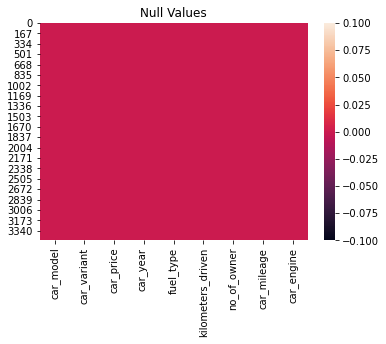

In [30]:
#checking the null values in dataset by using heatmap
sns.heatmap(df.isnull())
plt.title('Null Values')
plt.show()

- As we can see there are no null values in the dataset.

### Data Visualisation 

In [31]:
df['car_model'].unique()

array(['2015 Ford Ecosport', '2014 Skoda Rapid', '2018 Hyundai i20',
       '2018 Maruti Ignis', '2020 Maruti Baleno', '2017 Volkswagen Polo',
       '2017 Ford Ecosport', '2013 Maruti Swift', '2018 Maruti Swift',
       '2011 Hyundai i20', '2013 Hyundai Verna', '2017 Hyundai i20',
       '2018 Maruti Ciaz', '2016 Ford Ecosport', '2017 Maruti Baleno',
       '2016 Hyundai Xcent', '2014 Maruti Swift',
       '2011 Maruti Zen Estilo', '2017 Maruti SX4 S Cross',
       '2015 Hyundai Xcent', '2017 Hyundai Grand i10',
       '2011 Hyundai Verna', '2021 Maruti Swift', '2021 Kia Sonet',
       '2018 Maruti Eeco', '2015 Maruti Swift', '2016 Maruti Swift',
       '2018 Maruti Alto 800', '2016 Renault KWID',
       '2018 Ford Figo Aspire', '2016 Maruti Eeco',
       '2012 Volkswagen Polo', '2017 Maruti Swift Dzire',
       '2015 Maruti Swift Dzire', '2015 Maruti Eeco', '2017 Renault KWID',
       '2014 Maruti Swift Dzire', '2018 Maruti Vitara Brezza',
       '2019 Maruti Swift', '2011 Hyundai i1

In [32]:
new_set = set(df['car_model'])
print("No of unique items in the list are:", len(new_set))

No of unique items in the list are: 383


- As we can see there are 383 unique car models in the dataset.

In [33]:
df['car_variant'].unique()

array(['1.5 DV5 MT Titanium', '1.5 TDI Elegance', 'Sportz',
       '1.2 Alpha BSIV', '1.2 Sigma', '1.2 MPI Trendline',
       '1.5 Diesel Trend', 'VDI', 'VDI BSIV', '1.2 Magna', '1.6 SX',
       '1.2 Magna Executive', '1.4 Delta', '1.5 Diesel Titanium',
       '1.2 Delta', '1.2 Kappa Base', 'LXI BS IV', 'DDiS 320 Alpha',
       '1.1 CRDi S Option', '1.2 Kappa Asta', '1.6 SX VTVT (O)',
       '1.2 Delta BSIV', 'LXI', 'HTX Turbo iMT', 'CNG 5 Seater AC BSIV',
       'Petrol CVT Asta', 'VDI Optional', 'RXT', '1.2 Ti-VCT Titanium',
       'Petrol Comfortline 1.2L', 'ZXI', '1.2 Zeta', 'VXI', '1.1 CRDi SX',
       '5 Seater AC BSIV', 'LDI', 'VDi', 'Sportz AT', 'SX Opt iMT',
       '1.2 Era', 'S i-Dtech', 'ZDi Plus SHVS', 'T Option',
       '1.5 Diesel Titanium BSIV', '1.2 Revotron XZ', 'AT ZXi',
       'i-VTEC VX', 'LDI BSIV', '1.05 Revotorq XZ Plus', 'SLE',
       '1.2 V AT i VTEC', 'i-VTEC V', '1.2 CRDi Sportz',
       'Titanium Diesel', 'Magna Optional 1.2', 'Delta',
       '1.5 Diesel Tre

In [34]:
new_set = set(df['car_variant'])
print("No of unique items in the list are:", len(new_set))

No of unique items in the list are: 543


- As we can see that there are 543 unique car variant in the dataset.

<AxesSubplot:xlabel='car_price', ylabel='Density'>

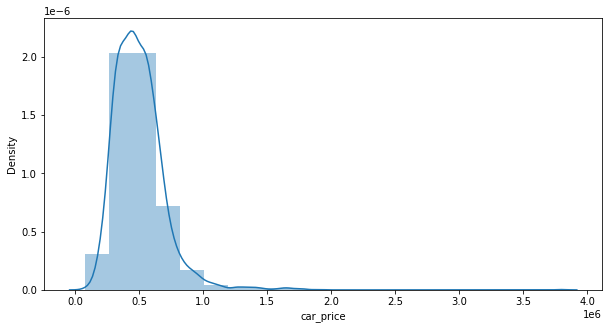

In [35]:
plt.figure(figsize=(10, 5))
sns.distplot(df['car_price'], bins=20)

- We can observe that the average price of the used cars are around 500000 rupees.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, '2008'),
  Text(1, 0, '2009'),
  Text(2, 0, '2010'),
  Text(3, 0, '2011'),
  Text(4, 0, '2012'),
  Text(5, 0, '2013'),
  Text(6, 0, '2014'),
  Text(7, 0, '2015'),
  Text(8, 0, '2016'),
  Text(9, 0, '2017'),
  Text(10, 0, '2018'),
  Text(11, 0, '2019'),
  Text(12, 0, '2020'),
  Text(13, 0, '2021')])

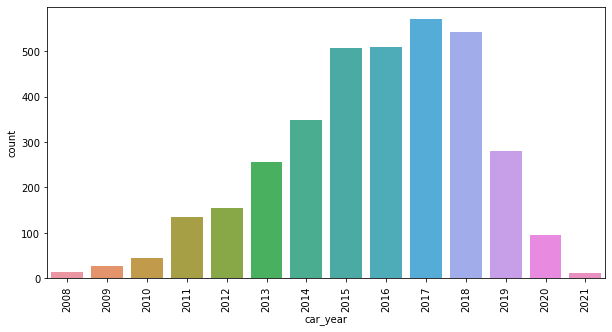

In [36]:
plt.figure(figsize=(10,5))
sns.countplot(df['car_year']) 
plt.xticks(rotation=90)

- We can observe that majority of the cars are from year 2015 to 2018.

<AxesSubplot:xlabel='car_year'>

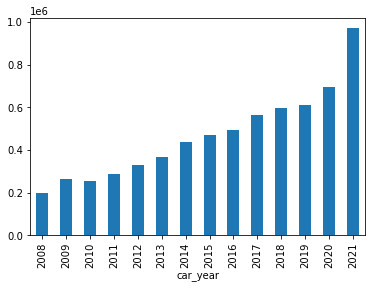

In [37]:
df.groupby('car_year')['car_price'].mean().plot.bar()

- We can observe that the price of the car are gradually decreasing as the car becomes old.

In [38]:
df["car_model"].value_counts()

2018 Maruti Baleno           65
2016 Maruti Baleno           60
2015 Maruti Swift            58
2014 Maruti Swift            56
2017 Hyundai i20             52
                             ..
2019 Toyota Yaris             1
2020 Maruti Swift Dzire       1
2013 Toyota Innova            1
2021 Renault Triber           1
2010 Toyota Corolla Altis     1
Name: car_model, Length: 383, dtype: int64

- We can observe that '2018 Maruti Baleno' has the highest values inn the dataset that means people are selling this car more.

In [39]:
df["car_variant"].value_counts()

VXI                 292
VDI                 160
LXI                 113
Sportz               97
1.2 Delta            49
                   ... 
1.5 Revotorq XZ       1
AMT RXL               1
W4                    1
Zeta DDiS 200 SH      1
1.2 DLX               1
Name: car_variant, Length: 543, dtype: int64

- We can observe that 'vxi' variant of the car has the highest value that means people are selling this variant more.

<AxesSubplot:xlabel='fuel_type', ylabel='car_price'>

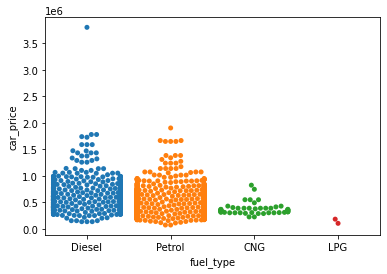

In [40]:
sns.swarmplot(x='fuel_type',y='car_price',data=df)

- As we can see from the above graph that the car price of diesel and petrol car are almost same. The price of CNG or LPG cars are very less as compared to diesel or petrol cars.

Petrol    2374
Diesel    1073
CNG         48
LPG          2
Name: fuel_type, dtype: int64

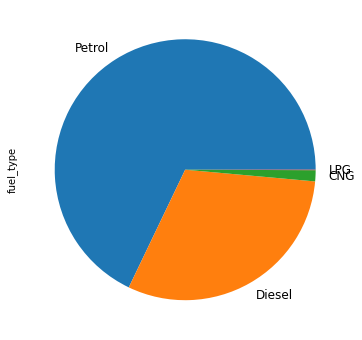

In [41]:
plt.figure(figsize=(10,6))
(df['fuel_type'].value_counts()*100 /len(df)).plot.pie(labels = ['Petrol','Diesel','CNG','LPG'],
         fontsize=12)
df['fuel_type'].value_counts()

- We can observe that petrol cars are in more numbers on sale as compared to diesel,CNG,LPG.

<AxesSubplot:xlabel='fuel_type', ylabel='car_price'>

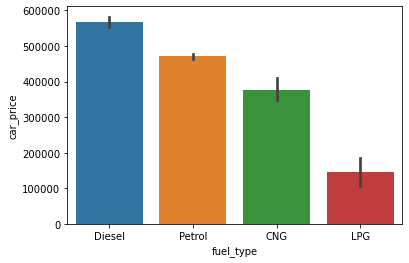

In [42]:
sns.barplot(x='fuel_type', y='car_price', data=df)

- As we can observe that diesel cars have high price as compared to any other fuel type.

<AxesSubplot:xlabel='kilometers_driven', ylabel='Density'>

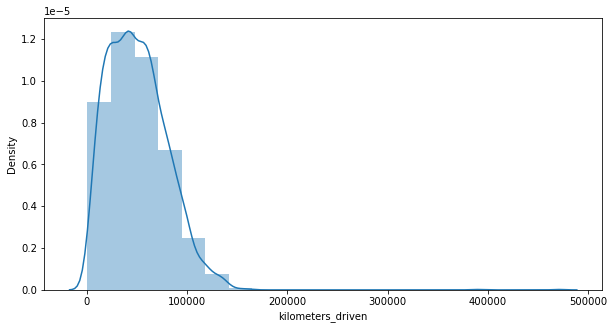

In [43]:
plt.figure(figsize=(10, 5))
sns.distplot(df['kilometers_driven'], bins=20)

- As we can observe that most of the cars are driven less than 100000 kms.

1st Owner    3006
2nd Owner     482
3rd Owner       6
4th Owner       3
Name: no_of_owner, dtype: int64

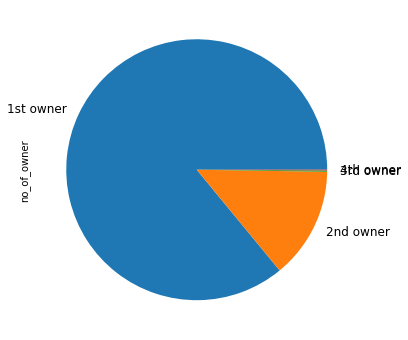

In [44]:
plt.figure(figsize=(10,6))
(df['no_of_owner'].value_counts()*100 /len(df)).plot.pie(labels = ['1st owner','2nd owner','3rd owner','4th owner'],
         fontsize=12)
df['no_of_owner'].value_counts()

- We can observe that majority of the cars are owned by their 1st owner.

<AxesSubplot:xlabel='no_of_owner', ylabel='car_price'>

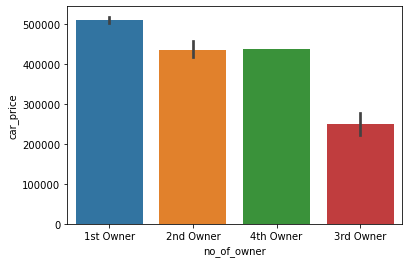

In [45]:
sns.barplot(x='no_of_owner', y='car_price', data=df)

- We can observe that car price are higher for 1st owner car as compared to others.

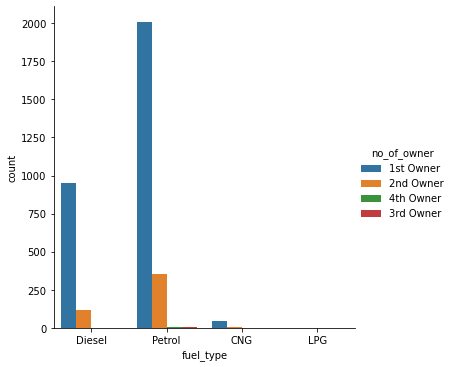

In [46]:
sns.catplot(x ="fuel_type", hue ="no_of_owner",  kind ="count", data = df) 

- We can observe from the above graph that in every fuel type, the majority of the car owner is 1st.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, '2008'),
  Text(1, 0, '2009'),
  Text(2, 0, '2010'),
  Text(3, 0, '2011'),
  Text(4, 0, '2012'),
  Text(5, 0, '2013'),
  Text(6, 0, '2014'),
  Text(7, 0, '2015'),
  Text(8, 0, '2016'),
  Text(9, 0, '2017'),
  Text(10, 0, '2018'),
  Text(11, 0, '2019'),
  Text(12, 0, '2020'),
  Text(13, 0, '2021')])

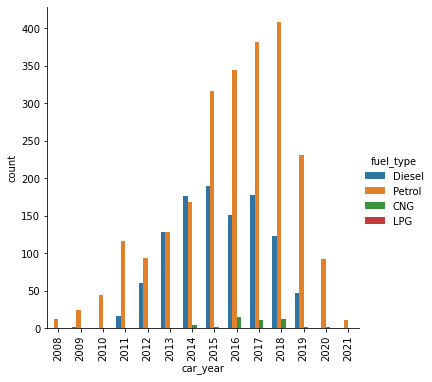

In [47]:
sns.catplot(x ="car_year", hue ="fuel_type",  kind ="count", data = df)
plt.xticks(rotation=90)

- We can observe that in alomst every year majority of he car are petrol type but in year 2013, it is same for diesel and petrol and in 2014 diesel cars more as compared to petrol.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, '2008'),
  Text(1, 0, '2009'),
  Text(2, 0, '2010'),
  Text(3, 0, '2011'),
  Text(4, 0, '2012'),
  Text(5, 0, '2013'),
  Text(6, 0, '2014'),
  Text(7, 0, '2015'),
  Text(8, 0, '2016'),
  Text(9, 0, '2017'),
  Text(10, 0, '2018'),
  Text(11, 0, '2019'),
  Text(12, 0, '2020'),
  Text(13, 0, '2021')])

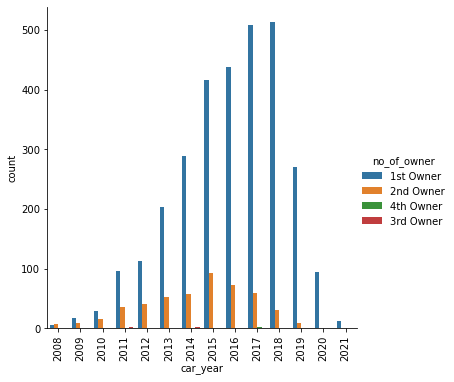

In [48]:
sns.catplot(x ="car_year", hue ="no_of_owner",  kind ="count", data = df)
plt.xticks(rotation=90)

- We can observe that in every year majority of the cars are owned by the 1st owner.

<AxesSubplot:xlabel='car_mileage', ylabel='Density'>

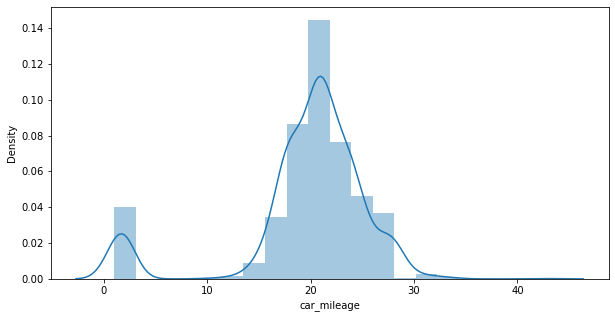

In [49]:
plt.figure(figsize=(10, 5))
sns.distplot(df['car_mileage'], bins=20)

- We can observe that majority of the cars have a mileage of around 20kmpl.

<AxesSubplot:xlabel='car_engine', ylabel='Density'>

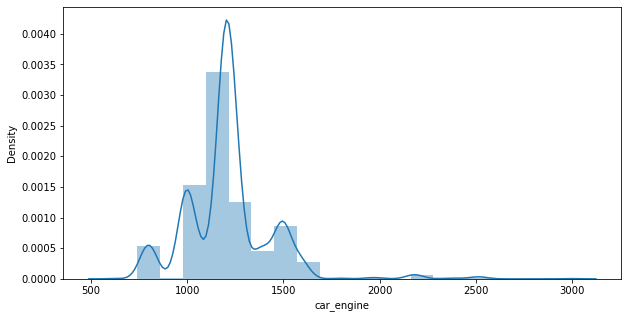

In [50]:
plt.figure(figsize=(10, 5))
sns.distplot(df['car_engine'], bins=20)

- We can observe that majority of the engines are from 1000CC to 1500CC.

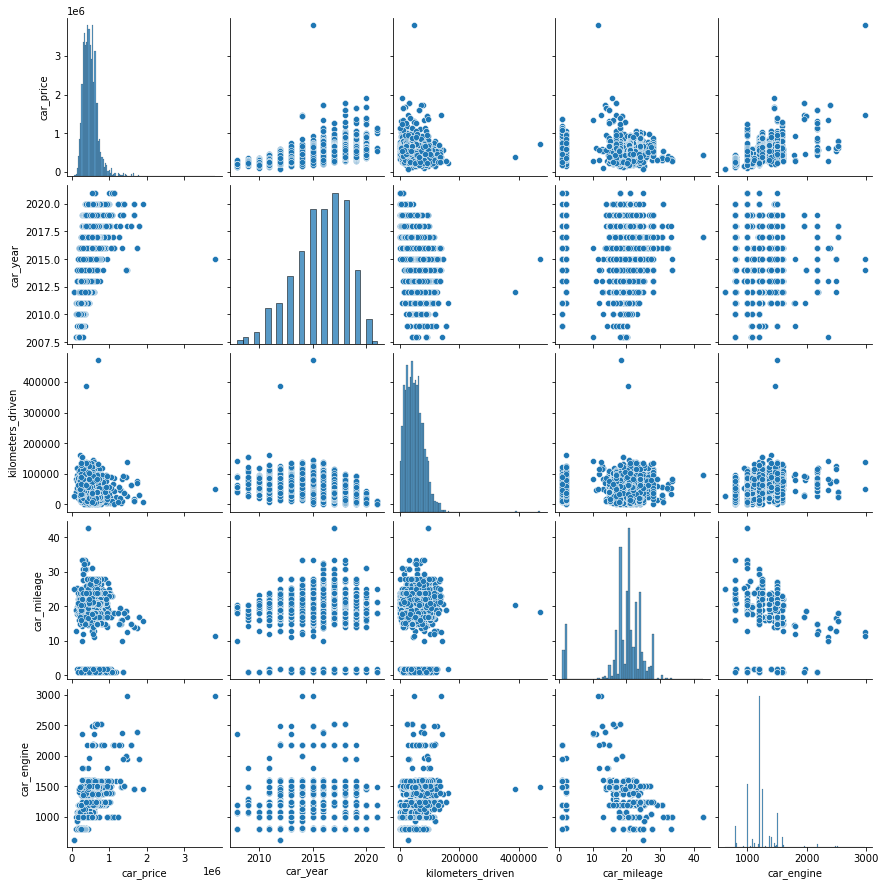

In [51]:
sns.pairplot(df)

array([[<AxesSubplot:title={'center':'car_price'}>,
        <AxesSubplot:title={'center':'car_year'}>,
        <AxesSubplot:title={'center':'kilometers_driven'}>,
        <AxesSubplot:title={'center':'car_mileage'}>,
        <AxesSubplot:title={'center':'car_engine'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesS

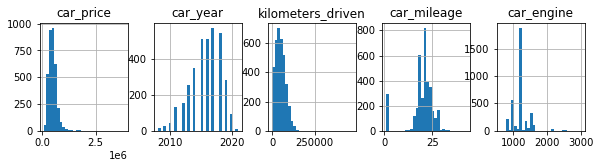

In [52]:
# Histogram to see the data distribution of all the columns
df.hist(figsize=(20,20), grid = True, layout = (8,10), bins = 30)

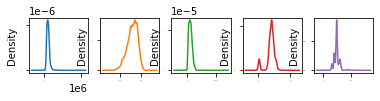

In [53]:
df.plot(kind='density',subplots=True,  layout=(10,8), sharex=False, legend=False, fontsize=1, figsize=(10,12))
plt.show()

### Data Preprocessing

In [54]:
enc=OrdinalEncoder()

for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

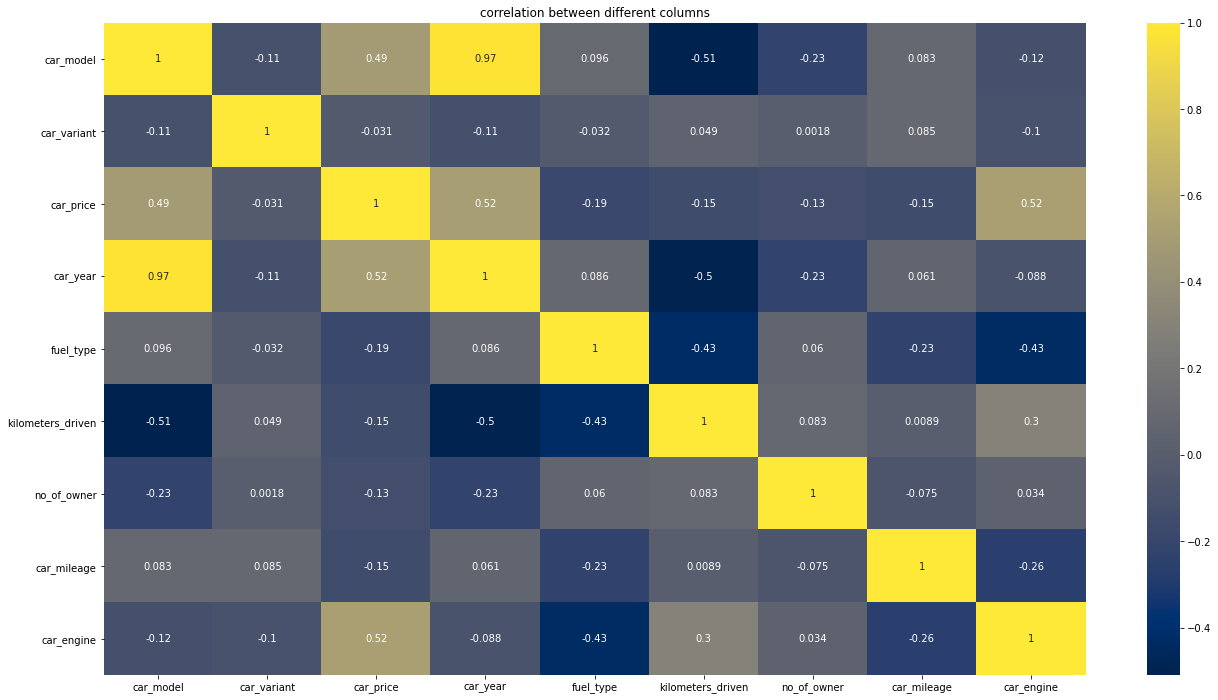

In [55]:
# Let's see the correlation between different columns.
corr_df= df.corr()

plt.figure(figsize=[22,12])
sns.heatmap(corr_df,cmap="cividis",annot=True)
plt.title('correlation between different columns')
plt.show()

- We can observe that 'car_engine' and 'car_year' are the most positively correlated columns with the 'car_price' and 'fuel_type' is the most negatively correlated column with the 'car_price'.

In [56]:
df.describe()

,car_model,car_variant,car_price,car_year,fuel_type,kilometers_driven,no_of_owner,car_mileage,car_engine
count,3497.000000,3497.000000,3.497000e+03,3497.000000,3497.000000,3497.000000,3497.000000,3497.000000,3497.000000
mean,202.525593,293.384615,4.991533e+05,2015.745496,2.344581,50488.130112,0.143838,19.633176,1214.962963
std,92.789309,150.778917,2.038098e+05,2.431057,0.960278,30253.414935,0.362994,6.311586,230.032920
min,0.000000,0.000000,7.450000e+04,2008.000000,0.000000,351.000000,0.000000,1.000000,624.000000
25%,127.000000,170.000000,3.600000e+05,2014.000000,1.000000,26905.000000,0.000000,18.000000,1120.000000
50%,206.000000,321.000000,4.735000e+05,2016.000000,3.000000,47393.000000,0.000000,20.800000,1197.000000
75%,282.000000,422.000000,5.990000e+05,2018.000000,3.000000,69160.000000,0.000000,23.000000,1248.000000
max,382.000000,542.000000,3.800000e+06,2021.000000,3.000000,471000.000000,3.000000,42.658000,2987.000000


In [57]:
df

,car_model,car_variant,car_price,car_year,fuel_type,kilometers_driven,no_of_owner,car_mileage,car_engine
0,137.0,112.0,548000,2015,1.0,86059.0,0.0,22.0,1498.0
1,131.0,140.0,413000,2014,1.0,55970.0,0.0,21.1,1498.0
2,277.0,379.0,651000,2018,3.0,66220.0,0.0,20.3,1197.0
3,290.0,27.0,599000,2017,3.0,39386.0,0.0,20.8,1197.0
4,361.0,69.0,578500,2020,3.0,13258.0,0.0,21.0,1197.0
...,...,...,...,...,...,...,...,...,...
3492,180.0,121.0,536500,2017,1.0,37327.0,0.0,28.0,1248.0
3493,245.0,88.0,642000,2015,1.0,78425.0,0.0,27.3,1248.0
3494,159.0,91.0,460500,2014,1.0,84743.0,0.0,22.0,1248.0
3495,125.0,410.0,387000,2018,1.0,63545.0,0.0,24.0,1248.0


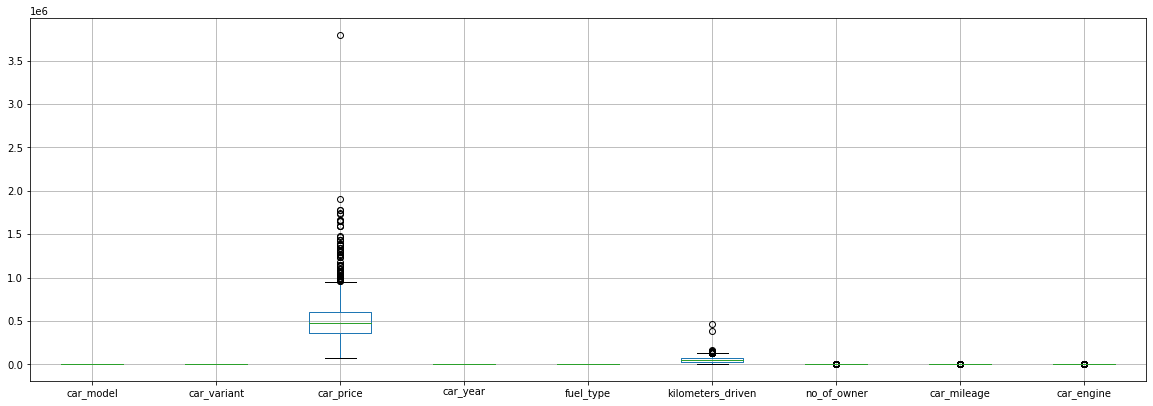

In [58]:
#checking the outliers
df.iloc[:,0:10].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

- As we can see that there are some outliers present in the car_price but the price can be high depend on the car model and variant. So we are not removing outliers from it.

In [59]:
df.skew()

car_model           -0.230894
car_variant         -0.402664
car_price            2.726349
car_year            -0.529777
fuel_type           -0.826980
kilometers_driven    1.606847
no_of_owner          2.404398
car_mileage         -1.649732
car_engine           1.662399
dtype: float64

In [60]:
df_new=power_transform(df)

df_new=pd.DataFrame(df_new,columns=df.columns)

In [61]:
df_new.skew()

car_model           -0.261766
car_variant         -0.424697
car_price            0.004523
car_year            -0.396598
fuel_type           -0.769675
kilometers_driven   -0.017998
no_of_owner          2.071043
car_mileage         -0.256970
car_engine          -0.030489
dtype: float64

In [62]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
dfa=scaler.fit_transform(df_new)
print(dfa)

[[-0.69820027 -1.199539    0.4322418  ... -0.40415342  0.32014304
   1.25225177]
 [-0.76335421 -1.01055803 -0.32109102 ... -0.40415342  0.12484341
   1.25225177]
 [ 0.80265474  0.57082264  0.89468738 ... -0.40415342 -0.04285787
   0.03094218]
 ...
 [-0.46002965 -1.34216075 -0.03200736 ... -0.40415342  0.32014304
   0.26340309]
 [-0.82860055  0.77323393 -0.49322703 ... -0.40415342  0.77916126
   0.26340309]
 [ 0.97238103  0.06587728  1.01413479 ... -0.40415342  0.77916126
   1.25225177]]


In [63]:
dfb=pd.DataFrame(dfa,columns=df.columns)

In [64]:
dfb

,car_model,car_variant,car_price,car_year,fuel_type,kilometers_driven,no_of_owner,car_mileage,car_engine
0,-0.698200,-1.199539,0.432242,-0.335818,-1.444471,1.153946,-0.404153,0.320143,1.252252
1,-0.763354,-1.010558,-0.321091,-0.740823,-1.444471,0.326780,-0.404153,0.124843,1.252252
2,0.802655,0.570823,0.894687,0.936115,0.687436,0.628677,-0.404153,-0.042858,0.030942
3,0.940580,-1.784315,0.670818,0.502438,0.687436,-0.226298,-0.404153,0.061304,0.030942
4,1.690682,-1.492608,0.577367,1.833669,0.687436,-1.426576,-0.404153,0.103577,0.030942
...,...,...,...,...,...,...,...,...,...
3492,-0.233640,-1.138661,0.375490,0.502438,-1.444471,-0.302405,-0.404153,1.799764,0.263403
3493,0.462268,-1.362608,0.857205,-0.335818,-1.444471,0.959663,-0.404153,1.611353,0.263403
3494,-0.460030,-1.342161,-0.032007,-0.740823,-1.444471,1.121075,-0.404153,0.320143,0.263403
3495,-0.828601,0.773234,-0.493227,0.936115,-1.444471,0.552237,-0.404153,0.779161,0.263403


### Model Building

In [82]:
x=dfb.drop('car_price', axis=1)
y=dfb['car_price']

In [83]:
x

,car_model,car_variant,car_year,fuel_type,kilometers_driven,no_of_owner,car_mileage,car_engine
0,-0.698200,-1.199539,-0.335818,-1.444471,1.153946,-0.404153,0.320143,1.252252
1,-0.763354,-1.010558,-0.740823,-1.444471,0.326780,-0.404153,0.124843,1.252252
2,0.802655,0.570823,0.936115,0.687436,0.628677,-0.404153,-0.042858,0.030942
3,0.940580,-1.784315,0.502438,0.687436,-0.226298,-0.404153,0.061304,0.030942
4,1.690682,-1.492608,1.833669,0.687436,-1.426576,-0.404153,0.103577,0.030942
...,...,...,...,...,...,...,...,...
3492,-0.233640,-1.138661,0.502438,-1.444471,-0.302405,-0.404153,1.799764,0.263403
3493,0.462268,-1.362608,-0.335818,-1.444471,0.959663,-0.404153,1.611353,0.263403
3494,-0.460030,-1.342161,-0.740823,-1.444471,1.121075,-0.404153,0.320143,0.263403
3495,-0.828601,0.773234,0.936115,-1.444471,0.552237,-0.404153,0.779161,0.263403


In [84]:
y=pd.DataFrame(y, columns=['car_price'])

In [85]:
y

,car_price
0,0.432242
1,-0.321091
2,0.894687
3,0.670818
4,0.577367
...,...
3492,0.375490
3493,0.857205
3494,-0.032007
3495,-0.493227


In [86]:
#checking the best random state
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f"At random state {i}, the training accuracy is:- {r2_score(y_train,pred_train)}")
    print(f"At random state {i}, the testing accuracy is:- {r2_score(y_test,pred_test)}")
    print("\n")

At random state 0, the training accuracy is:- 0.7085899417105883
At random state 0, the testing accuracy is:- 0.7388313963739714


At random state 1, the training accuracy is:- 0.7295420667799091
At random state 1, the testing accuracy is:- 0.6859520175198703


At random state 2, the training accuracy is:- 0.725293731483208
At random state 2, the testing accuracy is:- 0.6955599955380214


At random state 3, the training accuracy is:- 0.715849440778878
At random state 3, the testing accuracy is:- 0.7203724973755063


At random state 4, the training accuracy is:- 0.7201486314604741
At random state 4, the testing accuracy is:- 0.7122753128477728


At random state 5, the training accuracy is:- 0.7053307135354197
At random state 5, the testing accuracy is:- 0.7452816590591892


At random state 6, the training accuracy is:- 0.7087941129913679
At random state 6, the testing accuracy is:- 0.7360009488778366


At random state 7, the training accuracy is:- 0.7195581639820863
At random state 7, t

At random state 63, the testing accuracy is:- 0.7074251811047095


At random state 64, the training accuracy is:- 0.7235779784470582
At random state 64, the testing accuracy is:- 0.7015084312802276


At random state 65, the training accuracy is:- 0.7189527064412236
At random state 65, the testing accuracy is:- 0.714950255985971


At random state 66, the training accuracy is:- 0.7096070327769022
At random state 66, the testing accuracy is:- 0.7360003177669165


At random state 67, the training accuracy is:- 0.7250497875461229
At random state 67, the testing accuracy is:- 0.7008255262936812


At random state 68, the training accuracy is:- 0.7163008209593387
At random state 68, the testing accuracy is:- 0.7212867328521759


At random state 69, the training accuracy is:- 0.7083749346490207
At random state 69, the testing accuracy is:- 0.7352493042608671


At random state 70, the training accuracy is:- 0.713148077278317
At random state 70, the testing accuracy is:- 0.726254980019357


At ra

At random state 125, the testing accuracy is:- 0.7139441042713219


At random state 126, the training accuracy is:- 0.7270899861405729
At random state 126, the testing accuracy is:- 0.6937570580928581


At random state 127, the training accuracy is:- 0.7231658440039737
At random state 127, the testing accuracy is:- 0.7052118102206777


At random state 128, the training accuracy is:- 0.7253494580751849
At random state 128, the testing accuracy is:- 0.6990457428717335


At random state 129, the training accuracy is:- 0.7069027527332357
At random state 129, the testing accuracy is:- 0.7383163175441511


At random state 130, the training accuracy is:- 0.7253532572584249
At random state 130, the testing accuracy is:- 0.6953995423519137


At random state 131, the training accuracy is:- 0.7164326973125152
At random state 131, the testing accuracy is:- 0.7216146023498982


At random state 132, the training accuracy is:- 0.7177233781435375
At random state 132, the testing accuracy is:- 0.717551

At random state 186, the testing accuracy is:- 0.7216267196042216


At random state 187, the training accuracy is:- 0.7221251702973063
At random state 187, the testing accuracy is:- 0.7073665544314139


At random state 188, the training accuracy is:- 0.7202995468605007
At random state 188, the testing accuracy is:- 0.7119940264500182


At random state 189, the training accuracy is:- 0.7205456534591407
At random state 189, the testing accuracy is:- 0.7116421426705918


At random state 190, the training accuracy is:- 0.71377797405975
At random state 190, the testing accuracy is:- 0.726993836923004


At random state 191, the training accuracy is:- 0.7231851532535689
At random state 191, the testing accuracy is:- 0.7051732856384499


At random state 192, the training accuracy is:- 0.7222696187683928
At random state 192, the testing accuracy is:- 0.70740181710473


At random state 193, the training accuracy is:- 0.7205363561648643
At random state 193, the testing accuracy is:- 0.71071455538

- From the above stats, at random state 99 the testing accuracy and training accuracy is hightest.

- Testing the best Random State in different algorithms

In [87]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=99)

In [89]:
model=[LinearRegression(),SVR(),RandomForestRegressor(),DecisionTreeRegressor(),KernelRidge()]

In [90]:
for n in model:
    n.fit(x_train,y_train)
    n.score(x_train,y_train)
    predm=n.predict(x_test)
    print('r2 score of',n,'is:')
    print(r2_score(y_test,predm))
    print(mean_squared_error(y_test,predm))
    print(mean_absolute_error(y_test,predm))
    print('\n')

r2 score of LinearRegression() is:
0.7665103567810134
0.249293969104213
0.394505376034202


r2 score of SVR() is:
0.8166483805964382
0.19576222873375876
0.3194617958125336


r2 score of RandomForestRegressor() is:
0.9207467262015046
0.0846177282955532
0.167819503371589


r2 score of DecisionTreeRegressor() is:
0.8792788896273157
0.12889241828704384
0.16220572131490535


r2 score of KernelRidge() is:
0.7665272886790517
0.24927589112864104
0.39444976203280885




- Now checking cross validation score to check whether our models are overfitted or underfitted.

In [91]:
scrli=cross_val_score(LinearRegression(),x,y, cv=3)
print('cross validation score of linearregression: ',scrli.mean())

cross validation score of linearregression:  0.6826224197897514


In [92]:
scrrf=cross_val_score(RandomForestRegressor(),x,y, cv=3)
print('cross validation score of RandomForestregression: ',scrrf.mean())

cross validation score of RandomForestregression:  0.8811729451931392


In [93]:
scrdtr=cross_val_score(DecisionTreeRegressor(),x,y, cv=3)
print('cross validation score of DecisionTreeregression: ',scrdtr.mean())

cross validation score of DecisionTreeregression:  0.8351078223352285


In [94]:
scrsvr=cross_val_score(SVR(),x,y, cv=3)
print('cross validation score of SVR: ',scrsvr.mean())

cross validation score of SVR:  0.7303749629310096


In [95]:
scrkr=cross_val_score(KernelRidge(),x,y, cv=3)
print('cross validation score of KernelRidge: ',scrkr.mean())

cross validation score of KernelRidge:  0.710342941634917


- Minimum difference in r2_score and cross validation score is for RandomForestRegressor(3.89). So it is our best model

### Hyperparameter Tunning

In [96]:
param_grid = {  'bootstrap': [True], 'max_depth': [5, 10, None], 'max_features': ['auto', 'log2'], 'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15],}

In [97]:
GCV=GridSearchCV(RandomForestRegressor(), param_grid,  cv = 5,)

In [98]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True], 'max_depth': [5, 10, None],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]})

In [99]:
#getting the best parameters found by GridSearchCV
GCV.best_params_

{'bootstrap': True,
 'max_depth': None,
 'max_features': 'auto',
 'n_estimators': 13}

In [100]:
GCV_pred=GCV.best_estimator_.predict(x_test)

In [101]:
r2_score(y_test,GCV_pred,)

0.9230516093011365

In [102]:
joblib.dump(GCV.best_estimator_,'CarPricePrediction.obj')

['CarPricePrediction.obj']